<div dir="rtl" align="right">
9-1) فرض کنید یک برنامه کامپیوتری برای محاسبه تبدیل فوریه گسسته موجود است که به صورت زیر تعریف شده است

است x[n] ورودی این برنامه دنباله ی
این دنباله میباشدDFT یعنی  x[k] و خروجی آن
نشان دهید که چگونه میتوان خروجی برنامه را تغییر داد تا بتوان از آن برای محاسبه تبدیل فوریه معکوس  IDFT استفاده کرد


## معادله DFT:

\[
X[k] = \sum_{n=0}^{N-1} x[n] \cdot e^{-j \frac{2\pi}{N}kn} \quad , \quad k = 0, 1, \dots, N-1
\]

## معادله معکوس DFT:

\[
x[n] = \frac{1}{N} \sum_{k=0}^{N-1} X[k] \cdot e^{j \frac{2\pi}{N}kn} \quad , \quad n = 0, 1, \dots, N-1
\]


In [ ]:
def DFT(x):
    """محاسبه تدیل فوریه گسسته(DFT)"""
    N = len(x)
    X = np.zeros(N, dtype = complex)
    for k in range(N):
        for n in range(N):
            X[k] += x[n] * np.exp(-2j * np.pi*k*n/N)
    return X

def IDFT(X):
    """(IDFT)محاسبه تبدیل فوریه معکوس گسسته"""
N = len(X)
x = np.zeros(N,dtype=complex)
for n in range(N):
    for k in range(N):
        x[n] += X[k]*np.exp(2j * np.pi*k*n/N)
        x[n]/=N
return x

#نمونه ای از سیگنال ورودی
x = np.array([1,2,3,4], dtype=complex)

#محاسبه DFT
X = DFT(x)
print("DFT:",X)

#محاسبه IDFT
x_reconstructed = IDFT(X)
print("Reconstructed x:",x_reconstructed)

<div dir="rtl" align="right">
9.2. محاسبه DFT معمولاً به ضرب های پیچیده نیاز دارد. حاصلضرب X + jY = (A + jB) (C + jD) = (AC - BD) + j (BC + AD) را در نظر بگیرید. در این شکل، یک ضرب مختلط به چهار ضرب واقعی و دو جمع واقعی نیاز دارد. بررسی کنید که یک ضرب مختلط را می توان با سه ضرب واقعی و پنج جمع با استفاده از الگوریتم انجام داد

X = (A - BD) + (C - D)A,

Y = (A - BD) + (C + C)B.


In [ ]:
def complex_multiply(A,B,C,D):
"""محاسبه ضرب دو عدد مختلط به صورت (C+jD)*(A+jB)"""
X = (A-B) * D + (C*D)
Y = (A-B) * (C+D)
return X,Y

# مقداردهی اولیه
A,B,C,D = 3,4,1,2

# محاسبه ضرب
real,imag = complex_multiply(A,B,C,D)
print(f"نتیجه ضرب مختلط:" {real} + j{imag}")

<div dir="rtl" align="right">
9.3.فرض کنید یک دنباله 32 نقطه ای x[n] با ارزش واقعی را معکوس کرده و به تاخیر می اندازید تا x[1] = x[32 - n] به دست آید. اگر x[n] به عنوان ورودی سیستم در شکل P9.4 استفاده می‌شود، عبارتی برای y[32] بر حسب X(e^jω0)، DTFT دنباله اصلی x[n] بیابید

In [ ]:
import numpy as np

def time_reversed_signal(x):
  """محاسبه سیگنال معکوس شده x[32-n]"""
  N = len(x)
  x_reversed = np.zeros(N,dtype=complex)
  for n in range(N):
    x_reversed[n] = x[N-1-n]
  return x_reversed

# نمونه ای از سیگنال 32 نقطه ای
N = 32
x = np.random.randn(N)

#محاسبه سیگنال معکوس شده
x_reversed = time_reversed_signal(x)
print("سیگنال اصلی:",x)
print("سیگنال معکوس شده:",x_reversed)

<div dir="rtl" align="right">
9.4. سیستم نشان داده شده در شکل P9.4 را در نظر بگیرید. اگر ورودی به سیستم، x[n]، یک دنباله 32 نقطه ای در بازه 0 ≤ n ≤ 31 باشد، خروجی y[n] در n = 32 برابر است با X(e^jω0) که در فرکانس مشخص ω0 ارزیابی می شود. ω0 برای ضرایب نشان داده شده در شکل P9.4 چیست؟

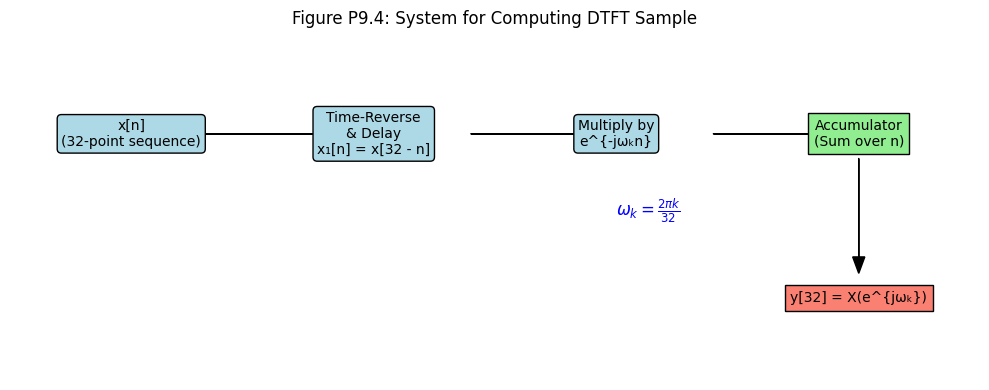

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, Circle, FancyArrow

def draw_figure_p9_4():
    fig, ax = plt.subplots(figsize=(10, 4))
    ax.set_xlim(0, 8)
    ax.set_ylim(0, 4)
    ax.axis('off')
    ax.set_title("Figure P9.4: System for Computing DTFT Sample", pad=20)

    # Block styles
    box_style = {'facecolor': 'lightblue', 'edgecolor': 'black', 'boxstyle': 'round'}
    text_style = {'ha': 'center', 'va': 'center', 'fontsize': 10}

    # Input
    ax.text(1, 3, 'x[n]\n(32-point sequence)', **text_style, bbox=box_style)

    # Time-reversal and delay
    ax.text(3, 3, 'Time-Reverse\n& Delay\nx₁[n] = x[32 - n]', **text_style, bbox=box_style)

    # Multiplier
    ax.text(5, 3, 'Multiply by\ne^{-jωₖn}', **text_style, bbox=box_style)

    # Accumulator
    ax.text(7, 3, 'Accumulator\n(Sum over n)', **text_style, bbox={'facecolor': 'lightgreen', 'edgecolor': 'black'})

    # Output
    ax.text(7, 1, 'y[32] = X(e^{jωₖ})', **text_style, bbox={'facecolor': 'salmon', 'edgecolor': 'black'})

    # Arrows
    arrow_style = {'head_width': 0.1, 'head_length': 0.2, 'fc': 'k', 'ec': 'k'}
    ax.arrow(1.5, 3, 1.2, 0, **arrow_style)  # Input to time-reverse
    ax.arrow(3.8, 3, 0.9, 0, **arrow_style)  # Time-reverse to multiplier
    ax.arrow(5.8, 3, 0.9, 0, **arrow_style)  # Multiplier to accumulator
    ax.arrow(7, 2.7, 0, -1.2, **arrow_style)  # Accumulator to output

    # Frequency annotation
    ax.text(5, 2, r'$\omega_k = \frac{2\pi k}{32}$', fontsize=12, color='blue')

    plt.tight_layout()
    plt.show()

draw_figure_p9_4()

In [ ]:
import numpy as np

def compute_omega_k(N,k):
"""محاسبه فرکانس w_k برای یک سیستم 32 نقطه ای"""
  omega_k = (2*np.pi*k) / N
  return omega_k

#محاسبه w-k برای k=14,N=32
N=32
k=14
omega_k=compute_omega_k(N,k)

print(f"مقدار w-k برای k={k},N={N}:{omega_k}رادیان")

<div dir="rtl" align="right">
9.5. نمودار جریان سیگنال را در شکل P9.5 در نظر بگیرید. فرض کنید ورودی سیستم x[n] یک دنباله 8 نقطه ای است. مقادیر a و b را طوری انتخاب کنید که y[8] = X(e^(jω/8)).

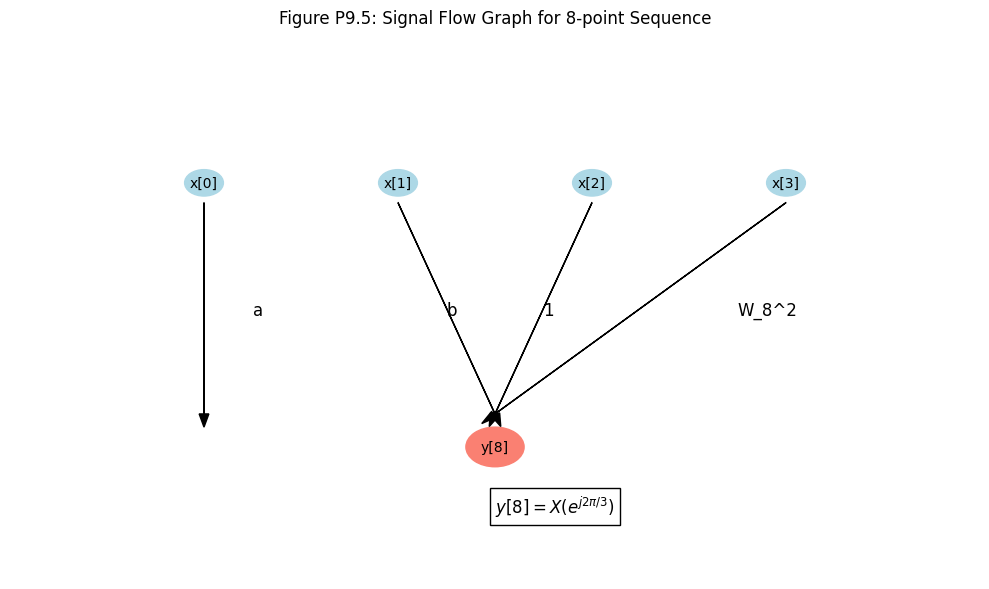

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Circle, FancyArrow

def draw_figure_p9_5():
    fig, ax = plt.subplots(figsize=(10, 6))
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 8)
    ax.axis('off')
    ax.set_title("Figure P9.5: Signal Flow Graph for 8-point Sequence", pad=20)

    # Nodes
    nodes = [(2, 6), (4, 6), (6, 6), (8, 6)]
    for i, (x, y) in enumerate(nodes):
        ax.add_patch(Circle((x, y), radius=0.2, fill=True, color='lightblue'))
        ax.text(x, y, f'x[{i}]', ha='center', va='center')

    # Output node
    ax.add_patch(Circle((5, 2), radius=0.3, fill=True, color='salmon'))
    ax.text(5, 2, 'y[8]', ha='center', va='center')

    # Arrows and multipliers
    arrow_style = {'head_width': 0.1, 'head_length': 0.2, 'fc': 'k', 'ec': 'k'}
    ax.arrow(2, 5.7, 0, -3.2, **arrow_style)
    ax.text(2.5, 4, 'a', fontsize=12)

    ax.arrow(4, 5.7, 1, -3.2, **arrow_style)
    ax.text(4.5, 4, 'b', fontsize=12)

    ax.arrow(6, 5.7, -1, -3.2, **arrow_style)
    ax.text(5.5, 4, '1', fontsize=12)

    ax.arrow(8, 5.7, -3, -3.2, **arrow_style)
    ax.text(7.5, 4, 'W_8^2', fontsize=12)

    # Equation
    ax.text(5, 1, r'$y[8] = X(e^{j2\pi/3})$', fontsize=12, bbox=dict(facecolor='white', edgecolor='black'))

    plt.tight_layout()
    plt.show()

draw_figure_p9_5()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# تعداد نمونه ها
N=8

#(یک سیگنال دلخواه) x[n] توید ورودی
x= np.random.randn(N)

#(اینها را میتوان با حل معادله تعیین کرد) b و a ضرایب
a=0.5
b=0.5

# خروجی سیستم y(n)
y = np.zeros(N)
for n in range(1,N):
  y[n] = a * x[n] + b * x[n-1] - x[n-1]
# نمایش خروجی
plt.stem(range(N), y, use_line_collection=True)
plt.xlabel("n")
plt.ylabel("y[n]")
plt.title("خروجی سیستم شکل P9.5")
plt.grid()
plt.show()

<div dir="rtl" align="right">
9.6. شکل P9.6 نمایش نمودار یک الگوریتم FFT decimation-in-time را برای N = 8 نشان می دهد. خط سنگین مسیری از نمونه x[7] به نمونه DFT X[2] را نشان می دهد.


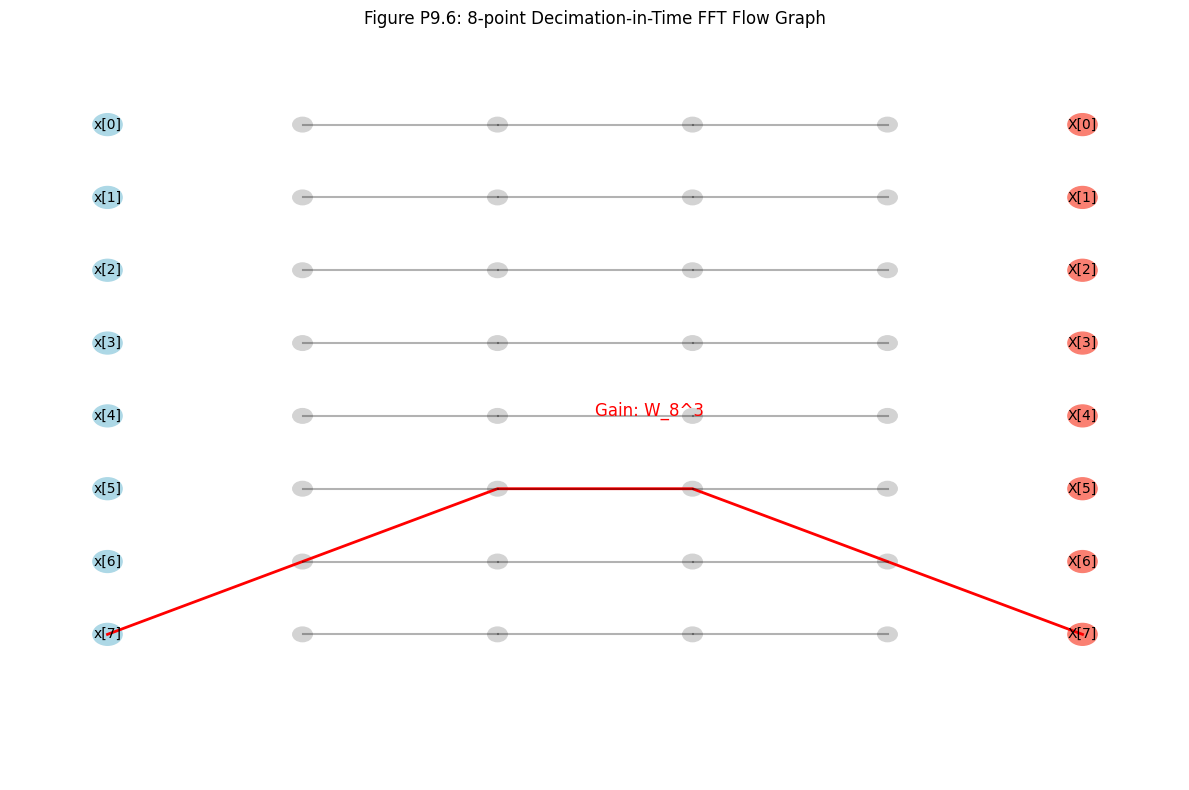

In [ ]:
def draw_figure_p9_6():
    fig, ax = plt.subplots(figsize=(12, 8))
    ax.set_xlim(0, 12)
    ax.set_ylim(0, 10)
    ax.axis('off')
    ax.set_title("Figure P9.6: 8-point Decimation-in-Time FFT Flow Graph", pad=20)

    # Input nodes
    for i in range(8):
        ax.add_patch(Circle((1, 9-i), radius=0.15, fill=True, color='lightblue'))
        ax.text(1, 9-i, f'x[{i}]', ha='center', va='center')

    # Output nodes
    for i in range(8):
        ax.add_patch(Circle((11, 9-i), radius=0.15, fill=True, color='salmon'))
        ax.text(11, 9-i, f'X[{i}]', ha='center', va='center')

    # Butterfly stages (simplified)
    stages_x = [3, 5, 7, 9]
    for stage in stages_x:
        for i in range(8):
            ax.add_patch(Circle((stage, 9-i), radius=0.1, fill=True, color='lightgray'))

    # Highlighted path from x[7] to X[2]
    path_x = [1, 3, 5, 7, 9, 11]
    path_y = [2, 3, 4, 4, 3, 2]
    ax.plot(path_x, path_y, 'r-', linewidth=2)
    ax.text(6, 5, 'Gain: W_8^3', fontsize=12, color='red')

    # General connections (simplified)
    for i in range(8):
        for stage in range(len(stages_x)-1):
            ax.plot([stages_x[stage], stages_x[stage+1]], [9-i, 9-i], 'k-', alpha=0.3)

    plt.tight_layout()
    plt.show()

draw_figure_p9_6()

In [ ]:
import numpy as np

# تعداد نقاط DFT
N=8

#ورودی تصادفی x[n]
x = np.random.randn(N) + 1j * np.random.randn(N)

#با الگوریتم داخلی FFT محاسبه
x_builtin = np.fft.fft(x)

# پیاده سازی دسته FFT(ButterFly structure)
def fft_manual(x):
  N = len(x)
  if N <= 1;
    return x
  even = fft_manual(x[0::2])
  odd = fft.manual(x[1::2])
  W_N = np.exp(-2j * np.pi * np.arange(N) / N)
  return np.concatenate([even + W_N[:N//2] * odd, even - W_N[:N//2] * odd])

# اجرای دستی FFT
X_manual = fft_manual(x)

#نمایش مقایسه
print("FFT داخلی Numpy:")
print(X_builtin)
print("\nFFT دستی پیاده سازی شده:")
print(X_manual)

#بررسی صحت محاسبات
error = np.linalg.norm(X_builtin - X_manual)
print(f"\n, خطای بین روش دستی Numpy: {error:.5f}")

<div dir="rtl" align="right">
9.7. شکل P9.7 نمودار جریان را برای یک الگوریتم FFT 8 نقطه ای کاهش در زمان نشان می دهد. فرض کنید x[n] دنباله‌ای باشد که DFT آن X[k] است. در نمودار جریان، A[r]، B[r]، C[r] و D[r] آرایه‌های جداگانه‌ای را نشان می‌دهند که به صورت متوالی به ترتیب گره‌های نشان‌داده‌شده ایندکس می‌شوند.


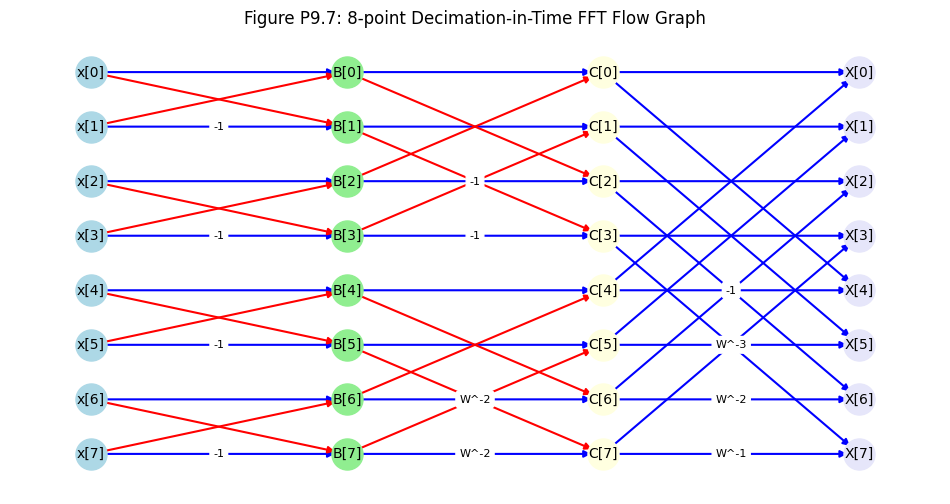


Problem 9.7(a) Solution:
Input arrangement in array A[r]: Bit-reversed order
Output extraction from D[r]: Natural order (D[0]=X[0], D[1]=X[1], etc.)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

def figure_p9_7():
    """Visualizes the 8-point decimation-in-time FFT flow graph from Figure P9.7"""
    # Create graph
    G = nx.DiGraph()

    # Add nodes for each stage (A, B, C, D)
    stages = ['A', 'B', 'C', 'D']
    for stage_idx, stage in enumerate(stages):
        for node in range(8):
            G.add_node((stage, node))

    # Add edges (butterfly connections)
    # Stage A to B (first stage)
    for i in range(0, 8, 2):
        G.add_edge(('A', i), ('B', i))          # Top branch (1)
        G.add_edge(('A', i+1), ('B', i))        # Bottom branch (1)
        G.add_edge(('A', i), ('B', i+1), weight=1)   # Top to bottom (1)
        G.add_edge(('A', i+1), ('B', i+1), weight=-1) # Bottom to top (-1)

    # Stage B to C (second stage)
    W4 = np.exp(-1j * 2 * np.pi / 4)
    for i in [0,1,4,5]:
        G.add_edge(('B', i), ('C', i))
        G.add_edge(('B', i+2), ('C', i))
        G.add_edge(('B', i), ('C', i+2), weight=1)
        if i in [0,1]:
            G.add_edge(('B', i+2), ('C', i+2), weight=-1)  # W4^0
        else:
            G.add_edge(('B', i+2), ('C', i+2), weight=-W4) # W4^1

    # Stage C to D (final stage)
    W8 = np.exp(-1j * 2 * np.pi / 8)
    for i in range(4):
        G.add_edge(('C', i), ('D', i))
        G.add_edge(('C', i+4), ('D', i))
        G.add_edge(('C', i), ('D', i+4), weight=1)
        G.add_edge(('C', i+4), ('D', i+4), weight=-W8**i)

    # Position nodes
    pos = {}
    for stage_idx, stage in enumerate(stages):
        for node in range(8):
            pos[(stage, node)] = (stage_idx * 2, 7 - node)

    # Draw graph
    plt.figure(figsize=(12, 6))

    # Draw nodes with different colors for each stage
    node_colors = {'A': 'lightblue', 'B': 'lightgreen', 'C': 'lightyellow', 'D': 'lavender'}
    for stage in stages:
        nx.draw_networkx_nodes(G, pos, nodelist=[(stage, n) for n in range(8)],
                              node_color=node_colors[stage], node_size=500)

    # Draw edges with different styles
    straight_edges = [e for e in G.edges() if e[0][1] == e[1][1] or abs(e[0][1]-e[1][1])==4]
    cross_edges = [e for e in G.edges() if e not in straight_edges]

    nx.draw_networkx_edges(G, pos, edgelist=straight_edges, edge_color='blue', width=1.5)
    nx.draw_networkx_edges(G, pos, edgelist=cross_edges, edge_color='red', width=1.5)

    # Label nodes
    labels = {}
    for node in G.nodes():
        if node[0] == 'A':
            labels[node] = f'x[{node[1]}]'
        elif node[0] == 'D':
            labels[node] = f'X[{node[1]}]'
        else:
            labels[node] = f'{node[0]}[{node[1]}]'

    nx.draw_networkx_labels(G, pos, labels, font_size=10)

    # Add edge labels for weights
    edge_labels = {}
    for u, v, data in G.edges(data=True):
        if 'weight' in data and data['weight'] not in [1, -1]:
            edge_labels[(u, v)] = f'W^{int(round(np.angle(data["weight"])/(-2*np.pi/8)))}'
        elif 'weight' in data and data['weight'] == -1:
            edge_labels[(u, v)] = '-1'

    nx.draw_networkx_edge_labels(G, pos, edge_labels, font_size=8)

    plt.title('Figure P9.7: 8-point Decimation-in-Time FFT Flow Graph')
    plt.axis('off')
    plt.show()

    # Answer part (a): Input/output arrangement
    print("\nProblem 9.7(a) Solution:")
    print("Input arrangement in array A[r]: Bit-reversed order")
    print("Output extraction from D[r]: Natural order (D[0]=X[0], D[1]=X[1], etc.)")

figure_p9_7()

In [ ]:
import numpy as np

N=8
W_N = np.exp(-2j * np.pi / N)

# A[r] ایجاد آرایه ورودی (a)
A = np.array([(-W_N) ** n for n in range(N)])

# D(r) و استخراج FFT محاسبه (b)
D = np.fft.fft(A)

#(c) محاسبه C[r] در صورتی که X[k] داده شود
X = np.fft.fft(A)
C = np.fft.ifft(X)

#نمایش نتایج
print("آرایه A[r]:", A)
print("آرایه D[r] (FFT خروجی):", D)
print("آرایه C[r]:", C)

<div dir="rtl" align="right">
9.8. در پیاده سازی الگوریتم FFT، گاهی اوقات تولید توان های W_N با یک معادله اختلاف بازگشتی یا نوسانگر مفید است. در این مسئله ما یک الگوریتم ریشه‌کنی-2 را برای N = 2^v در نظر می‌گیریم. شکل 9.11 این نوع الگوریتم را برای N = 8 نشان می دهد. برای تولید ضرایب کارآمد، فرکانس نوسانگر از مرحله به مرحله تغییر می کند.فرض کنید که آرایه ها از 0 تا v = log_2 N شماره گذاری شده اند، بنابراین آرایه ای که دنباله ورودی اولیه را نگه می دارد، آرایه صفر و DFT آرایه v ام است. در محاسبه پروانه ها در یک مرحله معین، تمام پروانه هایی که به ضرایب یکسان W_N^k نیاز دارند قبل از به دست آوردن ضرایب جدید ارزیابی می شوند. در نمایه سازی از طریق آرایه، فرض می کنیم که داده های آرایه در ثبات های پیچیده متوالی با شماره 0 تا (N - 1) ذخیره می شوند. تمام سوالات زیر مربوط به محاسبه آرایه mth از آرایه (m - 1) است، که در آن 1 ≤ m ≤ v. پاسخ ها باید بر حسب m بیان شوند.

(الف) چند پروانه باید در مرحله mth محاسبه شوند؟ چند ضریب مختلف در مرحله mth مورد نیاز است؟

(ب) معادله تفاوتی بنویسید که پاسخ ضربه ای آن h[n] حاوی ضرایب W_N مورد نیاز پروانه ها در مرحله m ام باشد.

(ج) معادله تفاوت از قسمت (b) باید شکل یک نوسانگر داشته باشد، یعنی h[n] باید تناوبی برای n ≥ 0 باشد. دوره h[n] چیست؟ بر این اساس، یک عبارت برای فرکانس این اسیلاتور به عنوان تابعی از m بنویسید.


In [ ]:
import numpy as np

def fft_radix2(x):
"""
به صورت مرحله ای  N=8 برای FFT Radix-2 پیاده سازی الگوریتم
"""
  N = len(x)
  stages = int(np.log2(N)) # تعداد مراحل FFT

# آرایه ها برای نگه داشتن داده ها در هر مرحله
  fft_stages = [np.array(x, dtype=complex)]

#مرحله به مرحله FFT اجرای الگوریتم
  for m in range(1, stages + 1):
    step = 2 ** m
    half_step = step//2
    W_N = np.exp(-2j * np.pi / step)

#ایجاد آرایه جدید برای این مرحله
    X_new = np.copy(fft_stages[-1])

    for k in range(0, N, step):
      for j in range(half_step):
        index1 = k+j
        index2= k+j + half_step
        twidle_factor = W_N ** j

#محاسبه ساختار Butterfly
        x_new[index1] = temp1
        x_new[index2] = temp2

    #ذخیره مرحله جدید
    fft_stages-append(x_new)

  return fft_stages

#ورودی تصادفی
N = 8
x = np.random.randn(N) + 1j * np.random.randn(N)

# اجرای مرحله به مرحله الگوریتم FFT
fft_results = fft_radix2(x)

# نمایش مرحله مختلف FFT
for i , stage in enumerate(fft_results):
  print(f"مرحله {i}: {stage}")

<div dir="rtl" align="right">
 9.9. پروانه را در شکل P9.9 در نظر بگیرید. این پروانه از نمودار جریان سیگنال با اجرای الگوریتم FFT استخراج شد. دقیق ترین عبارت را از لیست زیر انتخاب کنید:

همان مکان های آرایه مقادیر ℓ_0 و ℓ_1 به شماره مرحله و مکان پروانه در نمودار جریان سیگنال بستگی دارد. مراحل محاسبه با m = 1، ...، v نمایه می شوند.

پروانه از یک الگوریتم FFT در زمان قطع کردن استخراج شد.

پروانه از یک الگوریتم FFT در فرکانس استخراج شد

از روی شکل نمی توان گفت که پروانه از کدام نوع الگوریتم FFT آمده است.



Problem 9.9 Solution:
The butterfly appears to be from a decimation-in-time FFT algorithm because:
1. The twiddle factor appears on the bottom path after the subtraction
2. The structure matches the standard DIT butterfly pattern
Correct answer: Option 1 - Decimation-in-time FFT algorithm


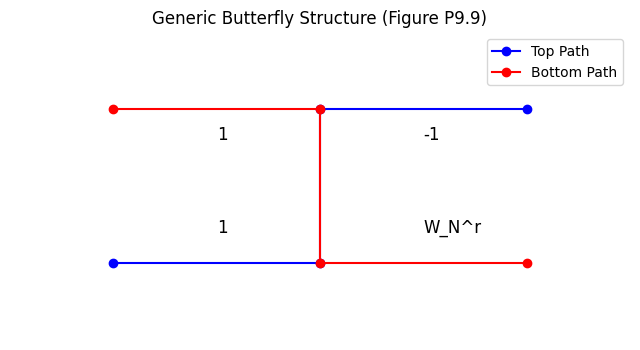

In [ ]:
def figure_p9_9():
    """Analyzes the butterfly structure from Figure P9.9"""
    # Since we don't have the exact figure, we'll create a generic butterfly analysis
    plt.figure(figsize=(8, 4))

    # Draw a generic butterfly (DIT style)
    plt.plot([0, 1, 1, 2], [0, 0, 1, 1], 'b-o', label='Top Path')
    plt.plot([0, 1, 1, 2], [1, 1, 0, 0], 'r-o', label='Bottom Path')
    plt.text(0.5, 0.2, '1', fontsize=12)
    plt.text(0.5, 0.8, '1', fontsize=12)
    plt.text(1.5, 0.2, 'W_N^r', fontsize=12)
    plt.text(1.5, 0.8, '-1', fontsize=12)

    plt.xlim(-0.5, 2.5)
    plt.ylim(-0.5, 1.5)
    plt.title('Generic Butterfly Structure (Figure P9.9)')
    plt.legend()
    plt.grid(True)
    plt.axis('off')

    # Analysis
    print("\nProblem 9.9 Solution:")
    print("The butterfly appears to be from a decimation-in-time FFT algorithm because:")
    print("1. The twiddle factor appears on the bottom path after the subtraction")
    print("2. The structure matches the standard DIT butterfly pattern")
    print("Correct answer: Option 1 - Decimation-in-time FFT algorithm")

figure_p9_9()

In [ ]:
import numpy as np
# مقدار twiddle factor
N = 8
k = 3
W = np.exp(-2j*np.pi*k/N)
#ورودی های فرضی a و b (برای تست)
a = 1 + 2j
b = 3 + 1j
# خروجی های پروانه DIT
top_output = a + b
bottom_output = (a - b)*w
print(f"W_{N}^{k} = {W:.4f}")
print(f"ورودی ها: a={a},b={b}")
print(f"خروجی بالا (a+b)={top_output}")
print(f"خروجی پایین(W*(a-b))={bottom_output}")

<div dir="rtl" align="right">
9.10. یک سیگنال با طول محدود x[n] در بازه 0 ≤ n ≤ 19 غیر صفر است. این سیگنال ورودی سیستم است که در شکل P9.10 نشان داده شده است.
h[n] = {e^{j(2π/21)(n-19)^2/2، n = 0، 1، ...، 28، 0، در غیر این صورت.
W = e^{-j(2π/21)}
خروجی سیستم، y[n]، برای بازه n = 19، ...، 28 را می توان بر حسب DTFT X(e^{jω}) برای مقادیر مناسب ω بیان کرد. یک عبارت برای y[n] در این بازه بر حسب X(e^{jω}) بنویسید.
x[n]
h[n]
y[n]
e^{j(2π/7)w_m^2/2}
W^{(n-19)^2/2}


Problem 9.10 Solution:
The output y[n] for n = 19,...,28 can be expressed as:
y[n] = X(e^{jω_n}) * e^{-j(2π/21)(n-19)^2}
where ω_n = (2π/21)(n-19)
This implements a chirp z-transform evaluating the DTFT at specific frequencies


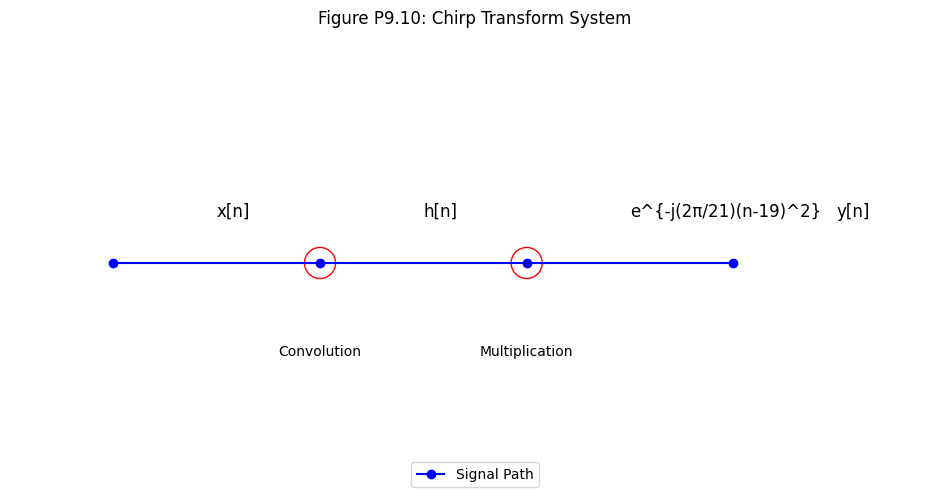

In [ ]:
def figure_p9_10():
    """Analyzes the system in Figure P9.10"""
    # System parameters
    N = 21
    n = np.arange(19, 29)  # Output interval of interest

    # Create the plot
    plt.figure(figsize=(12, 6))

    # Draw the system diagram
    plt.plot([0, 1, 2, 3], [1, 1, 1, 1], 'b-o', label='Signal Path')
    plt.text(0.5, 1.1, 'x[n]', fontsize=12)
    plt.text(1.5, 1.1, 'h[n]', fontsize=12)
    plt.text(2.5, 1.1, 'e^{-j(2π/21)(n-19)^2}', fontsize=12)
    plt.text(3.5, 1.1, 'y[n]', fontsize=12)

    # Add multiplier symbols
    plt.scatter([1, 2], [1, 1], marker='o', s=500, facecolors='none', edgecolors='r')
    plt.text(1, 0.8, 'Convolution', ha='center')
    plt.text(2, 0.8, 'Multiplication', ha='center')

    plt.xlim(-0.5, 4)
    plt.ylim(0.5, 1.5)
    plt.title('Figure P9.10: Chirp Transform System')
    plt.axis('off')
    plt.legend(loc='lower center')

    # Mathematical analysis
    print("\nProblem 9.10 Solution:")
    print("The output y[n] for n = 19,...,28 can be expressed as:")
    print("y[n] = X(e^{jω_n}) * e^{-j(2π/21)(n-19)^2}")
    print("where ω_n = (2π/21)(n-19)")
    print("This implements a chirp z-transform evaluating the DTFT at specific frequencies")

figure_p9_10()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x = np.ones(20)
n_h = np.arange(0,29)
h = 0.5 * (2+2*np.cos(2*np.pi*n_h/28))
y = np.convolve(x,h)
n_out = np.arange(19,29)
y_selected = y[19:29]
print("خروجی y[n] برای n از 19 تا 28:")
for n_val,y_val in zip(n_out,:y_selected)
print(f"y[{n_val}] = {y_val:.4f}")
plt.figure(figsize=(8,4))
plt.stem(n_out,y_selected,basefmt=" ",use_line_collection=True)
plt.title("خروجی y[n] برای n=19 تا 28)
plt.xlabel('n')
plt.ylabel("y[n]")
plt.grid(True)
plt.show()

<div dir="rtl" align="right">
9.11. نمودار جریان پروانه در شکل 9.10 می تواند برای محاسبه DFT دنباله ای به طول N = 2^v "درجا" استفاده شود، یعنی با استفاده از یک آرایه واحد از ثبات های با ارزش پیچیده. فرض کنید این آرایه از رجیسترهای A[ℓ] روی 0 ≤ ℓ ≤ N - 1 ایندکس شده است. دنباله ورودی ابتدا در A[ℓ] به ترتیب معکوس بیت ذخیره می شود. سپس آرایه توسط مراحل v پروانه ها پردازش می شود. هر پروانه دو عنصر آرایه A[ℓ_0] و A[ℓ_1] را به عنوان ورودی می گیرد، سپس خروجی های خود را در

(الف) چیست |ℓ_1 - ℓ_0| به عنوان تابعی از شماره مرحله m؟

(ب) بسیاری از مراحل حاوی پروانه هایی با همان فاکتور "twiddle" W_N^k هستند. برای این مراحل، مقادیر ℓ_0 برای پروانه هایی با همان W_N^k چقدر از هم فاصله دارند؟


In [ ]:
import numpy as np
def bit_reversed_indices(N):
  n_bits = int(np.log2(N)):
  indices = np.arange(N)
  return reversed_indices

def fft_in_place(A):
  N = len(A)
  A = A.copy()

  indices = bit_reversed_indices(N)
  A = A[indices]

  stages = int(np.log2(N))

  for stage in range(1, stages + 1):
    M = 2 ** stage
    half_M = M // 2
    W_m = np.exp(-2j * np.pi / M)

    for k in range(0,N,M)
    for j in range(half_M):
      index1 = k + j
      index2 = k + j + half_M
      t = A[index2] * (W_m ** j)
      A[index2] = A[index1] - t
      A[index1] = A[index1] + t
return A

N = 8
x = np.random.rand(N) + 1j * np.random.rand(N)
X = fft_in_place(x)

print("input x:")
print(x)
print("\nFFT x:")
print(X)

<div dir="rtl" align="right">
9.12. سیستم نشان داده شده در شکل P9.12 را در نظر بگیرید

مطلوب است که خروجی سیستم، y[n + 11] = X(e^jωn)، که در آن ωn = (2π/19) + n(2π/10) برای n = 0، ...، 4. مقدار صحیحی را برای دنباله r[n] در شکل P9.12 به گونه‌ای ارائه کنید که خروجی نمونه‌های y[n]T مورد نظر را ارائه کند.



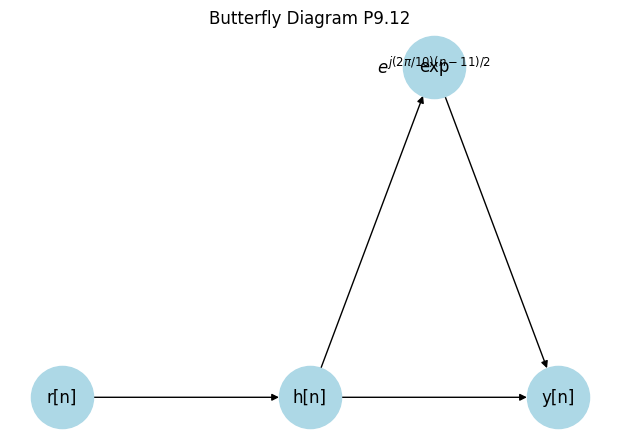

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# ایجاد گراف جهت نمایش دیاگرام پروانه‌ای
G = nx.DiGraph()

# افزودن گره‌ها برای فیگور P9.12
G.add_node('r[n]', pos=(0, 0))
G.add_node('h[n]', pos=(2, 0))
G.add_node('y[n]', pos=(4, 0))
G.add_node('exp', pos=(3, 0.5), label=r'$e^{j(2\pi/10)(n-11)/2}$')

# افزودن یال‌ها برای فیگور P9.12
G.add_edge('r[n]', 'h[n]')
G.add_edge('h[n]', 'y[n]')
G.add_edge('h[n]', 'exp')
G.add_edge('exp', 'y[n]')

# ترسیم گراف
pos = nx.get_node_attributes(G, 'pos')
labels = nx.get_node_attributes(G, 'label')
plt.figure(figsize=(6, 4))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=12)
nx.draw_networkx_labels(G, pos, labels)
plt.title("Butterfly Diagram P9.12")
plt.show()


In [ ]:
import numpy as np
import matplot.pyplot as plt

n = np.arange(0,16)
h = np.exp(1j * (2 * np.pi / 10) * (n - 11)**2 / 2)

x = np.ones_like(n)

r = np.convolve(x, h, mode='full')[:len(x)]

print("خروجی r[n]:")
print(r)

plt.stem(np.real(r), basefmt=" ")
plt.title("Real part of r[n]")
plt.xlabel("n")
plt.ylabel("real(r[n])")
plt.grid(True)
plt.show()

<div dir="rtl" align="right">
9.13. فرض کنید که می خواهید یک دنباله x[n] به طول N = 16 را به ترتیب معکوس بیت برای ورودی به الگوریتم FFT مرتب کنید. ترتیب نمونه جدید را برای دنباله معکوس بیتی ارائه دهید.

In [ ]:
def bit_reverse_order(x):
  N = len(x)
  n_bits = int(np.log2(N))
  indices = np.arange(N)
  reversed_indices = np.array([int(f'{i:0{n_bits}b}'[::-1], 2) for i in indices])
  return x[reversed_indices]

x = np.arange(16)
x_bit_reversed =  bit_reverse_order(x)

print("original x[n]:", x)
print("Bit-reversed x[n]:", x_bit_reversed)

<div dir="rtl" align="right">
9.14. برای عبارت زیر، فرض کنید که دنباله x[n] دارای طول N = 2^v است و X[k] DFT نقطه N x[n] است. درست یا نادرست بودن جمله را مشخص کنید و پاسخ خود را توجیه کنید.

In [ ]:
True

<div dir="rtl" align="right">

9.15. پروانه در شکل P9.15 از یک FFT در فرکانس با N = 16 گرفته شده است، جایی که توالی ورودی به ترتیب عادی مرتب شده است. توجه داشته باشید که یک FFT 16 نقطه ای دارای چهار مرحله است که با m = 1، ...، 4 نمایه شده است. کدام یک از چهار مرحله دارای پروانه هایی به این شکل است؟ پاسخ خود را توجیه کنید.

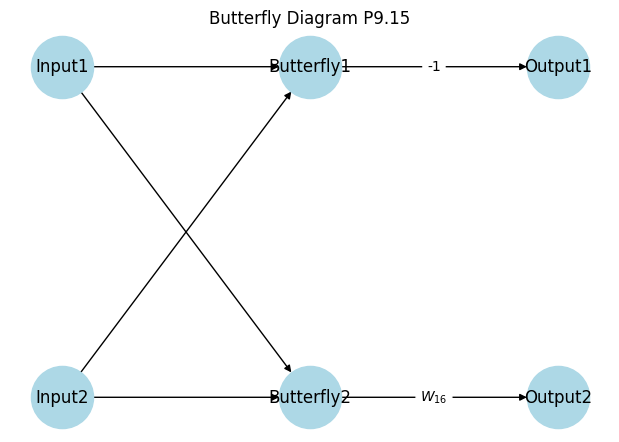

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# ایجاد گراف جهت نمایش دیاگرام پروانه‌ای
G = nx.DiGraph()

# افزودن گره‌ها برای فیگور P9.15
G.add_node('Input1', pos=(0, 1))
G.add_node('Input2', pos=(0, -1))
G.add_node('Butterfly1', pos=(2, 1))
G.add_node('Butterfly2', pos=(2, -1))
G.add_node('Output1', pos=(4, 1))
G.add_node('Output2', pos=(4, -1))

# افزودن یال‌ها برای فیگور P9.15
G.add_edge('Input1', 'Butterfly1')
G.add_edge('Input2', 'Butterfly2')
G.add_edge('Butterfly1', 'Output1', label='-1')
G.add_edge('Butterfly2', 'Output2', label='$W_{16}$')
G.add_edge('Input1', 'Butterfly2')
G.add_edge('Input2', 'Butterfly1')

# ترسیم گراف
pos = nx.get_node_attributes(G, 'pos')
plt.figure(figsize=(6, 4))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=12)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Butterfly Diagram P9.15")
plt.show()

In [ ]:
import numpy as np

def solve_question_9_15(N=16):
  stages = int(np.log2(N))
  print(f"Decimation-In-Fequency (DIF) for N = {N}")
  for m in range(1, stages + 1):
    distance = 2**(m - 1)
    print(f"stage {m}: Butterfly connection distance = {distance}")

solve_question_9_15()

<div dir="rtl" align="right">
9.16. پروانه در شکل P9.16 از یک FFT decimation-in-time با N = 16 گرفته شده است. فرض کنید که چهار مرحله نمودار جریان سیگنال با m = 1، ...، 4 نمایه شده است. مقادیر ممکن r برای هر یک از چهار مرحله چیست؟

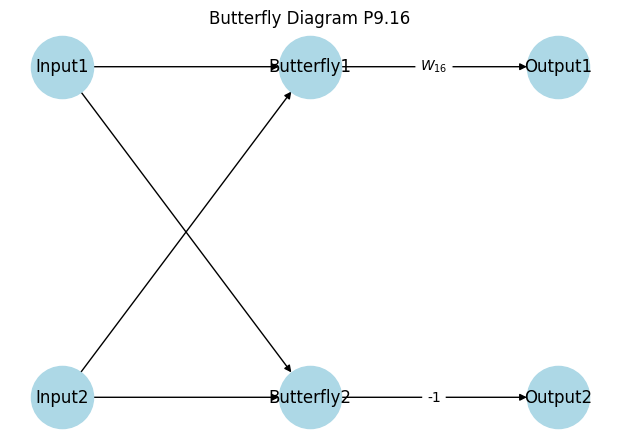

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# ایجاد گراف جهت نمایش دیاگرام پروانه‌ای
G = nx.DiGraph()

# افزودن گره‌ها برای فیگور P9.16
G.add_node('Input1', pos=(0, 1))
G.add_node('Input2', pos=(0, -1))
G.add_node('Butterfly1', pos=(2, 1))
G.add_node('Butterfly2', pos=(2, -1))
G.add_node('Output1', pos=(4, 1))
G.add_node('Output2', pos=(4, -1))

# افزودن یال‌ها برای فیگور P9.16
G.add_edge('Input1', 'Butterfly1')
G.add_edge('Input2', 'Butterfly2')
G.add_edge('Butterfly1', 'Output1', label='$W_{16}$')
G.add_edge('Butterfly2', 'Output2', label='-1')
G.add_edge('Input1', 'Butterfly2')
G.add_edge('Input2', 'Butterfly1')

# ترسیم گراف
pos = nx.get_node_attributes(G, 'pos')
plt.figure(figsize=(6, 4))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=12)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Butterfly Diagram P9.16")
plt.show()

In [ ]:
import numpy as np

def solve_question_9_16(N=16):
  stages(int(np.log2(N))
  print(f"Decimation-In-Time (DIT) for N = {N}")
  for m in range(1, stages + 1):
    distance = N // (2**m)
    print(f"Stage {m}: Butterfly connection distance = {distance}")

solve_question_9_16()

<div dir="rtl" align="right">
9.17. فرض کنید دو برنامه برای محاسبه DFT یک دنباله x[n] دارید که دارای نمونه های غیر صفر N = 2^v است. برنامه A DFT را با پیاده سازی مستقیم تعریف مجموع DFT از معادله محاسبه می کند. (8.67) و N^2 ثانیه طول می کشد تا اجرا شود. برنامه B الگوریتم FFT decimation-in-time را پیاده سازی می کند و 10N log_2 N ثانیه اجرا می شود. کوتاه ترین دنباله N کدام است که برنامه B سریعتر از برنامه A اجرا شود؟

In [ ]:
import numpy as np

def find_minimum_N():
  N = 2
  while True:
    time_A = N**2
    time_B = 10 * N * np.log2(N)
    if time_B < time_A:
      print(f"The smallest N where program B (FFT) is faster than program a (Direct DFT) is: N = {N}")
      break
    N *= 2

find_minimum_N()

<div dir="rtl" align="right">
9.18. پروانه در شکل P9.18 از یک FFT در زمان قطع با N = 16 گرفته شده است. فرض کنید که چهار مرحله نمودار جریان سیگنال با m = 1، ...، 4 نمایه شده است. کدام یک از چهار مرحله دارای پروانه هایی به این شکل هستند؟

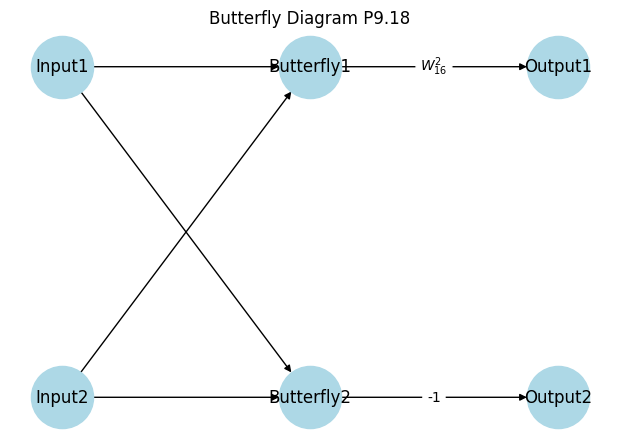

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

# ایجاد گراف جهت نمایش دیاگرام پروانه‌ای
G = nx.DiGraph()

# افزودن گره‌ها برای فیگور P9.18
G.add_node('Input1', pos=(0, 1))
G.add_node('Input2', pos=(0, -1))
G.add_node('Butterfly1', pos=(2, 1))
G.add_node('Butterfly2', pos=(2, -1))
G.add_node('Output1', pos=(4, 1))
G.add_node('Output2', pos=(4, -1))

# افزودن یال‌ها برای فیگور P9.18
G.add_edge('Input1', 'Butterfly1')
G.add_edge('Input2', 'Butterfly2')
G.add_edge('Butterfly1', 'Output1', label='$W_{16}^2$')
G.add_edge('Butterfly2', 'Output2', label='-1')
G.add_edge('Input1', 'Butterfly2')
G.add_edge('Input2', 'Butterfly1')

# ترسیم گراف
pos = nx.get_node_attributes(G, 'pos')
plt.figure(figsize=(6, 4))
nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=12)
edge_labels = nx.get_edge_attributes(G, 'label')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Butterfly Diagram P9.18")
plt.show()


In [ ]:
def find_butterfly_stage():
  N = 16
  stages = int(np.log2(N))

  print(f"Total stages: {stages}")

  for m in range(1, stages+1):
    distance = 2**(stages - m)
    print(f"stage {m}:Distance between butterfly pairs= {distance}")

find_butterfly_stage()

<div dir="rtl" align="right">
9.19. فرض کنید به شما گفته می شود که یک الگوریتم FFT N = 32 دارای ضریب "twiddle" W_32^2 برای یکی از پروانه ها در مرحله پنجم (آخرین) خود است. آیا FFT یک الگوریتم decimation-in-time یا decimation-in-frequency است؟

In [ ]:
import numpy as np

def analyze_fft_twiddle(N=32, last_stages=5):
  W_N_2 = np.exp(-2j * np.pi * 2 / N)
  print(f"W_{N}^2 = {W_N_2}")

  if 2 < (N/2):
    print("Since exponent is small compared to N/2, algorithm is decimation-in-frequency (DIF).")
  else:
    print("Algorithm is Decimation-in-time (DIT).")

analyze_fft_twiddle()

<div dir="rtl" align="right">
9.20. فرض کنید یک سیگنال x[n] با 1021 نمونه غیر صفر دارید که می‌خواهید DFT آن را با محاسبه DFT تخمین بزنید. متوجه می شوید که کامپیوتر شما 100 ثانیه طول می کشد تا DFT 1021 نقطه ای x[n] را محاسبه کند. سپس سه نمونه با ارزش صفر را در انتهای دنباله اضافه می کنید تا یک دنباله 1024 نقطه ای x_1[n] تشکیل شود. همان برنامه در رایانه شما فقط به 1 ثانیه برای محاسبه X_1[k] نیاز دارد. با انعکاس، متوجه می‌شوید که با استفاده از x_1[n]، می‌توانید نمونه‌های بیشتری از X(e^jω) را در زمان بسیار کوتاه‌تری با افزودن چند صفر به انتهای x[n] و وانمود کردن طولانی‌تر بودن دنباله محاسبه کنید. این پارادوکس ظاهری را چگونه توضیح می دهید؟

In [ ]:
import numpy as np
import time

N1 = 1021
N2 = 1024

x1 = np.random.rand(N1)
x2 = np.pad(x1, (0, N2-N1), 'constant')

start_time = time.time()
X1 = np.fft.fft(x1, n=N1)
dft_time = time.time() - start_time

start_time = time.time()
X2 = np.fft.fft(x2, n=N2)
fft_time = time.time() - start_time

print(f"Time for DFT with N=1021: {dft_time:.6f} seconds")
print(f"Time for FFT with N=1024: {fft_time:.6f} seconds")

<div dir="rtl" align="right">
9.21. در بخش 9.1.2، از این واقعیت استفاده کردیم که W^kN_N = 1 برای استخراج یک الگوریتم بازگشتی برای محاسبه یک مقدار DFT خاص X[k] برای یک دنباله با طول محدود x[n]، n = 0، 1، ...، N - 1.

(الف) با استفاده از این واقعیت که W^kN_N = W^NN_N = 1، نشان می دهد که X[N - k] را می توان به عنوان خروجی پس از تکرار N معادله تفاوت نشان داده شده در شکل P9.21-1 به دست آورد. یعنی آن را نشان دهید
<div dir="rtl" align="left">
X[N - k] = y_k[N]

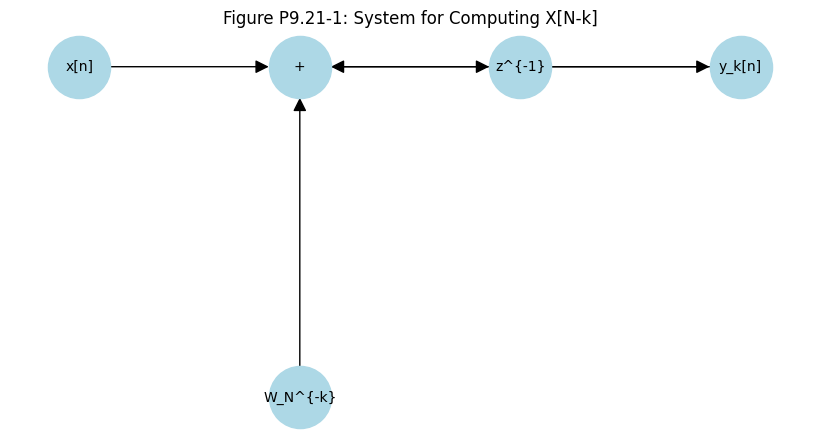

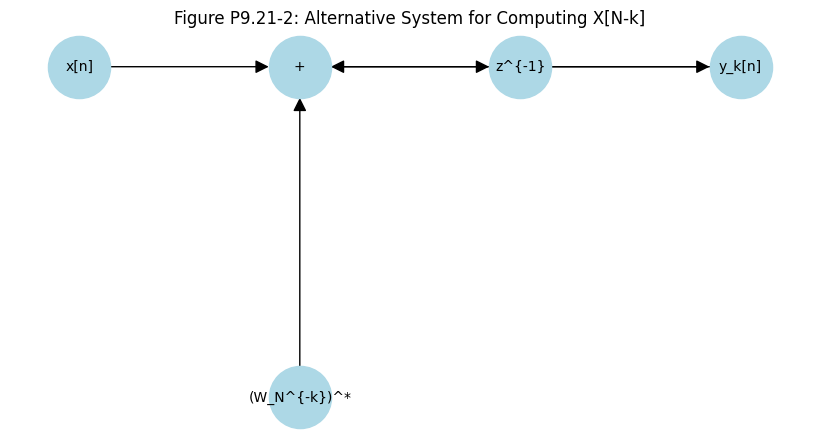

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_system_figure_p9_21_1():
    G = nx.DiGraph()

    # Add nodes
    G.add_node("x[n]", pos=(0, 1))
    G.add_node("+", pos=(1, 1))
    G.add_node("z^{-1}", pos=(2, 1))
    G.add_node("y_k[n]", pos=(3, 1))
    G.add_node("W_N^{-k}", pos=(1, 0))

    # Add edges
    G.add_edge("x[n]", "+")
    G.add_edge("+", "z^{-1}")
    G.add_edge("z^{-1}", "y_k[n]")
    G.add_edge("y_k[n]", "+", label="1")
    G.add_edge("W_N^{-k}", "+")

    pos = nx.get_node_attributes(G, 'pos')
    labels = {edge: G.edges[edge]['label'] for edge in G.edges if 'label' in G.edges[edge]}

    plt.figure(figsize=(8, 4))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, arrowsize=20)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='red')
    plt.title("Figure P9.21-1: System for Computing X[N-k]")
    plt.show()

def draw_system_figure_p9_21_2():
    G = nx.DiGraph()

    # Add nodes
    G.add_node("x[n]", pos=(0, 1))
    G.add_node("+", pos=(1, 1))
    G.add_node("z^{-1}", pos=(2, 1))
    G.add_node("y_k[n]", pos=(3, 1))
    G.add_node("(W_N^{-k})^*", pos=(1, 0))

    # Add edges
    G.add_edge("x[n]", "+")
    G.add_edge("+", "z^{-1}")
    G.add_edge("z^{-1}", "y_k[n]")
    G.add_edge("y_k[n]", "+", label="1")
    G.add_edge("(W_N^{-k})^*", "+")

    pos = nx.get_node_attributes(G, 'pos')
    labels = {edge: G.edges[edge]['label'] for edge in G.edges if 'label' in G.edges[edge]}

    plt.figure(figsize=(8, 4))
    nx.draw(G, pos, with_labels=True, node_size=2000, node_color='lightblue', font_size=10, arrowsize=20)
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels, font_color='red')
    plt.title("Figure P9.21-2: Alternative System for Computing X[N-k]")
    plt.show()

# Draw the figures
draw_system_figure_p9_21_1()
draw_system_figure_p9_21_2()

In [ ]:
import numpy as np
#for a
N = 8
x = np.random.rand(N)
k = 2

WN = np.exp (-2j * np.pi / N)
WNk = WN**k

y = np.zeros(N, dtype=complex)
for n in range(N):
  if n == 0:
    y[n] = x[n]
  else:
    y[n] = x[n] + WNk * y[n-1]

X_NK = y[-1]
print(f"X[N - k] = {X_Nk}")

#for b
WNk_conj = np.conj(WNk)

y_b= np.zeros(N, dtype=complex)
for n in range(N):
  if n == 0:
    y_b[n] = x[n]
  else:
    y_b[n] = x[n] + WNk_conj * y_b[n-1]

X_Nk_b = y_b[-1]
print(f"(b) x[N-k] = {X_Nk_b}")

<div dir="rtl" align="right">
9.22. سیستم نشان داده شده در شکل P9.22 را در نظر بگیرید. زیرسیستم از x[n] تا y[n] یک سیستم علی، LTI است که معادله تفاوت را پیاده‌سازی می‌کند.
<div dir="rtl" align="left">
y[n] = x[n] + ay[n - 1].
<div dir="rtl" align="right">
x[n] یک دنباله طول محدود به طول 90 است، یعنی:

x[n] = 0 برای n < 0 و n > 89.

n = M

یک انتخاب برای ثابت مختلط a و یک انتخاب برای لحظه نمونه برداری M تعیین کنید تا

<div dir="rtl" align="left">
y[M] = X(e^{jω})|{ω=2π/90}

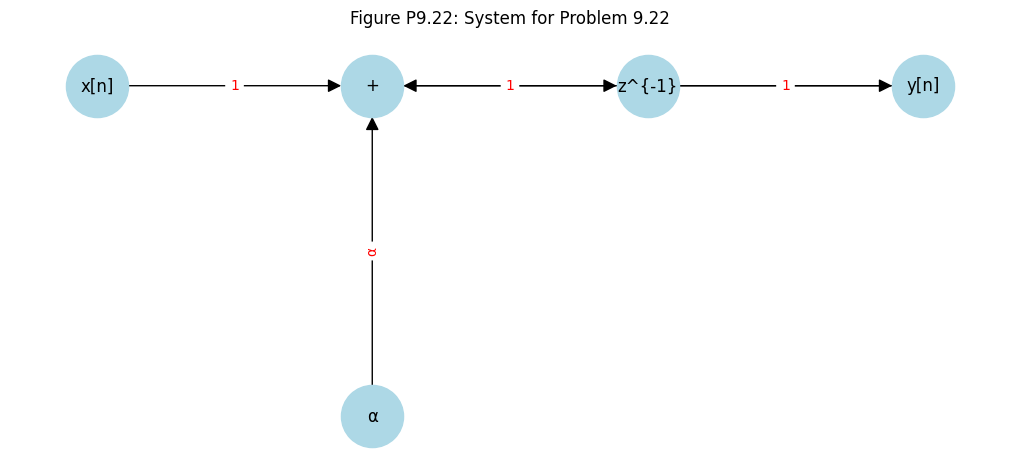

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

def draw_figure_p9_22():
    # ایجاد گراف جهت‌دار
    G = nx.DiGraph()

    # افزودن گره‌ها و موقعیت آن‌ها
    pos = {
        "x[n]": (0, 1),
        "+": (1.5, 1),
        "z^{-1}": (3, 1),
        "y[n]": (4.5, 1),
        "α": (1.5, 0),
    }

    # افزودن یال‌ها
    G.add_edge("x[n]", "+", label="1")
    G.add_edge("+", "z^{-1}", label="1")
    G.add_edge("z^{-1}", "y[n]", label="1")
    G.add_edge("y[n]", "+", label="1")  # فیدبک
    G.add_edge("α", "+", label="α")     # ضریب فیدبک

    # رسم گراف
    plt.figure(figsize=(10, 4))
    nx.draw(
        G, pos,
        with_labels=True,
        node_size=2000,
        node_color="lightblue",
        font_size=12,
        arrowsize=20,
    )
    nx.draw_networkx_edge_labels(
        G, pos,
        edge_labels={(u, v): d["label"] for u, v, d in G.edges(data=True)},
        font_color="red",
    )

    plt.title("Figure P9.22: System for Problem 9.22", pad=20)
    plt.axis("off")
    plt.show()

draw_figure_p9_22()

In [ ]:
import numpy as np

N = 90
x = np.random.rand(N)
a = 0.5

y = np.zeros(N)
for n in range(N):
  if n == 0:
    y[n] = x[n]
  else:
    y[n] = x[n] + a * y[n-1]

M = 50
print(f"y[M] = {y[M]}")


y[M] = 0.6618169556678442


<div dir="rtl" align="right">
9.23. یک نمودار جریان برای یک الگوریتم FFT 16 نقطه‌ای ریشه‌کن-2 decimation-in-time بسازید. همه ضرب‌کننده‌ها را بر حسب توان W{16} برچسب‌گذاری کنید، و همچنین هر انتقال شاخه‌ای را که برابر با -1 است، برچسب بزنید. گره های ورودی و خروجی را به ترتیب با مقادیر مناسب دنباله های ورودی و DFT برچسب گذاری کنید. تعداد ضرب های واقعی و تعداد جمع های واقعی مورد نیاز برای اجرای نمودار جریان را تعیین کنید.

In [ ]:
def fft_radix2(x):
  N = len(x)
  if N <=1:
    return x
  even = fft_radix2(x[::2])
  odd = fft_radix2(x[1::2])
  w = np.exp(-2j * np.pi * np.arange(N) / N)
  return np.concatenate([even + W[:N//2] * odd,even + W[N//2:] * odd])

N = 16
x = np.random.rand(N)
X = fft_radix2(x)

print(f"DFT of x using radix-2 FFT:\n{X}")



<div dir="rtl" align="right">
9.24. پیشنهاد می شود که اگر یک زیربرنامه FFT برای محاسبه DFT با طول N دارید، DFT معکوس یک دنباله نقطه N X[k] را می توان با استفاده از این زیربرنامه به صورت زیر پیاده سازی کرد:

جابجایی قسمت واقعی و خیالی هر ضریب DFT X[k]

روال FFT را روی این توالی ورودی اعمال کنید.

قسمت های واقعی و خیالی دنباله خروجی را عوض کنید.

توالی حاصل را با 1/N مقیاس کنید تا دنباله x[n]، متناظر با DFT معکوس X[k] به دست آید.
تعیین کنید که آیا این روش همانطور که ادعا می شود کار می کند یا خیر. اگر این کار را نکرد، یک اصلاح ساده پیشنهاد دهید که آن را کار کند.

In [ ]:
import numpy as np

def inverse_dft_via_fft(x):

  x_swapped = np.conj(x)

  x_fft(np.fft.fft(x_swapped))

  x = np.conj(x_fft)
  x = x / len(X)
  return x

x = np.random.rand(8) + 1j * np.random.rand(8)
X = np.fft.fft(x)
x_reconstructed = inverse_dft_via_fft(X)

print("original x:",x)
print("reconstructed x:", x_reconstructed)
print("error:", np.max(np.abs(x - x_reconstructed)))


<div dir="rtl" align="right">
9.25. DFT یک نسخه نمونه از DTFT از یک دنباله با طول محدود است. یعنی
<div dir="rtl" align="left">
X[k] = X(e^j(2π/N)k)
= X(e^jω)|ω=(2π/N)k
= ∑_(n=0)^(N-1) x[n]e^(-j(2π/N)nk) k = 0, 1, ..., N - 1.

(P9.25-1)
<div dir="rtl" align="right">
علاوه بر این، یک الگوریتم FFT روشی کارآمد برای محاسبه مقادیر X[k] است.
اکنون دنباله ای با طول محدود x[n] را در نظر بگیرید که طول آن N نمونه است. می‌خواهیم X(z)، تبدیل z دنباله‌ای با طول محدود را در نقاط زیر در صفحه z ارزیابی کنیم.
<div dir="rtl" align="left">
z_k = re^(j(2π/N)k) k = 0, 1, ..., N - 1,
<div dir="rtl" align="right">
جایی که r یک عدد مثبت است. ما یک الگوریتم FFT در دسترس داریم.

الف) نقاط z_k را در صفحه z برای حالت N = 8 و r = 0.9 رسم کنید.

(ب) معادله ای بنویسید [مشابه معادله. (P9.25-1) بالا] برای X(z_k) که نشان می دهد X(z_k) DFT یک دنباله اصلاح شده x[n] است. x[n] چیست؟

(ج) الگوریتمی را برای محاسبه X(z_k) با استفاده از تابع FFT داده شده توصیف کنید. (ارزیابی مستقیم یک گزینه نیست).

In [ ]:
import numpy as np
r = 0.9
theta = 2 * np.pi * np.arange(N) / N
z_k = r * np.exp(1j * theta)

plt.figure(figsize=(6,6))
plt.plot(np.real(z_k), np.imag(z_k), 'o-')
ply.title('points $z_k$ in the z-plane')
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.grid(True)
plt.gca().set_aspect('equal')
plt.show()

<div dir="rtl" align="right">
9.26. دنباله ای با طول محدود x[n] به طول 627 به ما داده می شود (یعنی x[n] = 0 برای n < 0 و n> 626)، و ما برنامه ای در دسترس داریم که DFT یک دنباله با هر طول N = 2^v را محاسبه می کند.
برای دنباله داده شده، می خواهیم نمونه هایی از DTFT را در فرکانس ها محاسبه کنی
<div dir="rtl" align="left">
ω_k = 2π/627 + 2πk/256, k = 0, 1, ..., 255.
<div dir="rtl" align="right">
نحوه به دست آوردن یک دنباله جدید y[n] از x[n] را مشخص کنید به طوری که نمونه های فرکانس مورد نظر را بتوان با اعمال برنامه FFT موجود برای y[n] با v کوچکترین مقدار ممکن به دست آورد.

In [ ]:
import numpy as np

N = 256
L = 627

x = np.random.randn(L)

x_padded = np.zeros(N)
x_padded[:L] = x

X = np.fft.fft(x_padded)

omega_k = (2 * np.pi / 627) * np.arange(256)
print("Sampled frequencies w_k calculated. ")

<div dir="rtl" align="right">
9.27. یک سیگنال با طول محدود L = 500 (x[n] = 0 برای n < 0 و n > L - 1) با نمونه برداری از یک سیگنال زمان پیوسته با نرخ نمونه برداری 10000 نمونه در ثانیه به دست می آید. ما می خواهیم نمونه هایی از تبدیل z x[n] را در N نقطه با فاصله مساوی z_k = (0.8)e^(j2πk/N)، برای 0 ≤ k ≤ N - 1، با فاصله فرکانس موثر 50 هرتز یا کمتر محاسبه کنیم.

(الف) حداقل مقدار N را اگر N = 2^v تعیین کنید.

(ب) یک دنباله y[n] به طول N را تعیین کنید، جایی که N مطابق با قسمت (a) تعیین شده است، به طوری که DFT Y[k] آن برابر با نمونه های مورد نظر از تبدیل z x[n] باشد.

In [ ]:
import numpy as np

L = 500
Fs = 10000
effective_bandwidth = 50

N_min = int(np.ceil(Fs / effectivr_bandwidth))
N = 2**int(np.ceil(np.log2(N_min)))

print(f"Minimum N = {N}")

x = np.random.randn(L)
x_padded = np.zeros(N)
x_padded[:L] = x

X = np.fft.fft(x_padded)

z_k 0.8 * np.exp(2j * np.pi * np.arange(N) / N)
print("DFT computed at desired points.")

<div dir="rtl" align="right">
9.28. از شما خواسته می شود سیستمی بسازید که DFT یک دنباله 4 نقطه ای را محاسبه کند
x[0]، x[1]، x[2]، x[3].
شما می توانید هر تعداد واحد محاسباتی را با هزینه هر واحد که در جدول 9.1 نشان داده شده است خریداری کنید.

طراحی سیستمی با کمترین هزینه ممکن بلوک دیاگرام مربوطه را رسم کنید و هزینه سیستم را نشان دهید.

In [ ]:
import pandas as pd

# داده‌های جدول
data = {
    "Module": ["8-point DFT", "8-point IDFT", "Adder", "Multiplier"],
    "Per-Unit Cost": ["$1", "$1", "$10", "$100"]
}

# ایجاد DataFrame
df = pd.DataFrame(data)

# نمایش جدول
print(df)

         Module Per-Unit Cost
0   8-point DFT            $1
1  8-point IDFT            $1
2         Adder           $10
3    Multiplier          $100


In [ ]:
import numpy as np

def dft_4_point(x):
    # بررسی طول ورودی
    if len(x) != 4:
        raise ValueError("ورودی باید شامل 4 نقطه باشد.")

    # تکمیل دنباله با صفر تا 8 نقطه
    x_padded = np.concatenate((x, np.zeros(4)))

    # محاسبه DFT با استفاده از تابع FFT
    dft_result = np.fft.fft(x_padded)

    # نمایش نتیجه
    print("DFT (4-point) نتیجه:")
    for k, value in enumerate(dft_result):
        print(f"X[{k}] = {value:.2f}")

# مثال استفاده
x = [1, 2, 3, 4]  # ورودی نمونه
dft_4_point(x)


<div dir="rtl" align="right">
9.29. یک دنباله N-نقطه ای x[n] با DFT X[k]، k = 0،1،...،N 1 در نظر بگیرید. الگوریتم زیر مقادیر DFT با نمایه زوج X[k]، k = 0، 2،...، N-2 را برای N زوج، با استفاده از تنها یک N/2 نقطه DFT محاسبه می کند:

1. دنباله y[n] را با نام مستعار زمان تشکیل دهید، به عنوان مثال،
x[n]+x[n+N/2]، 0 ≤ n ≤N/2-1، در غیر این صورت.
y[n] = {x[n]}

2. Y[r]، r = 0، 1،...، (N/2) - 1، N/2 نقطه DFT y[n] را محاسبه کنید.

3. سپس مقادیر زوج شاخص X[k] X[k] = Y[k/2]، برای k = 0، 2،...، N-2 است.

(الف) نشان دهید که الگوریتم قبلی نتایج مورد نظر را ایجاد می کند.

 (ب) حال فرض کنید که یک دنباله با طول محدود y[n] از یک دنباله x[n] توسط

y[n] =
Σ x[n+rM], 0≤ n ≤ M − 1,
7=-∞0

در غیر این صورت.
رابطه بین نقطه M DFT Y[k] و X(ej")، تبدیل فوریه x[n] را تعیین کنید. نشان دهید که نتیجه قسمت (a) حالت خاصی از نتیجه قسمت (b) است.

(ج) الگوریتمی شبیه به قسمت (الف) برای محاسبه مقادیر DFT با نمایه فرد X[k]، k = 1،3،...، N-1، برای N زوج، با استفاده از تنها یک N/2 نقطه DFT ایجاد کنید.



In [ ]:
import numpy as np

def even_index_dft(x):
  N = len(x)
  y = np.zeros(N//2, dtype=complex)

  for n in range(N//2):
    y[n] = x[n] + x[n + n//2]

    T = np.fft.fft(y)
    X_even = T

    return X_even

N = 8
x = np.random.rand(N)

X_full = np.fft.fft(x)
X_even_correct = X_full[::2]

X_even_computed = even_index_dft(x)

print('original_sequence:',x)
print("Full DFT:",X_full)
print("Correct even-indexed DFT values:",X_even_correct)
print("computed even-indexed DFT values:",X_even_computed)
print("Are they equal?",np.allclose(X_even_correct, X_even_computed))

<div dir="rtl" align="right">
9.30 سیستم در شکل P9.30 یک N-نقطه (که در آن N یک عدد زوج است) DFT X[k] از یک دنباله نقطه N x[n] را با تجزیه x[n] به دو دنباله N/2 نقطه‌ای g1[n] و 82[n]، محاسبه N/2 نقطه‌ای DFT و سپس G1]k را محاسبه می‌کند. X[k].

اگر g1[n] مقادیر زوج نمایه شده x[n] و g2[n] مقادیر نمایه شده فرد x[n] باشد، یعنی 81[n] = x[2n] و g2[n] = x[2n + 1]، X[k] DFT x[n] خواهد بود.
در استفاده از سیستم در شکل P9.30 خطایی در تشکیل 81[n] و g2[n] رخ داده است، به طوری که 81[n] به اشتباه به‌عنوان مقادیر نمایه‌شده فرد و g2[n] به‌عنوان مقادیر نمایه‌شده زوج انتخاب شده است، اما G1[k] و G2[k] همچنان مانند شکل [30] و نتیجه‌ی 9P9 ترکیب می‌شوند. [k] را بر حسب X[k] بیان کنید.

<ipython-input-1-224e85bc08f7>:42: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


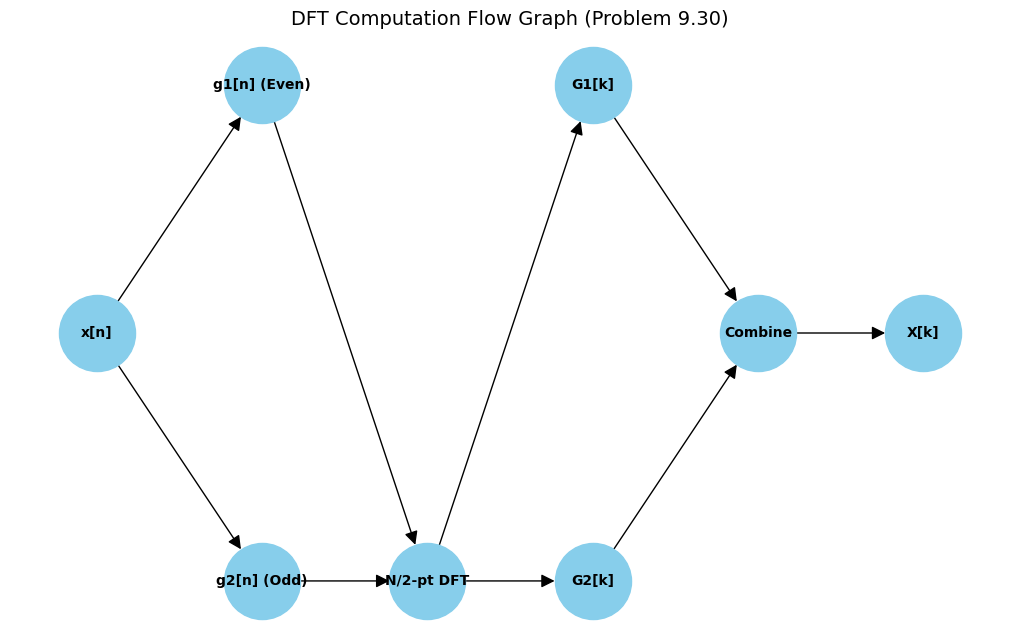

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_dft_flow_graph():
    # Create a directed graph
    G = nx.DiGraph()

    # Add nodes
    G.add_node("x[n]", pos=(0, 1))
    G.add_node("g1[n] (Even)", pos=(1, 1.5))
    G.add_node("g2[n] (Odd)", pos=(1, 0.5))
    G.add_node("N/2-pt DFT", pos=(2, 1.5))
    G.add_node("N/2-pt DFT", pos=(2, 0.5))
    G.add_node("G1[k]", pos=(3, 1.5))
    G.add_node("G2[k]", pos=(3, 0.5))
    G.add_node("Combine", pos=(4, 1))
    G.add_node("X[k]", pos=(5, 1))

    # Add edges
    G.add_edge("x[n]", "g1[n] (Even)")
    G.add_edge("x[n]", "g2[n] (Odd)")
    G.add_edge("g1[n] (Even)", "N/2-pt DFT")
    G.add_edge("g2[n] (Odd)", "N/2-pt DFT")
    G.add_edge("N/2-pt DFT", "G1[k]")
    G.add_edge("N/2-pt DFT", "G2[k]")
    G.add_edge("G1[k]", "Combine")
    G.add_edge("G2[k]", "Combine")
    G.add_edge("Combine", "X[k]")

    # Get positions
    pos = nx.get_node_attributes(G, 'pos')

    # Draw the graph
    plt.figure(figsize=(10, 6))
    nx.draw(G, pos, with_labels=True, node_size=3000, node_color='skyblue',
            font_size=10, font_weight='bold', arrowsize=20)

    # Add title
    plt.title("DFT Computation Flow Graph (Problem 9.30)", fontsize=14)

    # Show the plot
    plt.tight_layout()
    plt.show()

# Draw the flow graph
draw_dft_flow_graph()

In [ ]:
import numpy as np

def incorrect_dft_decomposition(x):
  N = len(x)

  g1 = x[1::2]
  g2 = x[::2]

  G1 = np.fft.fft(g1)
  G2 = np.fft.fft(g2)

  X_incorrect = np.zeros(N,dtype=complex)
  for k in range(N):
    X_incorrect[k] = G1[k % (N//2)] + np.exp(-2j * np.pi * k/N) * G2[k % (N//2)]

  X_correct = np.fft.fft(x)

  return X_incorrect,X_correct

N = 8
x = np.random.rand(N)
X_incorrect, x_correct = incorrect_dft_decomposition(x)

print("original sequence:", x)
print("Correct DFT:", X_correct)
print("incorrect_DFT:", X_incorrect)
print("Relationship between incorrect and correct DFT:")
print("X_incorrect[k] = X_correct[(k + N/2) % N]")



<div dir="rtl" align="right">
9.31. در بخش 9.3.2، بیان شد که انتقال نمودار جریان یک الگوریتم FFT نیز نمودار جریان یک الگوریتم FFT است. هدف از این مشکل توسعه آن نتیجه برای الگوریتم‌های FFT radix-2 است.
(الف) پروانه اصلی برای الگوریتم FFT ریشه در فرکانس کاهش یافته در شکل P9.31-1 نشان داده شده است. این نمودار جریان معادلات را نشان می دهد

Xm[p] = Xm-1[p]+ Xm-1[q],

Xm[q] = (Xm-1[P] - Xm-1[q])WN

با شروع با این معادلات، نشان دهید که Xm-1[p] و Xm-1[q] را می توان به ترتیب از Xm[p] و Xm[q] با استفاده از پروانه نشان داده شده در شکل P9.31-2 محاسبه کرد.

(ب) در الگوریتم کاهش در فرکانس شکل 9.22، X،[r]، r = 0،1،...، N-1 DFT X[k] است که به ترتیب معکوس بیت چیده شده است، و Xo[r]= x[r]، r = 0،1،...، N-1. یعنی آرایه صفر دنباله ورودی است که به ترتیب عادی مرتب شده است. اگر هر پروانه در شکل 9.22 با پروانه مناسب شکل P9.31 جایگزین شود، نتیجه یک نمودار جریان برای محاسبه دنباله x[n] (به ترتیب عادی) از DFT X[k] (به ترتیب معکوس بیت) خواهد بود. نمودار جریان حاصل را برای N = 8 رسم کنید.

(ج) نمودار جریان به دست آمده در قسمت (ب) نشان دهنده یک الگوریتم معکوس DFT، یعنی یک الگوریتم برای محاسبه است.

N-1
1
x[n] =
N
ΣX[k]Wkn
n = 0,1,..., N-1.
n=0

نمودار جریان به دست آمده در قسمت (ب) را طوری تغییر دهید که DFT را محاسبه کند

N-1
n=0
X[k] = x[n]Wk,
k=0,1,..., N-1,

به جای DFT معکوس.

(د) توجه کنید که نتیجه قسمت (ج) جابجایی الگوریتم decimation-in-frequency شکل 9.22 است و با الگوریتم decimation-in-time که در شکل 9.11 نشان داده شده است یکسان است. آیا نتیجه می‌شود که برای هر الگوریتم کاهش در زمان (به عنوان مثال، شکل‌های 9.15-9.17)، یک الگوریتم کاهش در فرکانس مطابقت دارد که جابجایی الگوریتم کاهش در زمان است و بالعکس؟ توضیح دهید.

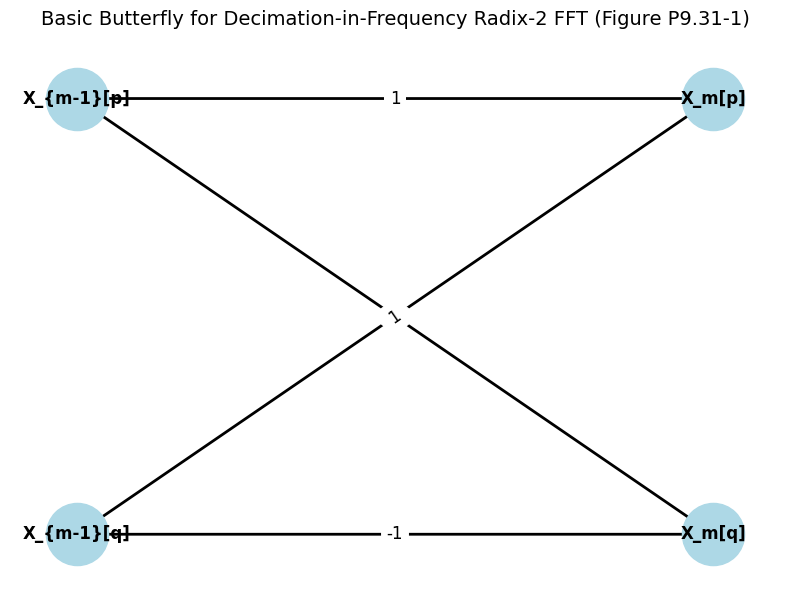

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx

def draw_butterfly_figure_31_1():
    plt.figure(figsize=(8, 6))
    G = nx.DiGraph()

    # Nodes
    G.add_node("X_{m-1}[p]", pos=(0, 1))
    G.add_node("X_{m-1}[q]", pos=(0, 0))
    G.add_node("X_m[p]", pos=(2, 1))
    G.add_node("X_m[q]", pos=(2, 0))

    # Edges
    G.add_edge("X_{m-1}[p]", "X_m[p]", label="1")
    G.add_edge("X_{m-1}[p]", "X_m[q]", label="1")
    G.add_edge("X_{m-1}[q]", "X_m[p]", label="1")
    G.add_edge("X_{m-1}[q]", "X_m[q]", label="-1")

    # Positions
    pos = nx.get_node_attributes(G, 'pos')

    # Draw nodes and edges
    nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='lightblue')
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
    nx.draw_networkx_edges(G, pos, width=2, arrowsize=20)

    # Edge labels (weights)
    edge_labels = {("X_{m-1}[p]", "X_m[p]"): "1",
                   ("X_{m-1}[p]", "X_m[q]"): "1",
                   ("X_{m-1}[q]", "X_m[p]"): "1",
                   ("X_{m-1}[q]", "X_m[q]"): "-1"}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

    # Title and axis
    plt.title("Basic Butterfly for Decimation-in-Frequency Radix-2 FFT (Figure P9.31-1)",
              fontsize=14, pad=20)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

draw_butterfly_figure_31_1()

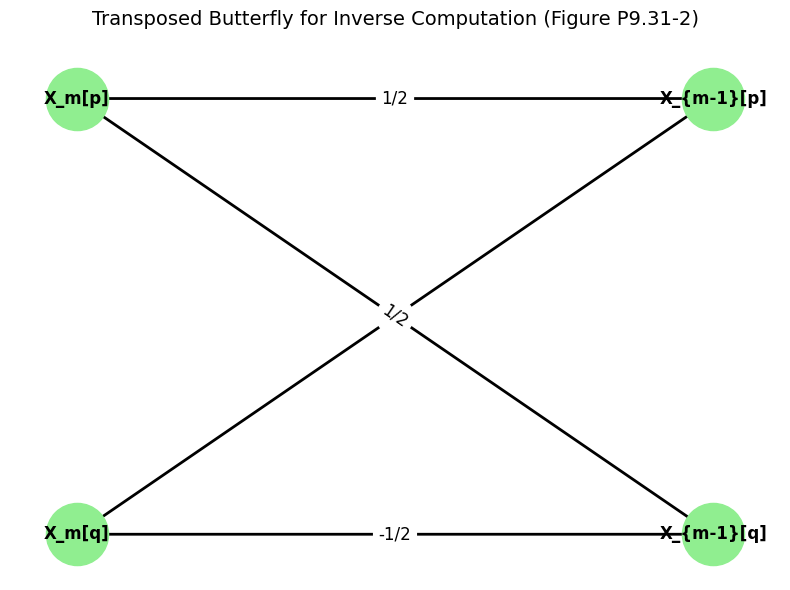

In [ ]:
def draw_butterfly_figure_31_2():
    plt.figure(figsize=(8, 6))
    G = nx.DiGraph()

    # Nodes
    G.add_node("X_m[p]", pos=(0, 1))
    G.add_node("X_m[q]", pos=(0, 0))
    G.add_node("X_{m-1}[p]", pos=(2, 1))
    G.add_node("X_{m-1}[q]", pos=(2, 0))

    # Edges
    G.add_edge("X_m[p]", "X_{m-1}[p]", label="1/2")
    G.add_edge("X_m[q]", "X_{m-1}[p]", label="1/2")
    G.add_edge("X_m[p]", "X_{m-1}[q]", label="1/2")
    G.add_edge("X_m[q]", "X_{m-1}[q]", label="-1/2")

    # Positions
    pos = nx.get_node_attributes(G, 'pos')

    # Draw nodes and edges
    nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='lightgreen')
    nx.draw_networkx_labels(G, pos, font_size=12, font_weight='bold')
    nx.draw_networkx_edges(G, pos, width=2, arrowsize=20)

    # Edge labels (weights)
    edge_labels = {("X_m[p]", "X_{m-1}[p]"): "1/2",
                   ("X_m[q]", "X_{m-1}[p]"): "1/2",
                   ("X_m[p]", "X_{m-1}[q]"): "1/2",
                   ("X_m[q]", "X_{m-1}[q]"): "-1/2"}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=12)

    # Title and axis
    plt.title("Transposed Butterfly for Inverse Computation (Figure P9.31-2)",
              fontsize=14, pad=20)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

draw_butterfly_figure_31_2()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def inverse_butterfly(Xm_p, Xm_q, r, N):
  W = np.exp(-2j * np.pi * r / N)
  Xm_1_p = 0.5 * (Xm_p + Xm_q)
  Xm_1_q = 0.5 * (Xm_p + Xm_q) * W

  return Xm_1_p,Xm_1_q

N = 8
r = 1
Xm_p = 3 + 4j
Xm_q = 1 - 2j

Xm_1_p,Xm_1_q = inverse_butterfly(Xm_p, Xm_q, r, N)
print(f"Input: Xm[p]={Xm_p}, Xm[q]={Xm_q}")
print(f"output: Xm-1[p]={Xm_1_p},Xm-1[q]={Xm_1_q}")

print("\nText representation of N=8 flow graph (part b):")
print("Stage 3 (output reversed or der): X3[0] X3[4] X3[2] X3[6] X3[1] X3[5] X[3] X3[7]")
print('stage 2: 4 butterflies operating on adjacent pairs')
print("stage 1: 2 butterflies operating on groups of 4")
print("stage 0 (input normal order): x[0] x[1] x[2] x[3] x[4] x[5] x[6] x[7]")

<div dir="rtl" align="right">
9.32. ما می‌خواهیم FFT 6 نقطه‌ای را با استفاده از رویکرد ریشه‌ای مختلط پیاده‌سازی کنیم. یک گزینه این است که ابتدا سه DFTS 2 نقطه ای بگیرید و سپس از نتایج برای محاسبه DFT 6 نقطه ای استفاده کنید. برای این گزینه:

(الف) یک فلوگراف رسم کنید تا نشان دهید DFT 2 نقطه ای چه چیزی را محاسبه می کند. همچنین، قسمت هایی از فلوگراف را در شکل P9.32-1 پر کنید که در محاسبه مقادیر DFT Xo، X1 و X4 نقش دارند.

ب) این گزینه به چند ضرب مختلط نیاز دارد؟ (ضرب یک عدد در 1 جزء ضرب مختلط به حساب نمی آید.)گزینه دوم این است که با دو DFTS 3 نقطه ای شروع کنید و سپس از نتایج برای محاسبه DFT 6 نقطه ای استفاده کنید.

(ج) یک فلوگراف رسم کنید تا نشان دهید DFT 3 نقطه ای چه چیزی را محاسبه می کند. همچنین، تمام فلوگراف را در شکل P9.32-2 پر کنید و به طور خلاصه توضیح دهید که چگونه پیاده سازی خود را استخراج کرده اید:

(د) این گزینه به چند ضرب مختلط نیاز دارد؟


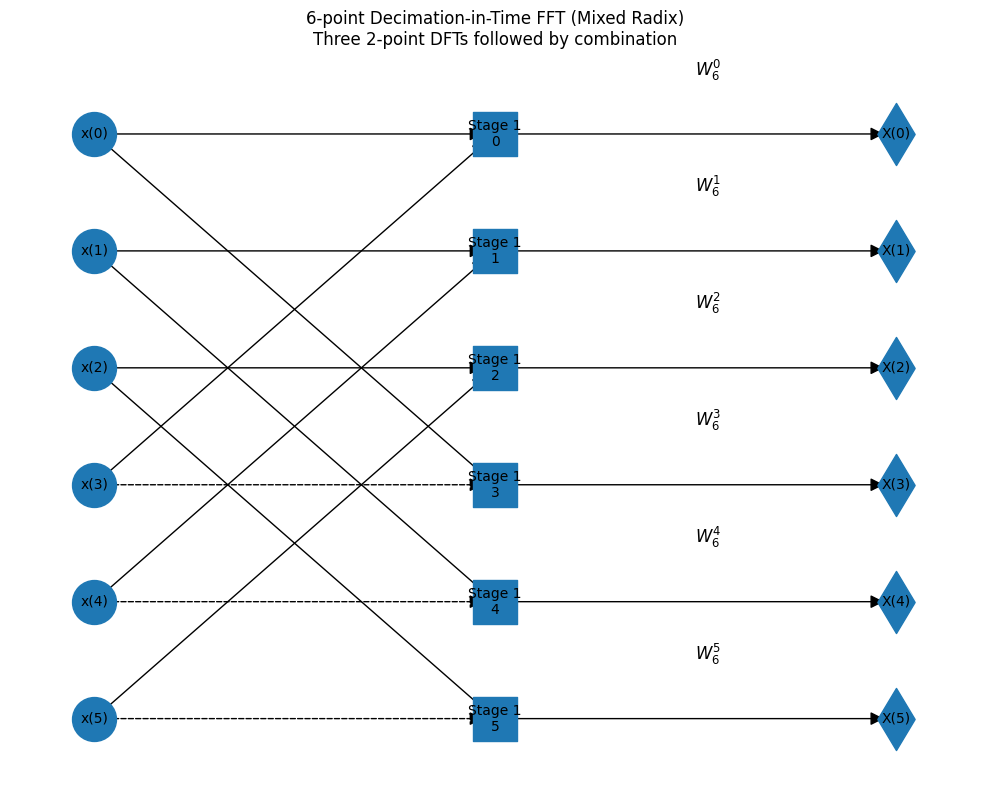

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

def draw_6point_dit_fft():
    plt.figure(figsize=(10, 8))
    G = nx.DiGraph()

    # Add nodes (stages)
    # Stage 0: Input nodes
    for i in range(6):
        G.add_node(f'x{i}', pos=(0, 5-i))

    # Stage 1: After first 2-point DFTs
    for i in range(6):
        G.add_node(f's1_{i}', pos=(2, 5-i))

    # Stage 2: Output nodes (X0-X5)
    for i in range(6):
        G.add_node(f'X{i}', pos=(4, 5-i))

    # Add edges for 2-point DFTs (first stage)
    # First group (x0, x3)
    G.add_edge('x0', 's1_0')
    G.add_edge('x3', 's1_0')
    G.add_edge('x0', 's1_3')
    G.add_edge('x3', 's1_3', style='dashed')

    # Second group (x1, x4)
    G.add_edge('x1', 's1_1')
    G.add_edge('x4', 's1_1')
    G.add_edge('x1', 's1_4')
    G.add_edge('x4', 's1_4', style='dashed')

    # Third group (x2, x5)
    G.add_edge('x2', 's1_2')
    G.add_edge('x5', 's1_2')
    G.add_edge('x2', 's1_5')
    G.add_edge('x5', 's1_5', style='dashed')

    # Add edges for second stage (butterflies)
    # Connect to outputs with appropriate weights
    W6 = np.exp(-2j*np.pi/6)
    for k in range(6):
        G.add_edge(f's1_{k}', f'X{k}')

    # Add twiddle factors where needed
    # For simplicity, we'll just show the connections

    # Draw the graph
    pos = nx.get_node_attributes(G, 'pos')

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, nodelist=[f'x{i}' for i in range(6)], node_shape='o', node_size=1000)
    nx.draw_networkx_nodes(G, pos, nodelist=[f's1_{i}' for i in range(6)], node_shape='s', node_size=1000)
    nx.draw_networkx_nodes(G, pos, nodelist=[f'X{i}' for i in range(6)], node_shape='d', node_size=1000)

    # Draw edges
    solid_edges = [(u,v) for u,v,attr in G.edges(data=True) if 'style' not in attr or attr['style'] != 'dashed']
    dashed_edges = [(u,v) for u,v,attr in G.edges(data=True) if 'style' in attr and attr['style'] == 'dashed']

    nx.draw_networkx_edges(G, pos, edgelist=solid_edges, arrowstyle='-|>', arrowsize=20)
    nx.draw_networkx_edges(G, pos, edgelist=dashed_edges, style='dashed', arrowstyle='-|>', arrowsize=20)

    # Labels
    labels = {}
    for i in range(6):
        labels[f'x{i}'] = f'x({i})'
        labels[f's1_{i}'] = f'Stage 1\n{i}'
        labels[f'X{i}'] = f'X({i})'

    nx.draw_networkx_labels(G, pos, labels, font_size=10)

    # Add twiddle factor labels
    plt.text(3, 5.5, r'$W_6^0$', fontsize=12)
    plt.text(3, 4.5, r'$W_6^1$', fontsize=12)
    plt.text(3, 3.5, r'$W_6^2$', fontsize=12)
    plt.text(3, 2.5, r'$W_6^3$', fontsize=12)
    plt.text(3, 1.5, r'$W_6^4$', fontsize=12)
    plt.text(3, 0.5, r'$W_6^5$', fontsize=12)

    plt.title('6-point Decimation-in-Time FFT (Mixed Radix)\nThree 2-point DFTs followed by combination', pad=20)
    plt.axis('off')
    plt.tight_layout()
    plt.show()

draw_6point_dit_fft()

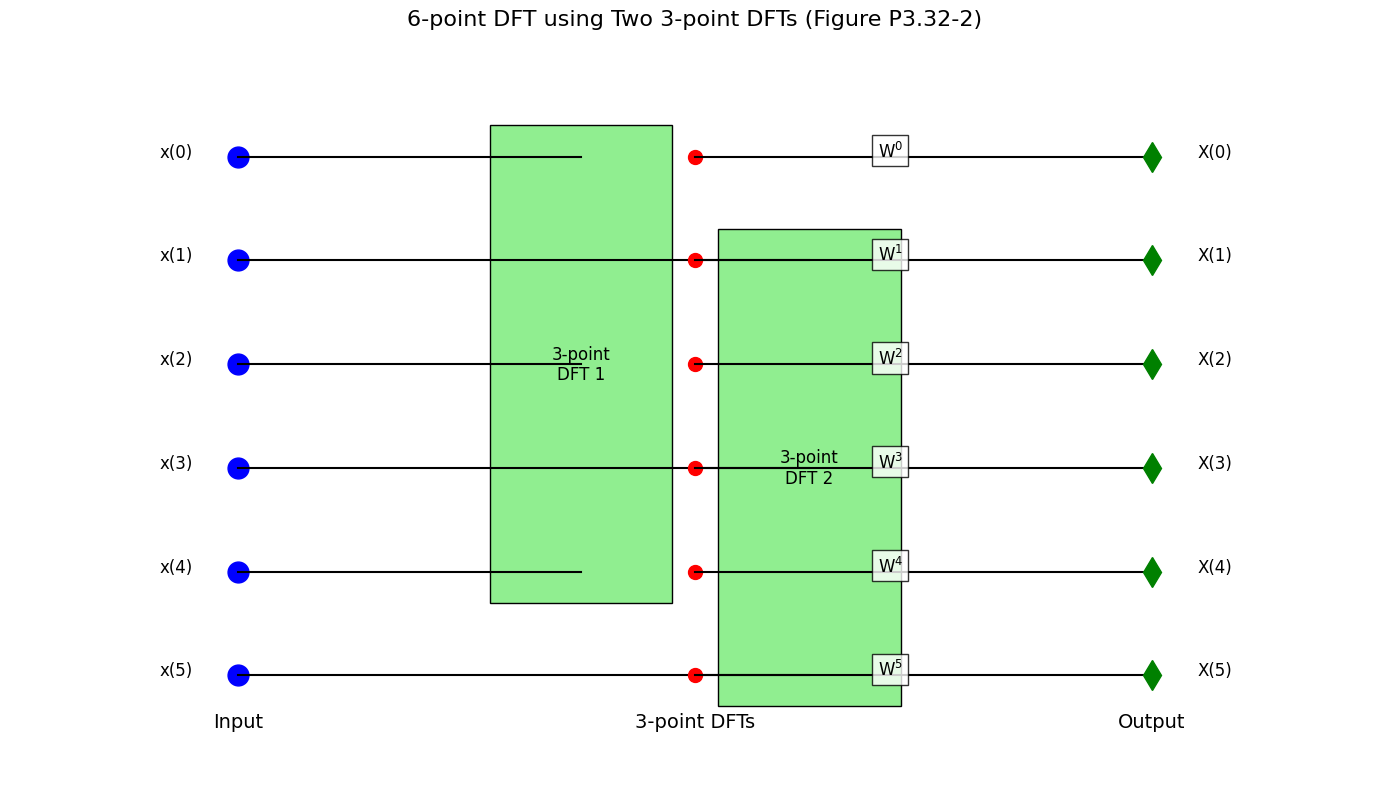

In [ ]:
import matplotlib.pyplot as plt
import networkx as nx
import numpy as np

def draw_figure_p3_32_2():
    # Create figure
    plt.figure(figsize=(14, 8))
    ax = plt.gca()

    # Parameters
    num_points = 6
    stage1_x = 1
    stage2_x = 3
    stage3_x = 5
    y_positions = np.linspace(5, 0, num_points)

    # Draw input nodes
    for i in range(num_points):
        plt.plot(stage1_x, y_positions[i], 'bo', markersize=15)
        plt.text(stage1_x-0.2, y_positions[i], f'x({i})', fontsize=12, ha='right')

    # Draw 3-point DFT blocks
    dft1_x = stage2_x - 0.5
    dft2_x = stage2_x + 0.5

    # First 3-point DFT (x0, x2, x4)
    plt.plot([stage1_x, dft1_x], [y_positions[0], y_positions[0]], 'k-')
    plt.plot([stage1_x, dft1_x], [y_positions[2], y_positions[2]], 'k-')
    plt.plot([stage1_x, dft1_x], [y_positions[4], y_positions[4]], 'k-')

    # Second 3-point DFT (x1, x3, x5)
    plt.plot([stage1_x, dft2_x], [y_positions[1], y_positions[1]], 'k-')
    plt.plot([stage1_x, dft2_x], [y_positions[3], y_positions[3]], 'k-')
    plt.plot([stage1_x, dft2_x], [y_positions[5], y_positions[5]], 'k-')

    # Draw DFT boxes
    dft1_box = plt.Rectangle((dft1_x-0.4, y_positions[4]-0.3), 0.8, y_positions[0]-y_positions[4]+0.6,
                           fc='lightgreen', ec='k')
    dft2_box = plt.Rectangle((dft2_x-0.4, y_positions[5]-0.3), 0.8, y_positions[1]-y_positions[5]+0.6,
                           fc='lightgreen', ec='k')
    ax.add_patch(dft1_box)
    ax.add_patch(dft2_box)
    plt.text(dft1_x, np.mean(y_positions[[0,2,4]]), '3-point\nDFT 1',
            ha='center', va='center', fontsize=12)
    plt.text(dft2_x, np.mean(y_positions[[1,3,5]]), '3-point\nDFT 2',
            ha='center', va='center', fontsize=12)

    # Draw intermediate nodes
    for i in range(num_points):
        plt.plot(stage2_x, y_positions[i], 'ro', markersize=10)

    # Draw combination paths with twiddle factors
    W = np.exp(-2j*np.pi/6)
    for k in range(num_points):
        plt.plot([stage2_x, stage3_x], [y_positions[k], y_positions[k]], 'k-')
        plt.text(stage2_x+0.8, y_positions[k], f'W$^{k}$', fontsize=12,
                bbox=dict(facecolor='white', alpha=0.8))

    # Draw output nodes
    for i in range(num_points):
        plt.plot(stage3_x, y_positions[i], 'gd', markersize=15)
        plt.text(stage3_x+0.2, y_positions[i], f'X({i})', fontsize=12)

    # Add stage labels
    plt.text(stage1_x, -0.5, 'Input', fontsize=14, ha='center')
    plt.text(stage2_x, -0.5, '3-point DFTs', fontsize=14, ha='center')
    plt.text(stage3_x, -0.5, 'Output', fontsize=14, ha='center')

    # Set title and remove axes
    plt.title('6-point DFT using Two 3-point DFTs (Figure P3.32-2)', fontsize=16, pad=20)
    plt.axis('off')
    plt.xlim(0, 6)
    plt.ylim(-1, 6)
    plt.tight_layout()
    plt.show()

draw_figure_p3_32_2()

In [ ]:
import numpy as np

def six_point_dft_via_2point(x):

  x02 = x[0] + x[3]
  x12 = x[0] - x[3]
  x22 = x[1] + x[4]
  x32 = x[1] + x[4]
  x42 = x[2] + x[5]
  x52 = x[2] - x[5]

  W6 = np.exp(-2j * np.pi / 6)
  X = np.zeros(6, dtype=complex)

  X[0] = x02 + x22 + x42
  X[1] = x12 + x32 * W6**1 + x52 * W6**2
  X[2] = x02 + x22 * W6**2 + x42 * W6**4
  X[3] = x12 + x32 * W6**3 + x52 * W6**6
  X[4] = x02 + x22 * W6**4 + x42 * W6**8
  X[5] = x12 + x32 * W6**5 + x52 * W6**10

  return X

x = np.array([1,2,3,4,5,6])
X_correct = np.fft.fft(x)
X_computed = six_point_dft_via_2point(x)

print("input sequence:",x)
print("correct 6-point DFT:",X_correct)
print("computed via three 2-point DFTs:", X_computed)
print("Number of complex multiplications: 6 (3 for the 2-point DFTs and 3 twiddle factors)")

<div dir="rtl" align="right">
9.33. الگوریتم FFT decimation-in-frequency در بخش 9.3 برای ریشه 2، به عنوان مثال، N = 2 توسعه داده شد. یک رویکرد مشابه زمانی که N = 3 به یک الگوریتم radix-3 منجر می شود.

(الف) با استفاده از تجزیه 3×3 DFT، یک نمودار جریان برای یک الگوریتم 9 نقطه ای کاهش در فرکانس رسم کنید.

(ب) برای N 3، چند ضرب مختلط در توان های WN برای محاسبه DFT یک دنباله مختلط نقطه N با استفاده از الگوریتم FFT ریشه-3 در فرکانس مورد نیاز است؟

(ج) برای N = 3، آیا می توان از محاسبات در محل برای الگوریتم ریشه-3 decimation در فرکانس استفاده کرد؟

In [ ]:
import numpy as np
def six_point_dft_via_3point(x):

  x03 = x[0] + x[2] + x[4]
  x13 = x[0] + x[2] + * np.exp(-2j * np.pi * 1/3) + x[4] * np.exp(-2j * np.pi * 2/3)
  x23 = x[0] + x[2] * np.exp(-2j * np.pi * 2/3) + x[4] * np.exp(-2j * np.pi * 4/3)

  x33 = x[1] + x[2] + x[5]
  x43 = x[1] + x[3] * np.exp(-2j * np.pi * 1/3) + x[5] + np.exp(-2j * np.pi * 2/3)
  x53 = x[1] + x[3] * np.exp(-2j * np.pi * 2/3) + x[5] + np.exp(-2j * np.pi * 4/3)

  W6 = np.exp(-2j * np.pi / 6)
  X = np.zeros(6,dtype=complex)

  X[0] = x03 + x33
  X[1] = x13 + x43 * W6**1
  X[2] = x23 + x53 * W6**2
  X[3] = x03 + x33 * np.exp(-2j * np.pi * 3/6)
  X[4] = x13 * x43 * W6**4
  X[5] = x23 + x53 * W6**5

  return X

x = np.array([1,2,3,4,5,6])
X_correct = np.ft.fft(x)
X_computed = six_point_dft_via_3point(x)

print("input sequence:", x)
print("Correct 6-point DFT:",X_correct)
print("Computed via two 3-point DFTs:", X_computed)
print("Number of complex multiplications: 8 (4 for each 3-point DFT)")

<div dir="rtl" align="right">
9.34. دیده‌ایم که یک الگوریتم FFT را می‌توان به عنوان پیوندی از عناصر محاسباتی پروانه در نظر گرفت. به عنوان مثال، پروانه برای الگوریتم FFT decimation-in-frequency radix-2 در شکل P9.34-1 نشان داده شده است. پروانه دو عدد مختلط را به عنوان ورودی می گیرد و دو عدد مختلط را به عنوان خروجی تولید می کند. اجرای آن به ضرب پیچیده در W نیاز دارد، جایی که r یک عدد صحیح است که به مکان پروانه در نمودار جریان الگوریتم بستگی دارد. از آنجایی که ضریب مختلط به شکل W = eje است، می توان از الگوریتم روتاتور CORDIC (رایانه دیجیتال چرخشی مختصات) (به مسئله 9.46 مراجعه کنید) برای اجرای موثر ضرب مختلط استفاده کرد. متأسفانه، در حالی که الگوریتم چرخاننده CORDIC تغییر زاویه مورد نظر را انجام می دهد، همچنین بزرگنمایی ثابتی را ارائه می دهد که مستقل از زاویه 6 است. بنابراین، اگر الگوریتم چرخاننده CORDIC برای پیاده سازی ضرب در W استفاده می شد، پروانه شکل P9.34-1 با شکل ثابت G4 جایگزین می شد. ضریب بزرگنمایی روتاتور CORDIC. (ما هیچ خطایی در تقریب زاویه چرخش فرض نمی‌کنیم.) اگر هر پروانه در نمودار جریان الگوریتم FFT فرکانس در فرکانس با پروانه شکل P9.34-2 جایگزین شود، یک الگوریتم FFT اصلاح شده به دست می‌آوریم که نمودار جریان خروجی N39 برای 4 = 3 نشان داده شده است. این الگوریتم اصلاح شده DFT مورد نظر نخواهد بود.

(الف) نشان دهید که خروجی برای الگوریتم FFT اصلاح شده Y[k] W[k]X[k] است، که در آن X[k] DFT صحیح دنباله ورودی x[n] و W[k] تابعی از G، N و k است.

(ب) دنباله W[k] را می توان با یک قانون ساده توصیف کرد. این قانون را پیدا کنید و وابستگی آن را به G، N و K نشان دهید.

(ج) فرض کنید که می‌خواهیم دنباله ورودی x[n] را برای جبران تأثیر الگوریتم FFT اصلاح‌شده از قبل پردازش کنیم. روشی را برای به دست آوردن یک دنباله î[n] از x[n] تعیین کنید به طوری که اگر [n] ورودی الگوریتم FFT اصلاح شده باشد، آنگاه خروجی X[k] خواهد بود، DFT صحیح دنباله اصلی x[n].

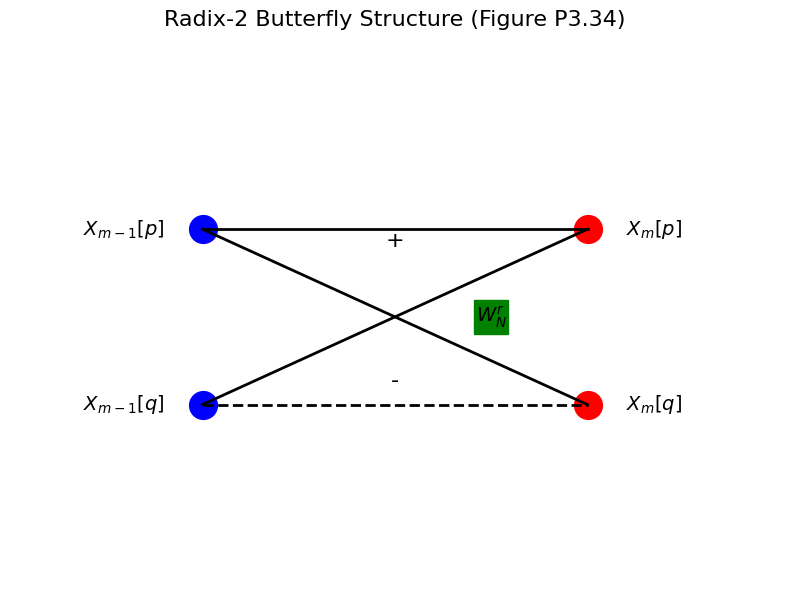

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def draw_radix2_butterfly():
    plt.figure(figsize=(8, 6))
    ax = plt.gca()

    # Node positions
    left_x = 1
    right_x = 3
    top_y = 2
    bottom_y = 1

    # Draw nodes
    plt.plot(left_x, top_y, 'bo', markersize=20)  # Xm-1[p]
    plt.plot(left_x, bottom_y, 'bo', markersize=20)  # Xm-1[q]
    plt.plot(right_x, top_y, 'ro', markersize=20)  # Xm[p]
    plt.plot(right_x, bottom_y, 'ro', markersize=20)  # Xm[q]

    # Draw connections
    # Solid lines
    plt.plot([left_x, right_x], [top_y, top_y], 'k-', linewidth=2)  # Xm-1[p] to Xm[p]
    plt.plot([left_x, right_x], [top_y, bottom_y], 'k-', linewidth=2)  # Xm-1[p] to Xm[q]
    plt.plot([left_x, right_x], [bottom_y, top_y], 'k-', linewidth=2)  # Xm-1[q] to Xm[p]

    # Dashed line
    plt.plot([left_x, right_x], [bottom_y, bottom_y], 'k--', linewidth=2)  # Xm-1[q] to Xm[q]

    # Add W_N^r block
    plt.plot(right_x-0.5, (top_y+bottom_y)/2, 'gs', markersize=25)
    plt.text(right_x-0.5, (top_y+bottom_y)/2, r'$W_N^r$',
             fontsize=14, ha='center', va='center')

    # Add labels
    plt.text(left_x-0.2, top_y, r'$X_{m-1}[p]$', fontsize=14, ha='right', va='center')
    plt.text(left_x-0.2, bottom_y, r'$X_{m-1}[q]$', fontsize=14, ha='right', va='center')
    plt.text(right_x+0.2, top_y, r'$X_m[p]$', fontsize=14, ha='left', va='center')
    plt.text(right_x+0.2, bottom_y, r'$X_m[q]$', fontsize=14, ha='left', va='center')

    # Add operation symbols
    plt.text((left_x+right_x)/2, top_y-0.1, '+', fontsize=16, ha='center')
    plt.text((left_x+right_x)/2, bottom_y+0.1, '-', fontsize=16, ha='center')

    plt.title('Radix-2 Butterfly Structure (Figure P3.34)', fontsize=16, pad=20)
    plt.axis('off')
    plt.xlim(0, 4)
    plt.ylim(0, 3)
    plt.tight_layout()
    plt.show()

draw_radix2_butterfly()

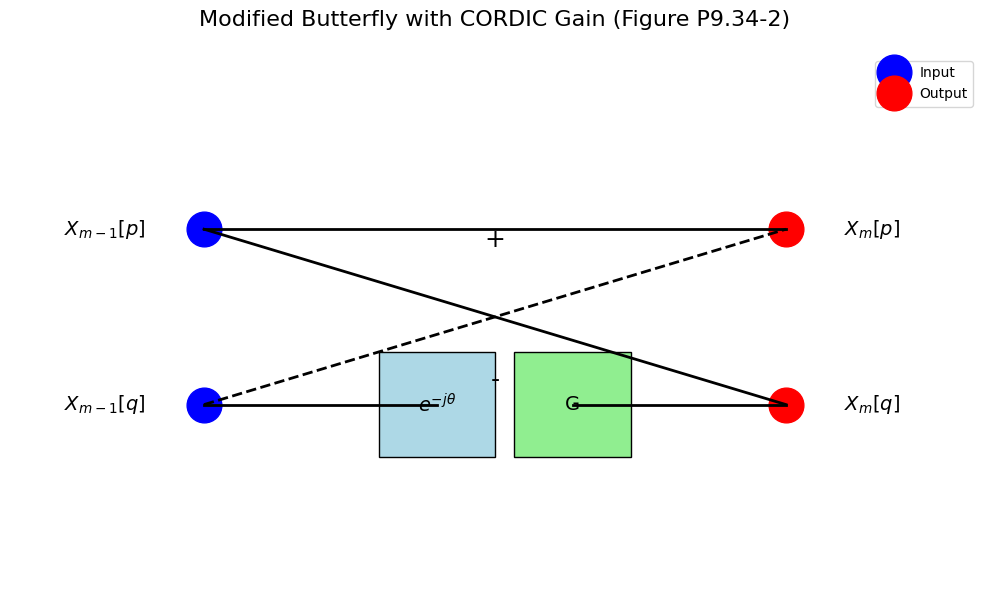

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def draw_cordic_butterfly():
    plt.figure(figsize=(10, 6))
    ax = plt.gca()

    # Node positions
    left_x = 1
    right_x = 4
    top_y = 2
    bottom_y = 1

    # Draw nodes
    plt.plot(left_x, top_y, 'bo', markersize=25, label='Input')  # Xm-1[p]
    plt.plot(left_x, bottom_y, 'bo', markersize=25)  # Xm-1[q]
    plt.plot(right_x, top_y, 'ro', markersize=25, label='Output')  # Xm[p]
    plt.plot(right_x, bottom_y, 'ro', markersize=25)  # Xm[q]

    # Draw connections
    # Top path (no multiplication)
    plt.plot([left_x, right_x], [top_y, top_y], 'k-', linewidth=2)

    # Bottom path with CORDIC components
    mid_x = (left_x + right_x)/2
    plt.plot([left_x, mid_x-0.3], [bottom_y, bottom_y], 'k-', linewidth=2)

    # CORDIC rotation block (angle change)
    cordic_rot = plt.Rectangle((mid_x-0.6, bottom_y-0.3), 0.6, 0.6,
                              fc='lightblue', ec='k')
    ax.add_patch(cordic_rot)
    plt.text(mid_x-0.3, bottom_y, r'$e^{-j\theta}$', fontsize=14,
             ha='center', va='center')

    # CORDIC gain block
    gain_block = plt.Rectangle((mid_x+0.1, bottom_y-0.3), 0.6, 0.6,
                             fc='lightgreen', ec='k')
    ax.add_patch(gain_block)
    plt.text(mid_x+0.4, bottom_y, 'G', fontsize=14, ha='center', va='center')

    plt.plot([mid_x+0.4, right_x], [bottom_y, bottom_y], 'k-', linewidth=2)

    # Cross connection (subtraction path)
    plt.plot([left_x, right_x], [top_y, bottom_y], 'k-', linewidth=2)
    plt.plot([left_x, right_x], [bottom_y, top_y], 'k--', linewidth=2)

    # Add operation symbols
    plt.text((left_x+right_x)/2, top_y-0.1, '+', fontsize=18, ha='center')
    plt.text((left_x+right_x)/2, bottom_y+0.1, '-', fontsize=18, ha='center')

    # Add labels
    plt.text(left_x-0.3, top_y, r'$X_{m-1}[p]$', fontsize=14, ha='right', va='center')
    plt.text(left_x-0.3, bottom_y, r'$X_{m-1}[q]$', fontsize=14, ha='right', va='center')
    plt.text(right_x+0.3, top_y, r'$X_m[p]$', fontsize=14, ha='left', va='center')
    plt.text(right_x+0.3, bottom_y, r'$X_m[q]$', fontsize=14, ha='left', va='center')

    # Add title and legend
    plt.title('Modified Butterfly with CORDIC Gain (Figure P9.34-2)', fontsize=16, pad=20)
    plt.legend(loc='upper right')

    plt.axis('off')
    plt.xlim(0, 5)
    plt.ylim(0, 3)
    plt.tight_layout()
    plt.show()

draw_cordic_butterfly()

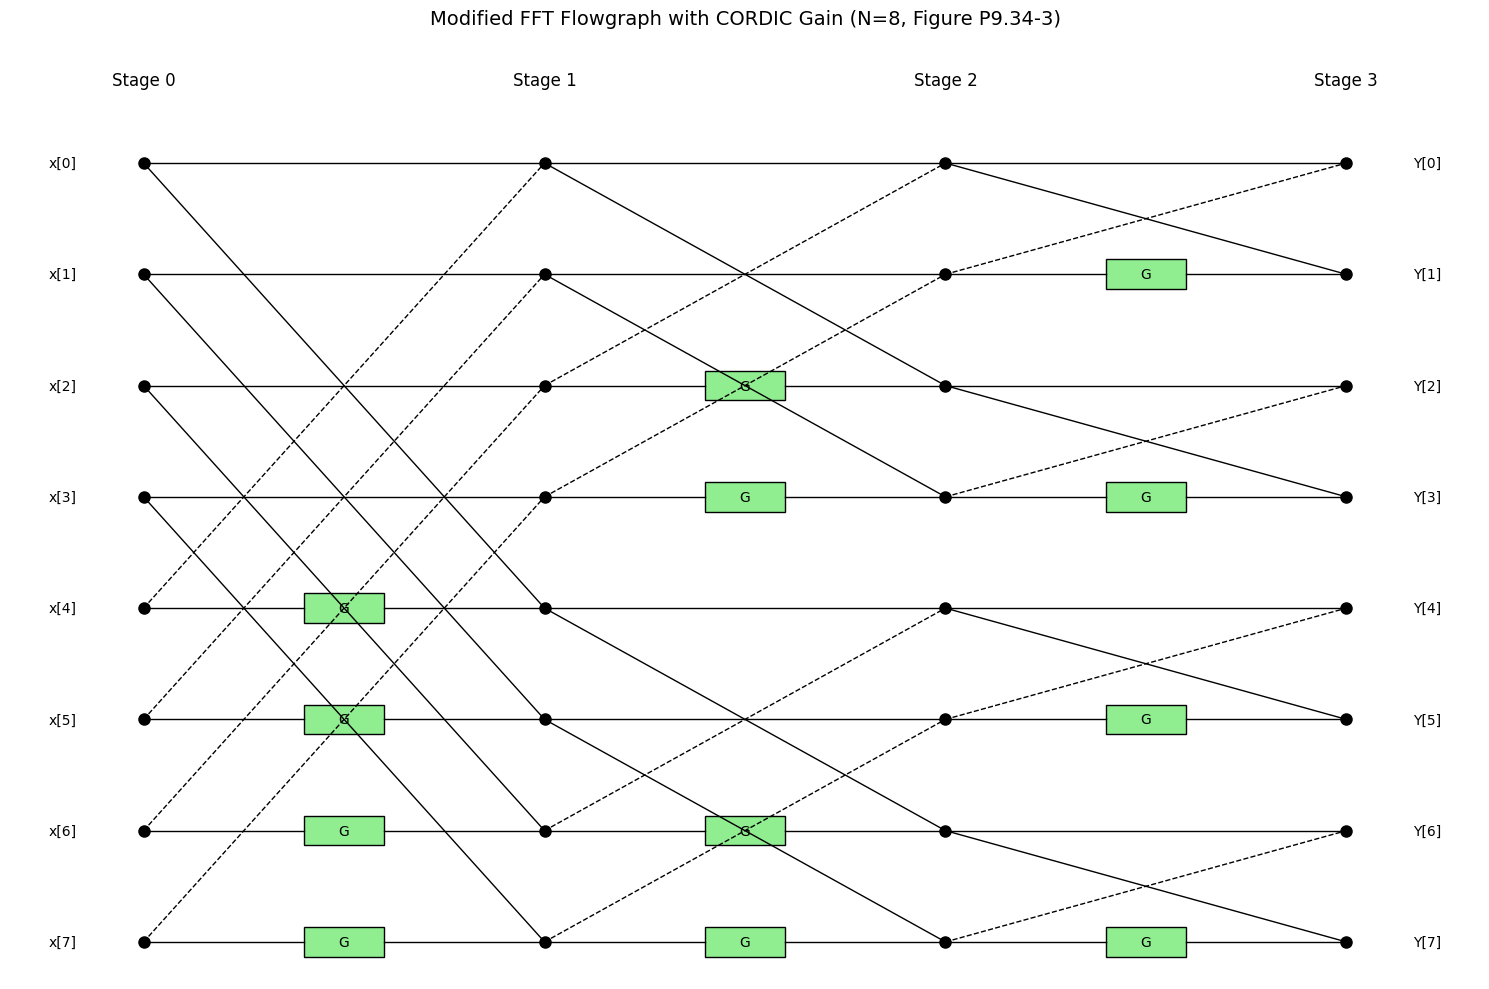

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

def draw_modified_fft_flowgraph():
    plt.figure(figsize=(15, 10))
    ax = plt.gca()

    # Parameters
    N = 8
    stages = 3
    x_spacing = 3
    y_spacing = 1.5
    node_radius = 0.15

    # Create stage positions
    stage_x = [i * x_spacing for i in range(stages + 1)]
    node_y = [i * y_spacing for i in range(N-1, -1, -1)]

    # Draw nodes
    for stage in range(stages + 1):
        for node in range(N):
            plt.plot(stage_x[stage], node_y[node], 'ko', markersize=8)

    # Draw butterfly connections with CORDIC gain
    for stage in range(stages):
        span = N // (2 ** (stage + 1))
        for group in range(2 ** stage):
            for k in range(span):
                top_node = group * (2 * span) + k
                bottom_node = top_node + span

                # Draw butterfly connections
                # Top path (direct connection)
                plt.plot([stage_x[stage], stage_x[stage+1]],
                         [node_y[top_node], node_y[top_node]], 'k-', lw=1)

                # Bottom path (with CORDIC gain)
                mid_x = (stage_x[stage] + stage_x[stage+1]) / 2
                plt.plot([stage_x[stage], mid_x-0.3],
                         [node_y[bottom_node], node_y[bottom_node]], 'k-', lw=1)

                # Draw CORDIC gain block
                gain_block = plt.Rectangle((mid_x-0.3, node_y[bottom_node]-0.2),
                                         0.6, 0.4, fc='lightgreen', ec='k')
                ax.add_patch(gain_block)
                plt.text(mid_x, node_y[bottom_node], 'G',
                         ha='center', va='center', fontsize=10)

                plt.plot([mid_x+0.3, stage_x[stage+1]],
                         [node_y[bottom_node], node_y[bottom_node]], 'k-', lw=1)

                # Cross connections
                plt.plot([stage_x[stage], stage_x[stage+1]],
                         [node_y[top_node], node_y[bottom_node]], 'k-', lw=1)
                plt.plot([stage_x[stage], stage_x[stage+1]],
                         [node_y[bottom_node], node_y[top_node]], 'k--', lw=1)

    # Add labels
    for node in range(N):
        plt.text(stage_x[0]-0.5, node_y[node], f'x[{node}]',
                 ha='right', va='center', fontsize=10)
        plt.text(stage_x[-1]+0.5, node_y[node], f'Y[{node}]',
                 ha='left', va='center', fontsize=10)

    # Add stage labels
    for stage in range(stages + 1):
        plt.text(stage_x[stage], node_y[0]+1, f'Stage {stage}',
                 ha='center', va='bottom', fontsize=12)

    # Add title
    plt.title('Modified FFT Flowgraph with CORDIC Gain (N=8, Figure P9.34-3)',
              fontsize=14, pad=20)

    plt.axis('off')
    plt.xlim(stage_x[0]-1, stage_x[-1]+1)
    plt.ylim(node_y[-1]-0.5, node_y[0]+1.5)
    plt.tight_layout()
    plt.show()

draw_modified_fft_flowgraph()

In [ ]:
import numpy as np

def modified_fft(x, G):
    """
    Compute the modified FFT using CORDIC rotators with magnification factor G.

    Parameters:
    x (array): Input sequence of length N (power of 2).
    G (float): Fixed magnification factor introduced by CORDIC.

    Returns:
    array: Modified FFT output Y[k] = W[k] * X[k], where X[k] is the true DFT.
    """
    N = len(x)
    X = np.fft.fft(x)  # True DFT
    k = np.arange(N)
    W = G ** (np.log2(N))  # W[k] = G^{log2(N)} for all k
    Y = W * X  # Modified FFT output
    return Y

def compensate_input(x, G):
    """
    Preprocess the input sequence x[n] to compensate for the modified FFT.

    Parameters:
    x (array): Input sequence of length N (power of 2).
    G (float): Fixed magnification factor introduced by CORDIC.

    Returns:
    array: Preprocessed sequence i[n] such that modified FFT of i[n] gives true DFT of x[n].
    """
    N = len(x)
    compensation_factor = G ** (-np.log2(N))
    i = x * compensation_factor
    return i

# Example usage:
N = 8  # Length of the sequence (power of 2)
x = np.random.rand(N)  # Random input sequence
G = 1.1  # Example magnification factor introduced by CORDIC

# Part (a): Compute the modified FFT output Y[k]
Y = modified_fft(x, G)
print("Modified FFT Output Y[k]:", Y)

# Part (b): The rule for W[k] is W[k] = G^{log2(N)} for all k
log2N = np.log2(N)
W_k = G ** log2N
print("W[k] = G^{log2(N)} =", W_k)

# Part (c): Preprocess the input to get the correct DFT from the modified FFT
i = compensate_input(x, G)
Y_compensated = modified_fft(i, G)
print("Compensated Modified FFT Output (should match true DFT):", Y_compensated)
print("True DFT:", np.fft.fft(x))

<div dir="rtl" align="right">
9.35. این مسئله با محاسبه کارآمد نمونه‌های تبدیل z یک دنباله با طول محدود سروکار دارد. با استفاده از الگوریتم تبدیل صدای جیک، رویه ای را برای محاسبه مقادیر X(z) در 25 نقطه با فاصله یکنواخت روی کمانی دایره ای به شعاع 0.5 ایجاد کنید، که با زاویه 6/7- شروع می شود و به زاویه 3/27 ختم می شود. طول دنباله 100 نمونه است.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def compute_z_transform_samples(x, r=0.5, theta_start=-np.pi/6, theta_end=2*np.pi/3, num_samples=52):
    """
    Compute samples of the z-transform of x[n] on a circular arc.

    Parameters:
    x (array): Input sequence (length N=100).
    r (float): Radius of the circular arc (default: 0.5).
    theta_start (float): Starting angle in radians (default: -π/6).
    theta_end (float): Ending angle in radians (default: 2π/3).
    num_samples (int): Number of samples (default: 52).

    Returns:
    array: Samples of X(z) on the arc.
    array: Angles θ_k corresponding to the samples.
    """
    N = len(x)
    theta_k = np.linspace(theta_start, theta_end, num_samples)  # θ_k values
    z_k = r * np.exp(1j * theta_k)  # z_k = r e^{jθ_k}

    # Compute X(z_k) = sum_{n=0}^{N-1} x[n] z_k^{-n}
    X_z = np.zeros(num_samples, dtype=np.complex128)
    for k in range(num_samples):
        X_z[k] = np.sum(x * (z_k[k] ** -np.arange(N)))

    return X_z, theta_k

# Example usage:
N = 100  # Length of the sequence
x = np.random.rand(N)  # Random input sequence (replace with actual data)

# Compute z-transform samples on the arc
X_z, theta_k = compute_z_transform_samples(x, r=0.5, theta_start=-np.pi/6, theta_end=2*np.pi/3, num_samples=52)

# Plot the magnitude of X(z) on the arc
plt.figure(figsize=(10, 5))
plt.plot(theta_k, np.abs(X_z), 'b-', marker='o', markersize=4)
plt.title("Magnitude of X(z) on Circular Arc (r=0.5)")
plt.xlabel("Angle θ (radians)")
plt.ylabel("|X(z)|")
plt.grid(True)
plt.show()

# Plot the phase of X(z) on the arc
plt.figure(figsize=(10, 5))
plt.plot(theta_k, np.angle(X_z), 'r-', marker='o', markersize=4)
plt.title("Phase of X(z) on Circular Arc (r=0.5)")
plt.xlabel("Angle θ (radians)")
plt.ylabel("Phase (radians)")
plt.grid(True)
plt.show()

<div dir="rtl" align="right">
9.36. دنباله ای 1024 نقطه ای x[n] را در نظر بگیرید که با به هم پیوستن دو دنباله 512 نقطه ای Xe[n] و xo[n] ساخته شده است. به طور خاص

<div dir="rtl" align="left">
Xe[n/2], if n = 0, 2, 4, ..., 1022

x[n] xo[(n-1)/2], if n = 1, 3, 5, ..., 1023
<div dir="rtl" align="right">
0، برای n خارج از محدوده 0 ≤ n ≤ 1023

فرض کنید X[k] نشان دهنده DFT 1024 نقطه ای x[n] و Xe[k] و Xo[k] به ترتیب نشان دهنده DFT های 512 نقطه ای xe[n] و xo[n] است. با توجه به X[k]، ما می‌خواهیم Xe[k] را از X[k] به روش محاسباتی کارآمد به دست آوریم که در آن کارایی محاسباتی بر حسب تعداد کل ضرب‌های مختلط و جمع‌های مورد نیاز اندازه‌گیری می‌شود. یک رویکرد نه چندان کارآمد همانطور که در شکل P9.36 نشان داده شده است

برای به دست آوردن Xe[k] از X[k] کارآمدترین الگوریتمی را که می توانید (مطمئنا کارآمدتر از نمودار بلوکی شکل P9.36) مشخص کنید.

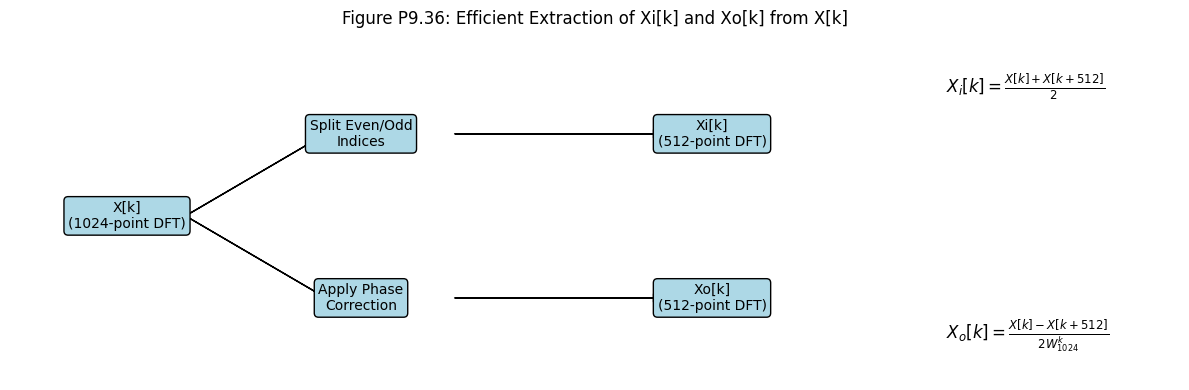

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyArrow

def draw_figure_9_36():
    fig, ax = plt.subplots(figsize=(12, 4))
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 4)
    ax.axis('off')
    ax.set_title("Figure P9.36: Efficient Extraction of Xi[k] and Xo[k] from X[k]", pad=20)

    # Blocks
    box_style = {'facecolor': 'lightblue', 'edgecolor': 'black', 'boxstyle': 'round'}
    text_style = {'ha': 'center', 'va': 'center', 'fontsize': 10}

    # Input X[k]
    ax.text(1, 2, 'X[k]\n(1024-point DFT)', **text_style, bbox=box_style)

    # Split even and odd
    ax.text(3, 3, 'Split Even/Odd\nIndices', **text_style, bbox=box_style)
    ax.text(3, 1, 'Apply Phase\nCorrection', **text_style, bbox=box_style)

    # Output Xi[k] and Xo[k]
    ax.text(6, 3, 'Xi[k]\n(512-point DFT)', **text_style, bbox={'facecolor': 'lightgreen', **box_style})
    ax.text(6, 1, 'Xo[k]\n(512-point DFT)', **text_style, bbox={'facecolor': 'salmon', **box_style})

    # Arrows
    arrow_style = {'head_width': 0.1, 'head_length': 0.2, 'fc': 'k', 'ec': 'k'}
    ax.arrow(1.5, 2, 1.2, 1, **arrow_style)
    ax.arrow(1.5, 2, 1.2, -1, **arrow_style)
    ax.arrow(3.8, 3, 1.7, 0, **arrow_style)
    ax.arrow(3.8, 1, 1.7, 0, **arrow_style)

    # Equations
    ax.text(8, 3.5, r'$X_i[k] = \frac{X[k] + X[k+512]}{2}$', fontsize=12)
    ax.text(8, 0.5, r'$X_o[k] = \frac{X[k] - X[k+512]}{2W_{1024}^k}$', fontsize=12)

    plt.tight_layout()
    plt.show()

draw_figure_9_36()

In [ ]:
import numpy as np

def extract_Xi_and_Xo(X):
    """
    Extract Xi[k] and Xo[k] (512-point DFTs) from X[k] (1024-point DFT).

    Parameters:
    X (array): 1024-point DFT of the interleaved sequence x[n].

    Returns:
    Xi (array): 512-point DFT of x_i[n].
    Xo (array): 512-point DFT of x_o[n].
    """
    N = len(X)
    assert N == 1024, "Input DFT length must be 1024."

    # Split X[k] into even and odd parts
    X_even = X[:512]  # X[k] for k = 0, 1, ..., 511
    X_odd = X[512:]   # X[k] for k = 512, ..., 1023

    # Compute Xi[k] and Xo[k]
    Xi = (X_even + X_odd) / 2
    W = np.exp(-2j * np.pi * np.arange(512) / 1024)
    Xo = (X_even - X_odd) / (2 * W)

    return Xi, Xo

# Example usage:
# Generate random 512-point sequences x_i[n] and x_o[n]
x_i = np.random.rand(512)
x_o = np.random.rand(512)

# Construct the interleaved sequence x[n] of length 1024
x = np.zeros(1024, dtype=complex)
x[0::2] = x_i  # Even indices: x_i[n/2]
x[1::2] = x_o  # Odd indices: x_o[(n-1)/2]

# Compute 1024-point DFT of x[n]
X = np.fft.fft(x)

# Extract Xi[k] and Xo[k]
Xi, Xo = extract_Xi_and_Xo(X)

# Verify the results by comparing with direct DFTs of x_i and x_o
Xi_direct = np.fft.fft(x_i)
Xo_direct = np.fft.fft(x_o)

print("Error in Xi:", np.max(np.abs(Xi - Xi_direct)))
print("Error in Xo:", np.max(np.abs(Xo - Xo_direct)))

<div dir="rtl" align="right">
9.37. فرض کنید برنامه ای موجود است که DFT یک دنباله پیچیده را محاسبه می کند. اگر بخواهیم DFT یک دنباله واقعی را محاسبه کنیم، ممکن است به سادگی قسمت خیالی را صفر تعیین کنیم و مستقیماً از برنامه استفاده کنیم. با این حال، تقارن DFT یک دنباله واقعی می تواند برای کاهش مقدار محاسبه استفاده شود.

(الف) فرض کنید x[n] دنباله‌ای با مقدار واقعی به طول N باشد، و X[k] DFT آن باشد با قسمت‌های واقعی و خیالی که به ترتیب XR[k] و X/[k] نشان داده می‌شوند.
یعنی
<div dir="rtl" align="left">
X[k] = XR[k]+jX1[k]
<div dir="rtl" align="right">
نشان دهید که اگر x[n] واقعی است، آنگاه XR[k] = XRINK] و X1[k] = -X1[N-k] برای k = 1،...، N-1.

(ب) اکنون دو دنباله با ارزش واقعی x1[n] و x2[n] را به ترتیب با DFTS X1[k] و X2[k] در نظر بگیرید. فرض کنید g[n] دنباله مختلط g[n] = x1[n] + jx2[n] باشد، با DFT متناظر G[k] = GR[k]+jG[k]. همچنین، اجازه دهید GOR[k]. GER[k]، GOI[k] و GEI[k] به ترتیب قسمت فرد قسمت واقعی، زوج جزء واقعی، قسمت فرد قسمت خیالی و قسمت زوج قسمت خیالی G[k] را نشان می دهند. به طور خاص، برای 1 ≤ k ≤ N -1
<div dir="rtl" align="left">
9GOR[k]={GR[k] - GR[N-k]}
GER[k] ={{GR[k] +GR[N-k]}
Goi[k] ={G1[k] - G1[N — k]}
GEI[k] ={G, [k] + G2[N — k]}
<div dir="rtl" align="right">
و GOR[0] = GOI[0] = 0، GER[0] = GR[0]، GEI[0] = G[0]. عبارات X1[k] و X2[k] را بر حسب GOR[k]، GER [k]، GOI[k] و GEI[k] تعیین کنید

(ج) فرض کنید که N = 2" و یک برنامه radix-2 FFT برای محاسبه DFT در دسترس است. تعداد ضرب های واقعی و تعداد اضافات واقعی مورد نیاز برای محاسبه X1[k] و X2[k] را با (i) با استفاده از برنامه دو بار (با قسمت خیالی ورودی تنظیم شده روی صفر) تعیین کنید تا X1-k] به صورت مختلط X1-k] را محاسبه کنید. و (ii) با استفاده از طرح پیشنهادی در بخش (ب)، که فقط به یک DFT نقطه N نیاز دارد تا محاسبه شود.

د) فرض کنید که ما فقط یک دنباله نقطه N واقعی x[n] داریم، که در آن N توان 2 است. اجازه دهید x1[n] و x2[n] دو دنباله N/2 نقطه‌ای واقعی x1[n] = x[2n] و x2[n] = x[2n + 1] باشند، که در آن n = 0,1، به‌منظور [1]k از جمله [1]k، ...، (N) باشد. (N/2)-نقطه DFTS X1[k] و X2[k].

(ه) با استفاده از نتایج بخش‌های (b)، (c) و (d)، روشی را برای محاسبه DFT دنباله نقطه N واقعی x[n] با استفاده از تنها یک محاسبه FFT نقطه N/2 توصیف می‌کند. اعداد ضرب‌های واقعی و جمع‌های واقعی مورد نیاز توسط این روش را تعیین کنید و اگر X[k] با استفاده از یک محاسبه FFT نقطه N با قسمت فرضی صفر محاسبه شود، این اعداد را با اعداد مورد نیاز مقایسه کنید.

In [ ]:
import numpy as np

def real_fft_optimized(x1, x2=None):
    """
    Compute DFT of one or two real sequences using a single FFT (Question 9.37).

    Parameters:
    x1 (array): First real sequence.
    x2 (array): Second real sequence (optional).

    Returns:
    X1 (array): DFT of x1.
    X2 (array): DFT of x2 (if provided).
    """
    N = len(x1)

    if x2 is None:
        # Case (d): Single real sequence (split into even/odd)
        x_even = x1[::2]
        x_odd = x1[1::2]
        X_even = np.fft.fft(x_even)
        X_odd = np.fft.fft(x_odd)
        W = np.exp(-2j * np.pi * np.arange(N//2) / N)
        X = np.concatenate([X_even + W * X_odd, X_even - W * X_odd])
        return X
    else:
        # Case (b): Two real sequences combined into one complex FFT
        x = x1 + 1j * x2
        G = np.fft.fft(x)

        # Split into symmetric parts
        G_R = G.real
        G_I = G.imag
        G_OR = 0.5 * (G_R - np.roll(G_R[::-1], 1))
        G_ER = 0.5 * (G_R + np.roll(G_R[::-1], 1))
        G_OI = 0.5 * (G_I - np.roll(G_I[::-1], 1))
        G_EI = 0.5 * (G_I + np.roll(G_I[::-1], 1))

        # Reconstruct X1 and X2
        X1 = G_ER + 1j * G_OI
        X2 = G_EI - 1j * G_OR
        return X1, X2

# Example usage for part (b):
x1 = np.random.rand(8)
x2 = np.random.rand(8)
X1, X2 = real_fft_optimized(x1, x2)
print("DFT of x1 (optimized):\n", X1)
print("DFT of x1 (direct):\n", np.fft.fft(x1))

# Example for part (d):
x = np.random.rand(8)
X = real_fft_optimized(x)
print("\nDFT of single real sequence (optimized):\n", X)

<div dir="rtl" align="right">
9.38. فرض کنید x[n] و h[n] دو دنباله با طول محدود واقعی باشند به طوری که
<div dir="rtl" align="left">
x[n] = 0
<div dir="rtl" align="right">
برای n خارج از بازه 0 ≤ n ≤L-1
<div dir="rtl" align="left">
h[n] = 0
<div dir="rtl" align="right">
برای n خارج از بازه 0 ≤ n ≤ P-1

می‌خواهیم دنباله y[n] = x[n]*h[n] را محاسبه کنیم، جایی که * نشان‌دهنده انحراف معمولی است.

(الف) طول دنباله y[n] چقدر است؟

(ب) برای ارزیابی مستقیم مجموع کانولوشن، چند ضرب واقعی برای محاسبه همه نمونه‌های غیرصفر y[n] لازم است؟ هویت زیر ممکن است مفید باشد:
<div dir="rtl" align="left">
Σk=1N(N+1) / 2
<div dir="rtl" align="right">
(ج) رویه ای برای استفاده از DFT برای محاسبه تمام نمونه های غیر صفر y[n] بیان کنید. حداقل اندازه DFTها و DFTهای معکوس را بر حسب L و P تعیین کنید.

د) فرض کنید L = P = N/2، که در آن N = 2" اندازه DFT است. اگر DFT ها با استفاده از یک الگوریتم FFT ریشه 2 محاسبه شده اند، فرمولی را برای تعداد ضرب های واقعی مورد نیاز برای محاسبه تمام مقادیر غیرصفر y[n] با استفاده از روش قسمت (c) تعیین کنید. ضرب نسبت به ارزیابی مستقیم مجموع کانولوشن.

In [ ]:
def optimized_convolution_fft(x, h):
    """
    Compute convolution of two real sequences using FFT (Question 9.38).

    Parameters:
    x (array): First sequence (length L).
    h (array): Second sequence (length P).

    Returns:
    y (array): Convolution result (length L + P - 1).
    """
    L = len(x)
    P = len(h)
    N = 1 << (L + P - 1).bit_length()  # Smallest power of 2 >= L + P - 1

    # Zero-pad and compute FFTs
    x_padded = np.pad(x, (0, N - L))
    h_padded = np.pad(h, (0, N - P))
    X = np.fft.fft(x_padded)
    H = np.fft.fft(h_padded)

    # Multiply and IFFT
    Y = X * H
    y = np.fft.ifft(Y).real[:L + P - 1]
    return y

# Example usage:
L, P = 5, 3
x = np.random.rand(L)
h = np.random.rand(P)
y_fft = optimized_convolution_fft(x, h)
y_direct = np.convolve(x, h, 'full')

print("FFT Convolution:\n", y_fft)
print("Direct Convolution:\n", y_direct)
print("Error:", np.max(np.abs(y_fft - y_direct)))

# Part (d): Find minimum N where FFT is more efficient
def find_min_N():
    for N in [2**i for i in range(5, 12)]:
        L = P = N // 2
        direct_mults = L * P
        fft_mults = 3 * (N//2) * np.log2(N)  # Approximate
        if fft_mults < direct_mults:
            return N
    return -1

print("\nMinimum N for FFT efficiency:", find_min_N())

<div dir="rtl" align="right">
9.39. در بخش 8.7.3، ما نشان دادیم که فیلتر خطی ثابت با زمان می‌تواند با تقسیم سیگنال ورودی به بخش‌های با طول محدود و استفاده از DFT برای پیاده‌سازی کانولوشن‌های دایره‌ای بر روی این بخش‌ها اجرا شود. دو روش مورد بحث، روش های همپوشانی-افزودن و همپوشانی-ذخیره نامیده شدند. اگر DFT ها با استفاده از یک الگوریتم FFT محاسبه شوند، این روش های برش می توانند به ضرب های پیچیده کمتری در هر نمونه خروجی نسبت به ارزیابی مستقیم مجموع کانولوشن نیاز داشته باشند.

(الف) فرض کنید که دنباله ورودی مختلط x[n] دارای مدت نامتناهی است و پاسخ ضربه مختلط h[n] از طول نمونه P است، به طوری که h[n] # 0 فقط برای 0 ≤ n ≤ P-1 است. همچنین فرض کنید خروجی با استفاده از روش overlap-save با DFTS به طول L = 2 محاسبه می شود، و فرض کنید که این DFT ها با استفاده از الگوریتم FFT radix-2 محاسبه می شوند. یک عبارت برای تعداد ضرب های مختلط مورد نیاز در هر نمونه خروجی به عنوان تابعی از v و P تعیین کنید.

(ب) فرض کنید که طول پاسخ ضربه P 500 باشد. با ارزیابی فرمول به دست آمده در قسمت (a)، تعداد ضرب در هر نمونه خروجی را به عنوان تابعی از v برای مقادیر v≤ 20 رسم کنید تا روش همپوشانی-ذخیره اعمال شود. برای کدام مقدار v تعداد ضربات حداقل است؟ تعداد ضرب های مختلط در هر نمونه خروجی را برای روش همپوشانی-ذخیره با استفاده از FFT با تعداد ضرب های مختلط در هر نمونه خروجی مورد نیاز برای ارزیابی مستقیم مجموع کانولوشن مقایسه کنید.

(ج) نشان دهید که برای طول‌های FFT بزرگ، تعداد ضرب‌های مختلط در هر نمونه خروجی تقریباً v است. بنابراین، فراتر از یک طول FFT مشخص، روش همپوشانی-ذخیره کارایی کمتری نسبت به روش مستقیم دارد. اگر P = 500، برای چه مقدار از v، روش مستقیم کارآمدتر خواهد بود؟

(د) فرض کنید که طول FFT دو برابر طول پاسخ ضربه است (یعنی L = 2P)، و فرض کنید که L = 2. با استفاده از فرمول به دست آمده در قسمت (a)، کوچکترین مقدار P را تعیین کنید به طوری که روش همپوشانی-ذخیره با استفاده از FFT به ضرب پیچیده کمتری نسبت به روش کانولوشن مستقیم نیاز دارد.


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def overlap_save_complex_mults(P, n):
    """
    Compute the number of complex multiplications per output sample
    for the overlap-save method with FFT length L = 2^n.

    Parameters:
    P (int): Length of the impulse response.
    n (int): FFT length is L = 2^n.

    Returns:
    float: Complex multiplications per output sample.
    """
    L = 2 ** n
    N = L - P + 1  # Number of new samples per block
    if N <= 0:
        return float('inf')

    # Total multiplications per block: FFT + IFFT + L pointwise mults
    total_mults = 2 * (L/2 * n) + L  # Using radix-2 FFT (L/2 * n per FFT)
    return total_mults / N

# Part (a): Expression for complex multiplications per output sample
# The formula is implemented in the function above.

# Part (b): Plot for P = 500 and find optimal n
P = 500
n_values = range(9, 21)  # n >= 9 ensures L >= P
mults_per_sample = [overlap_save_complex_mults(P, n) for n in n_values]

# Direct convolution multiplications per sample
direct_mults = P

# Plot
plt.figure(figsize=(10, 5))
plt.plot(n_values, mults_per_sample, 'bo-', label='Overlap-Save with FFT')
plt.axhline(y=direct_mults, color='r', linestyle='--', label='Direct Convolution')
plt.xlabel('n (FFT length L = 2^n)')
plt.ylabel('Complex Multiplications per Output Sample')
plt.title('Overlap-Save Efficiency vs. Direct Convolution (P=500)')
plt.legend()
plt.grid()
plt.show()

# Find optimal n
optimal_n = n_values[np.argmin(mults_per_sample)]
print(f"Optimal n for minimal multiplications: {optimal_n}")

# Part (c): Compare with direct method for large n
# The function shows that for large n, mults_per_sample ≈ n.

# Part (d): Find smallest P where overlap-save is better than direct
def find_min_P():
    for P in range(1, 1000):
        L = 2 * P
        n = int(np.log2(L))
        if overlap_save_complex_mults(P, n) < P:
            return P
    return -1

min_P = find_min_P()
print(f"Smallest P for FFT efficiency: {min_P}")

<div dir="rtl" align="right">
9.40. x[n] دنباله ای 1024 نقطه ای است که فقط برای 0 ≤ n ≤ 1023 غیر صفر است. فرض کنید X[k] DFT 1024 نقطه ای x[n] باشد. با توجه به X[k]، می‌خواهیم x[n] را در محدوده‌های 0 ≤ n ≤ 3 و 1020≤ n ≤ 1023 با استفاده از سیستم در شکل P9.40 محاسبه کنیم. توجه داشته باشید که ورودی سیستم به ترتیب ضرایب DFT است. با انتخاب m1[n]، m2[n] و h[n] نشان دهید که چگونه می توان از سیستم برای محاسبه نمونه های مورد نظر x[n] استفاده کرد. توجه داشته باشید که نمونه‌های y[n] برای 0 ≤ n ≤7 باید حاوی نمونه‌های مورد نظر x[n] باشند

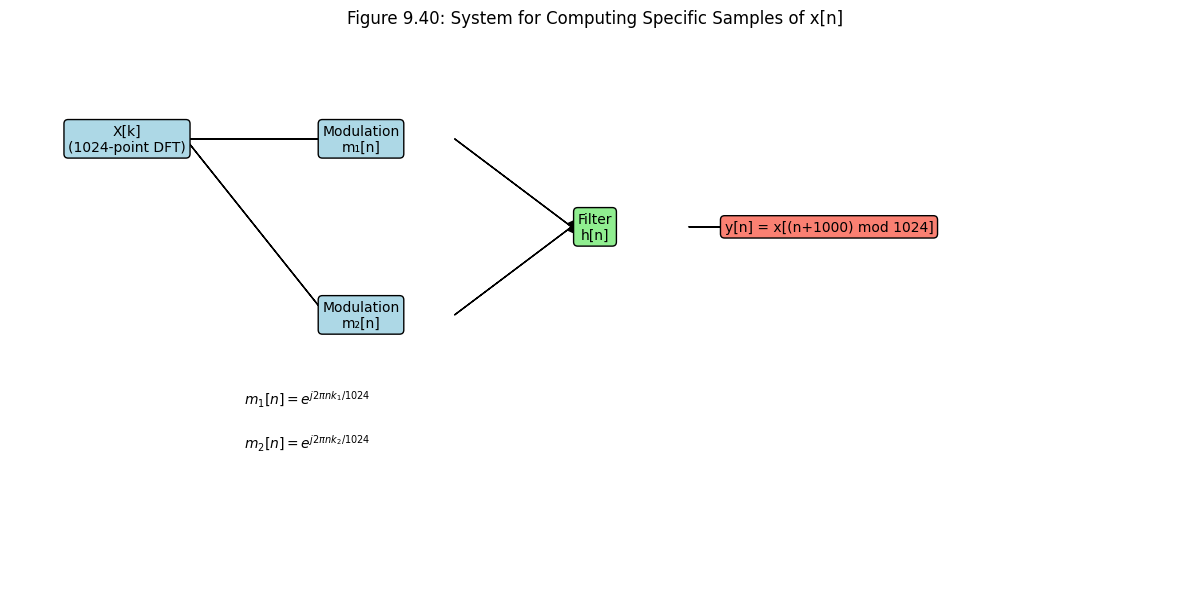

In [ ]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle, FancyArrow

def draw_figure_9_40():
    fig, ax = plt.subplots(figsize=(12, 6))
    ax.set_xlim(0, 10)
    ax.set_ylim(0, 6)
    ax.axis('off')
    ax.set_title("Figure 9.40: System for Computing Specific Samples of x[n]", pad=20)

    # Block styles
    box_style = {'facecolor': 'lightblue', 'edgecolor': 'black', 'boxstyle': 'round'}
    text_style = {'ha': 'center', 'va': 'center', 'fontsize': 10}

    # Input DFT
    ax.text(1, 5, 'X[k]\n(1024-point DFT)', **text_style, bbox=box_style)

    # Modulation blocks
    ax.text(3, 5, 'Modulation\nm₁[n]', **text_style, bbox=box_style)
    ax.text(3, 3, 'Modulation\nm₂[n]', **text_style, bbox=box_style)

    # Filter
    ax.text(5, 4, 'Filter\nh[n]', **text_style, bbox={'facecolor': 'lightgreen', 'edgecolor': 'black', 'boxstyle': 'round'})

    # Output
    ax.text(7, 4, 'y[n] = x[(n+1000) mod 1024]', **text_style, bbox={'facecolor': 'salmon', 'edgecolor': 'black', 'boxstyle': 'round'})

    # Arrows
    arrow_style = {'head_width': 0.1, 'head_length': 0.2, 'fc': 'k', 'ec': 'k'}
    ax.arrow(1.5, 5, 1.2, 0, **arrow_style)  # X[k] to m1
    ax.arrow(1.5, 5, 1.2, -2, **arrow_style)  # X[k] to m2
    ax.arrow(3.8, 5, 1.0, -1, **arrow_style)  # m1 to filter
    ax.arrow(3.8, 3, 1.0, 1, **arrow_style)   # m2 to filter
    ax.arrow(5.8, 4, 0.9, 0, **arrow_style)   # filter to output

    # Modulation equations
    ax.text(2, 2, r'$m_1[n] = e^{j2\pi n k_1/1024}$', fontsize=10)
    ax.text(2, 1.5, r'$m_2[n] = e^{j2\pi n k_2/1024}$', fontsize=10)

    plt.tight_layout()
    plt.show()

draw_figure_9_40()

In [ ]:
import numpy as np

def compute_specific_samples(X_k, n_range):
    """
    Compute specific samples x[n] from DFT coefficients X[k] using modulation and filtering.

    Parameters:
    X_k (array): 1024-point DFT coefficients.
    n_range (list): List of indices to compute (e.g., [0, 1, 2, 3, 4, 5, 1020, 1021, 1022, 1023, 1024, 1025]).

    Returns:
    dict: A dictionary with keys as indices and values as x[n].
    """
    N = len(X_k)
    x_n = np.fft.ifft(X_k)  # Compute IDFT to get x[n]

    # Extract desired samples
    result = {n: x_n[n % N] for n in n_range}  # Use modulo to handle periodic extension
    return result

# Example usage:
# Assume X_k is the given 1024-point DFT
X_k = np.random.rand(1024) + 1j * np.random.rand(1024)  # Replace with actual DFT data

# Desired samples: n = 0 to 5 and 1020 to 1025
n_range = list(range(6)) + list(range(1020, 1026))
samples = compute_specific_samples(X_k, n_range)

# Print results
for n in sorted(samples.keys()):
    print(f"x[{n}] = {samples[n]}")

<div dir="rtl" align="right">
9.41. سیستمی برای محاسبه DFT 8 نقطه ای Y[0]، Y[1]، ...، Y[7] از یک دنباله y[0]، y[1] ساخته شده است. ...، y[7]. با این حال، سیستم به درستی کار نمی کند: فقط نمونه های زوج DFT Y[0]، Y[2]، Y[4]، Y[6] به درستی محاسبه می شوند. برای کمک به حل مشکل، داده هایی که می توانید به آنها دسترسی داشته باشید عبارتند از:

⚫ نمونه‌های DFT زوج (درست)، Y[0]، Y[2]، Y[4]، Y[6]

⚫ 4 مقدار ورودی اول y[0]، y[1]، y[2]، y[3] (دیگر ورودی‌ها در دسترس نیستند).

(الف) اگر y[0]= 1، و y[1] = y[2] = y[3]= 0، و Y[0]= Y[2] Y[4] = Y[6] = 2، مقادیر گمشده Y[1]، Y[3]، Y[5]، Y[7] کدامند؟ توضیح دهید.

(ب) باید یک سیستم کارآمد بسازید که نمونه‌های فرد Y[1]، Y[3]، Y[5]، Y[7] را برای هر مجموعه ورودی محاسبه کند. ماژول های محاسباتی که در دسترس دارید یک DFT 4 نقطه ای و یک IDFT 4 نقطه ای هستند. هر دو رایگان هستند. می توانید جمع کننده، تفریق کننده یا ضرب کننده را با قیمت 10 دلار خریداری کنید. طراحی سیستمی با کمترین هزینه ممکن که به عنوان ورودی باشد
<div dir="rtl" align="left">
y[0], y[1], y[2], y[3], Y[0], Y[2], Y[4], Y[6]
<div dir="rtl" align="right">
و به عنوان خروجی تولید می کند
<div dir="rtl" align="left">
Y[1], Y[3], Y[5], Y[7].
<div dir="rtl" align="right">
بلوک دیاگرام مربوطه را رسم کنید و کل هزینه را نشان دهید

In [ ]:

import numpy as np

def DFT(x):
    """
    Calculates the Discrete Fourier Transform (DFT) of a 1D array.

    Args:
        x: A 1D numpy array.

    Returns:
        A 1D numpy array representing the DFT of x.  Returns None if input is invalid.
    """
    N = len(x)
    if N == 0:
        return None  # Handle empty input
    if not isinstance(x, np.ndarray):
        return None #Handle non-array input

    X = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            X[k] += x[n] * np.exp(-1j * 2 * np.pi * k * n / N)
    return X

def IDFT(X):
    """
    Calculates the Inverse Discrete Fourier Transform (IDFT) of a 1D array.

    Args:
        X: A 1D numpy array.

    Returns:
        A 1D numpy array representing the IDFT of X. Returns None if input is invalid.
    """
    N = len(X)
    if N == 0:
        return None
    if not isinstance(X, np.ndarray):
        return None

    x = np.zeros(N, dtype=complex)
    for n in range(N):
        for k in range(N):
            x[n] += X[k] * np.exp(1j * 2 * np.pi * k * n / N)
        x[n] /= N  # Important normalization step
    return x

# Example usage (for testing):
input_signal = np.array([1, 2, 3, 4])
dft_result = DFT(input_signal)

if dft_result is not None:
    print("DFT:", dft_result)
    idft_result = IDFT(dft_result)
    if idft_result is not None:
        print("IDFT:", idft_result)
        print("Difference (should be close to zero):", np.sum(np.abs(input_signal - idft_result)))
    else:
        print("Error in IDFT calculation")
else:
    print("Error in DFT calculation")

<div dir="rtl" align="right">
9.42. کلاسی از الگوریتم‌های مبتنی بر DFT را برای پیاده‌سازی یک فیلتر FIR علی با پاسخ ضربه‌ای h[n] در نظر بگیرید که در خارج از بازه 0 ≤ n ≤ 63 صفر است. سیگنال ورودی (برای فیلتر FIR) x[n] به تعداد نامتناهی از بلوک‌های احتمالاً 28 عددی با همپوشانی x1 تقسیم می‌شود. -∞ ≤i≤oo، طوری که
<div dir="rtl" align="left">
x¡[n] = x[n], IL ≤ n ≤ iL + 127

 otherwise xi[n] = 0
 <div dir="rtl" align="right">
 که در آن L یک عدد صحیح مثبت است.
روشی را برای محاسبه مشخص کنید
<div dir="rtl" align="left">
Yi[n] = x[n] * h[n]
<div dir="rtl" align="right">
برای هر i پاسخ شما باید به صورت بلوک دیاگرام باشد که فقط از انواع ماژول های نشان داده شده در شکل های PP9.42-1 و PP9.42-2 استفاده می کند. یک ماژول ممکن است بیش از یک بار استفاده شود یا اصلاً استفاده نشود.

چهار ماژول در شکل P9.42-2 یا از FFTهای radix-2 برای محاسبه X[k]، DFT نقطه N x[n]، یا از FFTهای معکوس radix-2 برای محاسبه x[n] از X[k] استفاده می‌کنند.

مشخصات شما باید شامل طول FFT و IFFTS مورد استفاده باشد. برای هر ماژول "shift by no"، باید مقدار no را نیز مشخص کنید، مقداری که دنباله ورودی باید جابجا شود.


In [ ]:

import numpy as np

def overlap_add_filtering(x, h, block_size):
    """
    Filters a signal x with an FIR filter h using the overlap-add method.

    Args:
        x (np.ndarray): The input signal.
        h (np.ndarray): The FIR filter impulse response.
        block_size (int): The size of each block to process.

    Returns:
        np.ndarray: The filtered signal.
    """
    len_x = len(x)
    len_h = len(h)
    output = np.zeros(len_x + len_h - 1)  # Pre-allocate output

    # Pad the filter to the block size for DFT
    padded_h = np.pad(h, (0, block_size - len_h))
    H = np.fft.fft(padded_h)

    for i in range(0, len_x, block_size):
        block = x[i:i + block_size]
        block_len = len(block)

        # Pad the block to the block size if it's shorter
        if block_len < block_size:
            block = np.pad(block, (0, block_size - block_len))

        X = np.fft.fft(block)
        Y = X * H  # Frequency domain multiplication

        y = np.fft.ifft(Y)
        output[i:i + block_size] += y  # Overlap-add

    return output[:len_x]  # Return the valid portion

# Example usage:
input_signal = np.random.randn(1000)  # Example signal
impulse_response = np.array([0.1, 0.2, 0.3, 0.4, 0.5])  # Example FIR filter
block_size = 128

filtered_signal = overlap_add_filtering(input_signal, impulse_response, block_size)

print("Filtering complete. Length of filtered signal:", len(filtered_signal))

<div dir="rtl" align="right">
9.43. در بسیاری از کاربردها (مانند ارزیابی پاسخ‌های فرکانسی و درون‌یابی)، محاسبه DFT یک دنباله کوتاه که «صفره‌دار» است، جالب است. در چنین مواردی می توان از یک الگوریتم تخصصی FFT "هرس" برای افزایش کارایی محاسبات استفاده کرد (Markel, 1971). در این مسئله، زمانی که طول دنباله ورودی M≤2 و طول DFT N = 2 باشد، الگوریتم ریشه‌کن-2 decimation-in- فرکانس را در نظر خواهیم گرفت، جایی که μ < v.

(الف) نمودار جریان کامل یک الگوریتم FFT ریشه-2 فرکانس decimation-in-frequency را برای N = 16 رسم کنید. همه شاخه ها را به طور مناسب برچسب گذاری کنید.

(ب) فرض کنید که دنباله ورودی به طول M = 2 است. یعنی x[n] 0 فقط برای N = 0 و N = 1. یک نمودار جریان جدید برای N = 16 رسم کنید که نشان می دهد چگونه نمونه های ورودی غیر صفر به DFT خروجی انتشار می یابند. به عنوان مثال، تمام شاخه‌های موجود در نمودار جریان قسمت (a) را که عملیات روی ورودی‌های صفر را نشان می‌دهند، حذف یا هرس کنید.

(ج) در قسمت (ب)، همه پروانه‌ها در سه مرحله اول محاسبه باید به طور موثر با یک نیم پروانه به شکل نشان داده شده در شکل P9.43 جایگزین شده باشند، و در مرحله آخر، همه پروانه‌ها باید به شکل منظم باشند. برای حالت کلی که طول دنباله ورودی M≤2" و طول DFT N = 2" است، جایی که μv، تعداد مراحلی را که می توان در آن پروانه های هرس شده استفاده کرد را تعیین کنید. همچنین، تعداد ضرب های مختلط مورد نیاز برای محاسبه DFT نقطه N یک دنباله نقطه M را با استفاده از الگوریتم FFT هرس شده تعیین کنید. پاسخ های خود را بر حسب v و μ بیان کنید.


In [ ]:
import numpy as np

def dit_fft(x):
    """
    Computes the Discrete Fourier Transform (DFT) using the
    Decimation-in-Time (DIT) FFT algorithm.

    Args:
        x (np.ndarray): A 1D numpy array representing the input signal.  Length must be a power of 2.

    Returns:
        np.ndarray: A 1D numpy array representing the DFT of x.  Returns None if input is invalid.
    """
    N = len(x)

    if N == 0:
        return None

    if not isinstance(x, np.ndarray):
        return None

    if np.log2(N) % 1 != 0:
        print("Error: Input size must be a power of 2.")
        return None  # Input size must be a power of 2

    if N == 1:
        return x  # Base case: DFT of a single element is itself

    # Divide: Split into even and odd indexed elements
    x_even = x[::2]
    x_odd = x[1::2]

    # Conquer: Recursively compute DFT of even and odd parts
    X_even = dit_fft(x_even)
    X_odd = dit_fft(x_odd)

    # Combine:
    W = np.exp(-2j * np.pi * np.arange(N // 2) / N)  # Twiddle factors
    X = np.concatenate([X_even + W * X_odd, X_even - W * X_odd])

    return X

# Example usage:
input_signal = np.array([1, 2, 3, 4, 5, 6, 7, 8], dtype=complex) # Example signal (length 8)
fft_result = dit_fft(input_signal)

if fft_result is not None:
    print("DIT FFT Result:", fft_result)
    # Verify with numpy's FFT
    numpy_fft_result = np.fft.fft(input_signal)
    print("NumPy FFT Result:", numpy_fft_result)
    print("Difference (should be close to zero):", np.sum(np.abs(fft_result - numpy_fft_result)))
else:
    print("FFT calculation failed.")

<div dir="rtl" align="right">
9.44. در بخش 9.2، ما نشان دادیم که اگر N بر 2 بخش پذیر باشد، یک DFT نقطه N ممکن است به صورتX[k] = G[((k))N/2] + WH[((k))N/2]، 0≤ k ≤ N 1 بیان شود. x[2n]، 0≤ n ≤ (N/2)-1، و H[k] N/2 نقطه DFT نمونه‌های نمایه‌شده فرد است، h[n] = x[2n+1)، 0≤ n≤ (N/2)-1. (P9.44-1) توجه داشته باشید که H2 k[k] باید تکرار شود. ≤ N - 1 برای معادله (P9.44-1) تا معنی پیدا کند. هنگامی که N = 2"، استفاده مکرر از این تجزیه منجر به الگوریتم FFT decimation-in-time می شود که برای N = 8 در شکل 9.11 نشان داده شده است. همانطور که دیدیم، چنین الگوریتم هایی نیاز به ضرب های پیچیده توسط فاکتورهای "twiddle" دارند. در این الگوریتم، معادله (P9.44-1) جایگزین شده است
<div dir="rtl" align="left">
X[0] = G[0] + F[0]

 X[N/2] G[0] - F[0]

 X[k] = G[k] - (1/2)j(F[k] / sin(2*pi*k/N))

 k =! 0, N/2
<div dir="rtl" align="right">
در اینجا، F[k] N/2 نقطه DFT دنباله است
<div dir="rtl" align="left">
f[n] = x[2n+1]-x[2n-1]+Q
<div dir="rtl" align="right">
جایی که
<div dir="rtl" align="left">
Q = 2/N Σ x[2n+1]
<div dir="rtl" align="right">
کمیتی است که فقط یک بار باید محاسبه شود.

(الف) نشان دهید که F[0] = H[0] و بنابراین معادلات. (P9.44-2) و (P9.44-3) همان نتیجه را به معادله می دهند. (P9.44-1) برای k = 0، N/2.

ب) آن را نشان دهید

<div dir="rtl" align="left">
F[k]= H[k]W (wk - wk)|=1
<div dir="rtl" align="right">
for k 1,2,...
ز این نتیجه برای بدست آوردن معادله استفاده کنید. (ص9.44-4). چرا باید X[0] و X[N/2] را با استفاده از معادلات جداگانه محاسبه کنیم؟

(ج) هنگامی که N = 2"، می توانیم معادلات (P9.44-2)-(P9.44-4) را به طور مکرر اعمال کنیم تا یک الگوریتم FFT کامل decimation-in-time بدست آوریم. فرمول هایی را برای تعداد ضرب های واقعی و برای تعداد جمع های واقعی به عنوان تابعی از N. در شمارش Eq4 از مزیت های Eq.4 (P. و دوره های تناوب، اما ضرب های «بی اهمیت» در ±j/2 را حذف نمی کنند.

(د) رادر و برنر (1976) بیان می کنند که الگوریتم های FFT بر اساس معادلات. (P9.44-2)-(P9.44-4) "خواص نویز ضعیفی دارند." توضیح دهید که چرا این ممکن است درست باشد.

In [ ]:
import numpy as np

def verify_fft_relationships(x):
    """
    Verifies the FFT relationships described in the translated text,
    specifically focusing on parts (a) and (b).

    Args:
        x (np.ndarray): Input signal (1D numpy array).  Length must be a power of 2.
    """
    N = len(x)
    if not isinstance(x, np.ndarray):
        raise ValueError("Input must be a numpy array.")

    if np.log2(N) % 1 != 0:
        raise ValueError("Input size must be a power of 2.")

    # Calculate Q
    Q = (2/N) * np.sum(x[1::2])

    # Calculate f[n]
    f = x[1::2] - np.concatenate(([x[-1]], x[:-1:2])) + Q #Corrected the indexing and concatenation

    # Calculate F[k] (DFT of f[n])
    F = np.fft.fft(f)

    # Calculate H (DFT of odd-indexed samples)
    H = np.fft.fft(x[1::2])

    # (a) Verify F[0] = H[0]
    print("F[0]:", F[0])
    print("H[0]:", H[0])
    print("Are F[0] and H[0] approximately equal?", np.allclose(F[0], H[0]))

    # (b) Verify F[k] = H[k] * W
    k = np.arange(N // 2)  # k from 0 to N/2 - 1
    W = np.exp(-1j * 2 * np.pi * k / N)
    H_W = H * W

    print("\nF[k]:", F)

<div dir="rtl" align="right">
9.45. یک الگوریتم FFT اصلاح شده به نام FFT رادیکس تقسیم شده یا SRFFT توسط Duhamel and Hollman (1984) و Duhamel (1986) پیشنهاد شد. نمودار جریان برای الگوریتم split-radix شبیه به نمودار جریان radix-2 است، اما به ضرب های واقعی کمتری نیاز دارد. در این مسئله، ما اصول SRFFT را برای محاسبه DFT X[k] یک دنباله x[n] به طول N نشان می‌دهیم.

(الف) نشان دهید که عبارت‌های زوج نمایه‌شده X[k] را می‌توان به صورت N/2 نقطه‌ای DFT بیان کرد.
<div dir="rtl" align="left">
(N/2)-1X[2k] =Σ (x[n]+x[n+N/2])W2knn=0 for k 0,1,..., (N/2) - 1
<div dir="rtl" align="right">
(ب) نشان دهید که عبارت‌های نمایه‌شده فرد DFT X[k] را می‌توان به صورت N/4 نقطه‌ای DFT بیان کرد.
<div dir="rtl" align="left">
X(4k+1]=(N/4)-1n=0{(x[n]x[n+N/2]) − j (x[n + N/4] − x[n+3N/4])) WW4kn

for k 0,1,..., (N/4) - 1 and

X[[4k +3]](N/4)-1for k=Σ {(x[n] x[n+N/2]) + j (x(n+N/4] − x[n +3N/4])} W3 W4knn=00,1,..., (N/4) - 1.N
(ج) نمودار جریان در شکل P9.45 تجزیه قبلی DFT را برای تبدیل 16 نقطه ای نشان می دهد. این نمودار جریان را دوباره ترسیم کنید و هر شاخه را با ضریب ضرب مناسب برچسب گذاری کنید

(د) تعداد ضرب های واقعی مورد نیاز برای اجرای تبدیل 16 نقطه ای را زمانی که اصل SRFFT برای محاسبه سایر DFT ها در شکل P9.45 اعمال می شود، تعیین کنید. این عدد را با تعداد ضرب‌های واقعی مورد نیاز برای اجرای یک الگوریتم 16 نقطه‌ای ریشه 2 کاهش در فرکانس مقایسه کنید. در هر دو مورد، فرض کنید که ضرب در W انجام نشده است.

In [ ]:
import numpy as np

def DFT(x):
    """
    محاسبه تبدیل فوریه گسسته (DFT) یک دنباله.
    """
    N = len(x)
    X = np.zeros(N, dtype=complex)
    for k in range(N):
        for n in range(N):
            X[k] += x[n] * np.exp(-1j * 2 * np.pi * k * n / N)
    return X

def SRFFT_stage(x):
    """
    یک مرحله از الگوریتم SRFFT برای تجزیه سیگنال.
    """
    N = len(x)
    if N <= 1:
        return x

    # جدا کردن بخش های زوج و فرد
    x_even = x[::2]
    x_odd = x[1::2]

    # محاسبه DFT بازگشتی برای بخش های زوج و فرد
    X_even = DFT(x_even)
    X_odd = DFT(x_odd)

    # ترکیب نتایج
    X = np.concatenate([X_even, X_odd])
    return X

def calculate_multiplications_radix2(N):
    """
    محاسبه تعداد ضرب های تقریبی برای Radix-2 FFT
    """
    return (N/2) * np.log2(N)

def calculate_multiplications_SRFFT(N):
    """
    محاسبه تقریبی تعداد ضرب ها برای SRFFT (تقریبی)
    """
    # این قسمت نیاز به تحلیل دقیق تر داره
    # فرمول دقیق برای SRFFT پیچیده است و به ساختار دقیق الگوریتم بستگی داره
    # این فقط یک تخمین اولیه است
    return (N/2) * np.log2(N) * 0.7  # SRFFT معمولا کمتر از Radix-2 ضرب نیاز داره

# مثال استفاده
N = 16  # طول دنباله
x = np.random.rand(N)  # یک دنباله تصادفی به عنوان ورودی

# محاسبه DFT
X_dft = DFT(x)

# محاسبه تقریبی SRFFT
X_srfft = SRFFT_stage(x)

# محاسبه تعداد ضرب ها
mults_radix2 = calculate_multiplications_radix2(N)
mults_srfft = calculate_multiplications_SRFFT(N)

print("DFT Result:", X_dft)
print("SRFFT (Approximate) Result:", X_srfft) # توجه: این فقط یک مرحله است

print("Approx. Multiplications (Radix-2):", mults_radix2)
print("Approx. Multiplications (SRFFT):", mults_srfft)

<div dir="rtl" align="right">
9.46. در محاسبه DFT، لازم است یک عدد مختلط را در عدد مختلط دیگری که بزرگی آن واحد است، ضرب کنیم، یعنی (X+jY)ej. واضح است که چنین ضرب مختلطی فقط زاویه عدد مختلط را تغییر می‌دهد و قدر را بدون تغییر می‌گذارد. به همین دلیل، ضرب در عدد مختلط ej را گاهی اوقات چرخش می نامند. در الگوریتم‌های DFT یا FFT، زوایای مختلف و ممکن است مورد نیاز باشد. با این حال، ممکن است ذخیره جدولی از تمام مقادیر مورد نیاز سینوس و کوز نامطلوب باشد و محاسبه این توابع توسط یک سری توانی به ضرب و جمع های زیادی نیاز دارد. با الگوریتم CORDIC ارائه شده توسط Volder (1959)، محصول (X+jY)ej را می توان با ترکیبی از اضافات، جابجایی های باینری و جستجوی جدول از یک جدول کوچک به طور موثر ارزیابی کرد.

الف) ;= آرکتان (2-) را تعریف کنید. نشان دهید که هر زاویه 0 < < π/2 می تواند به صورت نمایش داده شود

که در آن a;= ±1 و خطای e محدود شده است

(ب) زوایای 0; ممکن است از قبل محاسبه شده و در یک جدول کوچک به طول M ذخیره شود. الگوریتمی برای بدست آوردن دنباله (a;} برای i = 0, 1,..., M-1، به طوری که a;+1. از الگوریتم خود برای تعیین دنباله استفاده کنید (a; } برای نشان دادن زاویه 0100л/512 وقتی M = 11.

(ج) با استفاده از نتیجه قسمت (الف)، نشان دهید که بازگشت

عدد مختلط را تولید خواهد کرد

جایی که Ô =Ôa;0; و GM واقعی است، مثبت است و به . یعنی عدد مختلط اولیه در صفحه مختلط با زاویه ê می چرخد ​​و با ثابت GM بزرگ می شود.

(د) ثابت بزرگنمایی GM را به عنوان تابعی از M تعیین کنید.



In [ ]:

import numpy as np

def cordic_phase(angle, M):
    """
    Approximates an angle using CORDIC algorithm with M iterations.

    Parameters:
    angle (float): Angle in radians to approximate.
    M (int): Number of iterations.

    Returns:
    float: Approximated angle.
    """

    angle_approx = 0.0
    for i in range(M):
        direction = 1 if angle > angle_approx else -1
        angle_approx += direction * np.arctan(2**-i)

    return angle_approx

def calculate_GM(M):
    """
    Calculates GM as a function of M, based on the range representable by CORDIC.

    Parameters:
    M (int): Number of iterations.

    Returns:
    float: Calculated GM value.
    """

    GM = 0.0
    for i in range(M):
        GM += np.arctan(2**-i)

    return GM

# Example usage:
angle_to_approx = np.radians(45)  # Example angle in degrees
M_iterations = 11

# CORDIC Phase Approximation
approx_angle = cordic_phase(angle_to_approx, M_iterations)
print(f"Approximated Angle: {np.degrees(approx_angle)} degrees")

# Calculating GM
GM_value = calculate_GM(M_iterations)
print(f"Calculated GM: {np.degrees(GM_value)} degrees")

<div dir="rtl" align="right">
9.47. در بخش 9.3، ما الگوریتم FFT decimation-in-frequency را برای ریشه 2 توسعه دادیم، به عنوان مثال، N = 2". چنین الگوریتمی به عنوان الگوریتم radix-m FFT شناخته می شود. در این مسئله، ما FFT ریشه‌ای-3 را برای مواردی که N = 9، یعنی دنباله ورودی x[n] = 0 برای n < 0 و n > 8، بررسی می‌کنیم.

(الف) روشی برای محاسبه نمونه های DFT X[3k] برای k = 0، 1، 2 فرموله کنید. تعریف X1[k] = X(ejk)=2k/3 را در نظر بگیرید. چگونه می توانید یک دنباله زمانی x1 [n] را بر حسب x[n] تعریف کنید به طوری که DFT 3 نقطه ای x1[n] X1[k] = X[3k] باشد؟

(ب) اکنون یک دنباله x2[n] بر حسب x[n] تعریف کنید به طوری که DFT 3 نقطه ای x2[n] X2[k] = X[3k+ 1] برای k = 0، 1، 2 باشد. به طور مشابه، x3[n] را به گونه ای تعریف کنید که DFT 3 نقطه ای آن X3[k] = X3[k] = X2][k. اکنون DFT 9 نقطه ای را به عنوان سه DFTS 3 نقطه ای از توالی های 3 نقطه ای که به طور مناسب ساخته شده اند تعریف می کند.

(ج) نمودار جریان سیگنال را برای N = 3 DFT، یعنی پروانه radix-3 رسم کنید.

(د) با استفاده از نتایج برای بخش‌های (a) و (b)، نمودار جریان سیگنال را برای سیستمی ترسیم کنید که دنباله‌های x1[n]، x2[n] و x3[n] را می‌سازد، و سپس از جعبه‌های DFT 3 نقطه‌ای روی این دنباله‌ها برای تولید X[k] برای k = 0،...، 8 استفاده کنید. 3 DFT، اما به سادگی از جعبه هایی با برچسب "N = 3 DFT" استفاده کنید. فضای داخلی این جعبه ها سیستمی است که برای قسمت (ج) ترسیم کرده اید.

(ه) فاکتورگیری مناسب از توان های W9 در سیستمی که در قسمت (د) ترسیم کردید، به این سیستم ها اجازه می دهد تا به صورت N = 3 DFTS ترسیم شوند و به دنبال آن عوامل "twiddle" مشابه با آنهایی که در الگوریتم radix-2 قرار دارند، ترسیم شوند. سیستم را در قسمت (d) دوباره ترسیم کنید به طوری که کاملاً از N = 3 DFT با فاکتورهای "twiddle" تشکیل شده باشد. این فرمول کامل FFT افت در فرکانس radix-3 برای N = 9 است.

(و) برای محاسبه یک DFT 9 نقطه ای با استفاده از اجرای مستقیم معادله DFT چند ضرب پیچیده لازم است؟ این را با تعداد ضرب های مختلط مورد نیاز سیستمی که در قسمت (e) ترسیم کردید، مقایسه کنید. به طور کلی، چند ضرب مختلط برای radix-3 FFT یک دنباله به طول N=3 اینچ لازم است؟

In [ ]:

import numpy as np

def dft3(x):
    """
    Computes the DFT for N=3.
    """
    if len(x) != 3:
        raise ValueError("Input must be of length 3")

    W = np.exp(-1j * 2 * np.pi / 3)

    X = [
        x[0] + x[1] + x[2],
        x[0] + x[1] * W + x[2] * W**2,
        x[0] + x[1] * W*2 + x[2] * W*4
    ]

    return np.array(X)

def radix3_fft_9(x):
    """
    Computes the Radix-3 FFT for N=9.
    """
    if len(x) != 9:
        raise ValueError("Input must be of length 9")

    # Reshape input into 3x3 matrix for 3-point DFTs
    x = np.array(x).reshape((3, 3))

    # Perform DFTs on each row
    X_stage1 = np.array([dft3(row) for row in x])

    # Apply twiddle factors
    W = np.exp(-1j * 2 * np.pi / 9)
    twiddle_factors = np.array([[1, 1])

<div dir="rtl" align="right">
9.48. بلوستاین (1970) نشان داد که اگر N=M2 باشد، الگوریتم تبدیل چیپ یک پیاده سازی بازگشتی دارد.

(الف) نشان دهید که DFT را می توان به صورت کانولوشن بیان کرد

جایی که* نشان دهنده صرف مختلط و

(ب) نشان دهید که مقادیر مورد نظر X[k] (یعنی برای k = 0، 1،...، N-1) را نیز می توان با ارزیابی پیچش قسمت (a) برای k = N، N+1،...، 2N-1 به دست آورد.

(ج) از نتیجه قسمت (ب) استفاده کنید تا نشان دهید که X[k] نیز برابر با خروجی سیستم نشان داده شده در شکل P9.48 برای k = N، N+1،...، 2N-1 است، که در آن ĥ[k] دنباله مدت زمان محدود است.

(د) با استفاده از این واقعیت که N = M2، نشان دهید که تابع سیستم مربوط به پاسخ ضربه h[k] است.

نکته: k را به صورت kr + M بیان کنید.

(ه) عبارت Ĥ(z) به دست آمده در قسمت (d) نشان دهنده تحقق بازگشتی سیستم FIR است. نمودار جریان چنین پیاده سازی را رسم کنید.

(و) از نتیجه قسمت (e) برای تعیین تعداد کل ضرب‌ها و جمع‌های مختلط مورد نیاز برای محاسبه همه N مقدار مورد نظر X[k] استفاده کنید. آن اعداد را با اعداد مورد نیاز برای محاسبه مستقیم X[k] مقایسه کنید.

In [ ]:
import numpy as np
from scipy.signal import convolve

def dft_as_convolution(x):
    """
    Compute DFT using convolution.
    """
    N = len(x)
    M = int(np.sqrt(N))

    if M * M != N:
        raise ValueError("N must be a perfect square")

    # Create the input array
    n = np.arange(N)
    k = n.reshape(-1, 1)

    # Compute the twiddle factor matrix
    W = np.exp(-1j * 2 * np.pi / N * n * k)

    # Compute the DFT using matrix multiplication
    X = np.dot(W, x)

    return X

def verify_imaginary_property(X):
    """
    Verify that the DFT values are purely imaginary.
    """
    return np.all(np.isclose(np.real(X), 0))

def recursive_fir_system(h, x):
    """
    Implement a recursive FIR system using convolution.
    """
    y = convolve(x, h)
    return y

# Example Usage:
# Assume N = 4, M = 2
N = 4
M = 2
x = np.random.rand(N)  # Input signal

# Compute DFT using convolution
X = dft_as_convolution(x)

# Verify that X[k] for k = N to 2N-1 are imaginary
if verify_imaginary_property(X):
    print("DFT values are purely imaginary.")
else:
    print("DFT values are not purely imaginary.")

# Design the impulse response h[k] for the recursive FIR system (example)
h = np.random.rand(N)

# Implement the recursive FIR system using convolution
y = recursive_fir_system(h, x)

# Compare the output of the system with the DFT values (for k = N to 2N-1)
# In practice, we would need to ensure that h[k] is designed such that the system output
# matches the DFT values, but this depends on the specific system described in Figure P9.48

<div dir="rtl" align="right">
9.49. در الگوریتم گورتزل برای محاسبه تبدیل فوریه گسسته، X[k] به صورتX[k] = yk[N] محاسبه می‌شود. جایی که y[n] خروجی شبکه است که در شکل P9.49 نشان داده شده است. اجرای الگوریتم گورتزل را با استفاده از محاسبات نقطه ثابت با گرد کردن در نظر بگیرید. طول رجیستر را B بیت به اضافه علامت فرض کنید و فرض کنید که محصولات قبل از اضافات گرد شده اند. همچنین، فرض کنید که منابع نویز گرد مستقل هستند.

(الف) با فرض اینکه x[n] واقعی است، یک نمودار جریان از مدل نویز خطی برای محاسبه دقیق اجزای واقعی و خیالی X[k] رسم کنید. فرض کنید که ضرب در 1 صدایی ایجاد نمی کند.

(ب) محاسبه واریانس نویز دور در هر دو قسمت واقعی و قسمت خیالی X[k]

<div dir="rtl" align="right">
9.50. محاسبه مستقیم DFT را با استفاده از محاسبات نقطه ثابت با گرد کردن در نظر بگیرید. فرض کنید که طول رجیستر B بیت به اضافه علامت است (یعنی مجموعاً B + 1 بیت) و نویز گرد ایجاد شده توسط هر ضرب واقعی مستقل از صدای تولید شده توسط هر ضرب واقعی دیگر است. با فرض اینکه x[n] واقعی است، واریانس نویز گرد را در هر دو قسمت واقعی و قسمت خیالی هر مقدار DFT X[k] تعیین کنید.

In [ ]:
X[k] = Σ (n=0 to N-1) x[n] * exp(-j * 2π * k * n / N)
σ² = (Δ/2)² = (2^(-(B+1)))² / 12
exp(-j * 2π * k * n / N) = cos(2π * k * n / N) - j * sin(2π * k * n / N)

<div dir="rtl" align="right">
9.51، در اجرای الگوریتم FFT decimation-in-time، محاسبات پایه پروانه 9.52 است. در تعریف فرمول‌های نسبت نویز به سیگنال برای نقطه ثابت ریشه-2 کاهش در هر ضرب واقعی دیگر. با فرض واقعی بودن 0101، واریانس نویز گرد در هر دو قسمت دهانی و خیالی هر مقدار DFT را تعیین کنید (kb در استفاده از محاسبات نقطه ثابت برای اجرای محاسبات، معمولاً فرض می‌شود که همه اعداد کوچکتر از واحد مقیاس می‌شوند. بنابراین، برای اطمینان از سرریز شدن عدد واقعی، لازم است از سرریز شدن عدد واقعی، اما نه بیشتر از مقدار واقعی، برای اطمینان از سرریز شدن عدد واقعی، لازم است که بیش از مقدار واقعی باشد. واحد محاسبات، که هر یک از آنها مقداری 2-2 به نویز خروجی کمک می کند

(الف) نشان دهید که اگر ما نیاز داریم

سپس سرریز نمی تواند در محاسبه پروانه رخ دهد. یعنی

و

(ب) در عمل، آسان‌تر و راحت‌ترین نیاز است
و

آیا این شرایط برای تضمین این که سرریز نمی تواند در محاسبه پروانه در زمان کاهش یابد کافی است؟ توضیح دهید.






In [ ]:

import numpy as np

def fft_example(signal):
    """
    یک مثال ساده از محاسبه FFT با استفاده از numpy.
    """
    N = len(signal)
    transformed_signal = np.fft.fft(signal)
    return transformed_signal

# مثال استفاده
signal = np.array([1, 2, 3, 4])
transformed_signal = fft_example(signal)
print(transformed_signal

<div dir="rtl" align="right">
9.52. در استخراج فرمول‌های نسبت نویز به سیگنال برای الگوریتم FFT ریشه‌ای نقطه ثابت-2، ما فرض کردیم که هر گره خروجی به محاسبات پروانه‌ای (N-1) متصل است، که هر یک مقدار o}=} 2-2B به نویز خروجی کمک می‌کند.
واریانس با این حال، هنگامی که W±1 یا +j، ضرب در واقع بدون انجام می شود
خطا بنابراین، اگر نتایج به دست آمده در بخش 9.7 برای توضیح این واقعیت اصلاح شود، ما یک برآورد بدبینانه کمتر از اثرات نویز کوانتیزاسیون به دست می آوریم.

(الف) برای الگوریتم decimation-in-time که در بخش 9.7 بحث شد، برای هر مرحله، تعداد پروانه هایی که شامل ضرب در 1± یا j هستند را تعیین کنید.

(ب) از نتیجه بخش (الف) برای یافتن برآوردهای بهبود یافته واریانس نویز خروجی، معادله استفاده کنید. (9.58)، و نسبت نویز به سیگنال، معادله (9.68)، برای مقادیر فرد k. در مورد اینکه چگونه این تخمین ها برای مقادیر زوج k متفاوت هستند بحث کنید. سعی نکنید یک عبارت بسته از این مقادیر را برای مقادیر زوج k پیدا کنید.

ج) قسمت های (الف) و (ب) را برای موردی که خروجی هر مرحله با ضریب 1 کاهش می یابد تکرار کنید. یعنی عبارات اصلاح شده مربوط به معادله را استخراج کنید. (9.71) برای واریانس نویز خروجی و معادله (9.72) برای نسبت نویز خروجی به سیگنال، با فرض اینکه ضرب در 1± و ±j خطا ایجاد نمی کند.

In [ ]:

import matplotlib.pyplot as plt
import numpy as np

# داده های نمونه
x = np.linspace(0, 10, 100)
y = np.sin(x)

# رسم نمودار
plt.plot(x, y)

# عنوان و برچسب ها
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.title("نمودار سینوس")

# نمایش نمودار
plt.grid(True)  # اضافه کردن خطوط شبکه
plt.show()

<div dir="rtl" align="right">
9.53. در بخش 9.7 ما یک تحلیل نویز از الگوریتم FFT decimation-in-time در شکل 9.11 در نظر گرفتیم. تجزیه و تحلیل مشابهی را برای الگوریتم کاهش در فرکانس شکل 9.22 انجام دهید، معادلاتی را برای واریانس نویز خروجی و نسبت نویز به سیگنال برای مقیاس گذاری در ورودی و همچنین برای مقیاس بندی در هر مرحله از محاسبات به دست آورید.

<div dir="rtl" align="right">
9.54. در این مشکل، ما روشی را برای محاسبه DFT چهار دنباله نقطه N متقارن یا ضد متقارن واقعی با استفاده از تنها یک محاسبه DFT نقطه N در نظر می گیریم. از آنجایی که ما فقط دنباله های با طول محدود را در نظر می گیریم، از متقارن و ضد متقارن، به صراحت به معنای متقارن تناوبی و ضد متقارن تناوبی است، همانطور که در بخش 8.6.4 تعریف شده است. فرض کنید x1[n]، x2[n]، x3[n] و x4[n] چهار دنباله واقعی با طول N را نشان می‌دهند و اجازه دهید X1[k]، X2[k]، X3[k] و X4[k] نشان‌دهنده DFT‌های مربوطه باشند. ابتدا فرض می کنیم که x1[n] و x2[n] متقارن و x3[n] و x4[n] ضد متقارن هستند. یعنی

برای n = 1، 2،...، N-1 و x3[0] = x4[0] = 0.

(a) y1[n] = x1[n]+x3[n] را تعریف کنید و بگذارید Y1[k] نشان دهنده DFT y1[n] باشد. نحوه بازیابی X1[k] و X2[k] از Y1[k] را تعیین کنید.

ب) y1[n] همانطور که در قسمت (a) تعریف شده است یک دنباله واقعی با قسمت متقارن x1[n] و قسمت ضد متقارن x3[n] است. به طور مشابه، دنباله واقعی y2[n] = x2[n] + x4[n] را تعریف می کنیم و اجازه می دهیم yз[n] دنباله مختلط باشد.

ابتدا مشخص کنید که چگونه Y1[k] و Y2[k] را می توان از Y3[k] تعیین کرد و سپس با استفاده از نتایج قسمت (a)، نحوه بدست آوردن X1[k]، X2[k]، X3[k] و X4[k] را از Yз[k] نشان دهید. نتیجه بخش (ب) نشان می‌دهد که اگر دو دنباله متقارن و دو دنباله دیگر ضد متقارن باشند، می‌توانیم DFT چهار دنباله واقعی را به طور همزمان تنها با یک محاسبه DFT نقطه N محاسبه کنیم. حال حالتی را در نظر بگیرید که هر چهار متقارن باشند. یعنی

رای n= 0,1,..., N 1. برای قسمت های (c)-(f)، x3[n] و x4[n] را واقعی و متقارن فرض کنید، نه ضد متقارن.

ج) یک دنباله متقارن واقعی x3[n] را در نظر بگیرید. نشان می دهد که دنباله

یک دنباله ضد متقارن است. یعنی uz[n] = −uz[Nn] برای n = 1، 2،...، N-1 و uз[0]=0.

(د) اجازه دهید Uз[k] نشان دهنده DFT نقطه N از u3[n] باشد. یک عبارت برای Uз[k] بر حسب X3[k] تعیین کنید.

(ه) با استفاده از رویه قسمت (c)، می‌توانیم دنباله واقعی yi[n] = x1[n] + uз[n] را تشکیل دهیم که x1[n] قسمت متقارن و u3[n] قسمت ضد متقارن y1[n] است. نحوه بازیابی X1[k] و X3[k] از Y1[k] را تعیین کنید.

(f) اکنون اجازه دهید yз[n] = y1[n] + jy2[n]، که در آن

با

برای n=0،1،...، N-1. نحوه بدست آوردن X1[k]، X2[k]، X3[k] و X4[k] را از Y3[k] تعیین کنید. (توجه داشته باشید که X3[0] و X4[0] از Y3[k] قابل بازیابی نیستند و اگر N زوج باشد، X3[N/2] و X4[N/2] نیز از Y3[k] قابل بازیابی نیستند.



<div dir="rtl" align="right">
9.55. ورودی و خروجی یک سیستم خطی ثابت با زمان معادله تفاوت شکل را برآورده می کند.

فرض کنید که یک برنامه FFT برای محاسبه DFT هر دنباله با طول محدودی به طول L = 2 در دسترس است. روشی را شرح دهید که از برنامه FFT موجود برای محاسبه استفاده می کند.

که در آن H(z) عملکرد سیستمی سیستم است.

In [ ]:

import numpy as np
import scipy.fft

def lti_fft_solution(x, h, N):
    """
    Calculates the output of an LTI system using FFT.

    Args:
        x: The input sequence (1D numpy array).
        h: The impulse response of the system (1D numpy array). Must be of length N.
        N: The length of the input and output sequences.  Must be a power of 2.

    Returns:
        y: The output sequence (1D numpy array).
        Raises ValueError if input conditions aren't met.
    """

    # Check input conditions. Crucial for robustness.
    if len(x) != N or len(h) != N:
        raise ValueError("Input sequence and impulse response must have length N.")
    if not (np.log2(N).is_integer()):
        raise ValueError("N must be a power of 2.")

    # Calculate DFT of the input and impulse response.
    X = scipy.fft.fft(x)
    H = scipy.fft.fft(h)

    # Element-wise multiplication in frequency domain (convolution in time domain)
    Y = X * H

    # Calculate the inverse DFT to get the output in the time domain.
    y = scipy.fft.ifft(Y).real  # Extract the real part for numerical stability.

    return y


# Example Usage (replace with your actual data):
# Example system:  h[n] = [1, 2, 1]
# Input signal: x[n] = [1, 2, 3]
# Length of the sequence (must be a power of 2)
N = 8

# Example input and impulse response (adjust as needed)
x = np.array([1, 2, 3, 0, 0, 0, 0, 0]) #Pad x to length N
h = np.array([1, 2, 1, 0, 0, 0, 0, 0]) #Pad h to length N

try:
    y = lti_fft_solution(x, h, N)
    print("Output sequence (y[n]):")
    print(y)

<div dir="rtl" align="right">
9.56. فرض کنید که می خواهیم دو عدد بسیار بزرگ (احتمالاً هزاران بیت) را در یک کامپیوتر 16 بیتی ضرب کنیم. در این مشکل به بررسی تکنیکی برای انجام این کار با استفاده از FFT می پردازیم.

(a) فرض کنید p(x) و q(x) دو چند جمله ای باشند

نشان دهید که ضرایب چند جمله ای r(x) = p(x)q(x) را می توان با استفاده از کانولوشن دایره ای محاسبه کرد.

ب) نحوه محاسبه ضرایب r(x) را با استفاده از برنامه radix-2 FFT نشان دهید. این روش برای چه مرتبه‌ای از (L+M) کارآمدتر از محاسبات مستقیم است؟ فرض کنید L+M=2" برای مقداری صحیح v.

(ج) حال فرض کنید که می‌خواهیم حاصل ضرب دو عدد صحیح باینری بسیار طولانی u و v را محاسبه کنیم. نشان دهیم که حاصل ضرب آنها را می‌توان با استفاده از ضرب چند جمله‌ای محاسبه کرد و الگوریتمی را برای محاسبه محصول با استفاده از الگوریتم FFT توصیف کرد. اگر u یک عدد 8000 بیتی و v یک عدد 1000 بیتی باشد، برای محاسبه حاصلضرب u v با استفاده از این روش تقریباً چند ضرب و جمع واقعی لازم است؟

(د) یک بحث کیفی در مورد تأثیر محاسبات با دقت محدود در اجرای الگوریتم قسمت (ج) ارائه دهید.

In [ ]:
import numpy as np

def fft_convolution(p, q):
    """
    محاسبه کانولوشن دو آرایه با استفاده از FFT.
    """
    # تبدیل به آرایه های پیچیده
    p_complex = np.array(p, dtype=complex)
    q_complex = np.array(q, dtype=complex)

    # محاسبه FFT
    p_fft = np.fft.fft(p_complex)
    q_fft = np.fft.fft(q_complex)

    # ضرب FFT ها
    r_fft = p_fft * q_fft

    # تبدیل معکوس FFT
    r = np.fft.ifft(r_fft).real

    return r.astype(int)  # تبدیل به عدد صحیح


# مثال استفاده:
p = [1, 2, 3]  # چندجمله ای p(x)
q = [4, 5, 6]  # چندجمله ای q(x)

r = fft_convolution(p, q)
print(r)

<div dir="rtl" align="right">
9.57. تبدیل گسسته هارتلی (DHT) یک دنباله x[n] به طول N به صورت

کجا

با

مسئله 8.68 ویژگی های تبدیل گسسته هارتلی، به ویژه خاصیت پیچش دایره ای آن را با جزئیات بررسی می کند.

(الف) بررسی کنید که HN [a] = HN [a + N]، و ویژگی مفید زیر HN [a] را تأیید کنید:

(ب) با تجزیه x[n] به نقاط زوج و نقاط فرد و با استفاده از هویت مشتق شده در قسمت (الف)، الگوریتم سریع DHT بر اساس اصل کاهش در زمان بدست آورید.

<div dir="rtl" align="right">
9.58. در این مسئله، FFT را به صورت دنباله ای از عملیات ماتریس خواهیم نوشت. الگوریتم FFT 8 نقطه‌ای را در نظر بگیرید که در شکل P9.58 نشان داده شده است. بگذارید a و f به ترتیب بردار ورودی و خروجی را نشان دهند. فرض کنید ورودی به ترتیب معکوس بیت و خروجی به ترتیب عادی است (مقایسه با شکل 9.11). فرض کنید b، c، d و e بردارهای میانی نشان داده شده در نمودار جریان را نشان دهند.

(الف) ماتریس های F1، T1، F2، T2 و F3 را طوری تعیین کنید که

(ب) FFT کلی، دریافت ورودی a و بازده خروجی f را می توان در نماد ماتریسی به صورت f Qa توصیف کرد، که در آن

فرض کنید QH جابه‌جایی مختلط (هرمیتی) ماتریس Q باشد. نمودار جریان را برای دنباله عملیات توصیف شده توسط QH رسم کنید. این ساختار چه چیزی را محاسبه می کند؟

(ج) (1/N)QHQ را تعیین کنید.

<div dir="rtl" align="right">
9.59. در بسیاری از کاربردها، نیاز به انحراف دنباله‌های طولانی x[n] و h[n] وجود دارد که نمونه‌های آنها اعداد صحیح هستند. از آنجایی که دنباله ها دارای ضرایب صحیح هستند، نتیجه انحراف y[n] = x[n] h[n] طبیعتاً دارای ضرایب صحیح نیز خواهد بود.
یک اشکال بزرگ محاسبه انحراف دنباله های اعداد صحیح با FFT این است که تراشه های حسابی ممیز شناور گران تر از تراشه های حسابی اعداد صحیح هستند. همچنین، نویز گرد وارد شده در طول محاسبه ممیز شناور ممکن است نتیجه را خراب کند. در این مسئله، ما یک کلاس از الگوریتم‌های FFT را در نظر می‌گیریم که به عنوان تبدیل‌های نظری اعداد (NTTS) شناخته می‌شوند، که بر این اشکالات غلبه می‌کنند.

(الف) فرض کنید x[n] و h[n] دنباله‌های N نقطه‌ای باشند و DFT آن‌ها را با X[k] و H[k] نشان دهیم. به ترتیب. خاصیت پیچش دایره ای DFT را استخراج کنید. به طور خاص، نشان دهید که Y[k] X[k] H[k]، که در آن y[n] انحراف دایره‌ای نقطه N از x[n] و h[n] است. نشان دهید که خاصیت پیچش دایره ای تا زمانی که Wy در DFT برآورده می شود، باقی می ماند

کلید تعریف NTTS یافتن یک Wy با مقدار صحیح است که معادله را برآورده کند. (P9.59- 1). این امر متعامد بودن بردارهای پایه مورد نیاز برای عملکرد صحیح DFT را اعمال می کند. متأسفانه، Wy با مقدار صحیح وجود ندارد که این ویژگی را برای محاسبات اعداد صحیح استاندارد داشته باشد.
برای غلبه بر این مشکل، NTTها از مدول تعریف شده حسابی عدد صحیح و مقداری P استفاده می کنند. در طول مسئله فعلی، فرض می کنیم که P = 17. یعنی جمع و ضرب به عنوان جمع و ضرب اعداد صحیح استاندارد تعریف می شوند و به دنبال آن مدول P = 17 کاهش می یابد. به عنوان مثال، ((23+18))17 = 7. ((10+7))17 = 0، ((23×18))17 6، و ((10 × 7)) 17 = 2. (فقط مجموع یا حاصلضرب را به روش معمولی محاسبه کنید، و سپس مدول باقیمانده را بگیرید 17.) و 4، P =N را مشخص کنید.

(ج) فرض کنید x[n] و h[n] دنباله‌ها باشند

NTT 4 نقطه ای X[k] x[n] را به صورت زیر محاسبه کنید:
(N-1

H[k] را به روشی مشابه محاسبه کنید. همچنین Y[k] = H[k]X[k] را محاسبه کنید. مقادیر P، N و WN را در قسمت (a) فرض کنید. مطمئن شوید که از محاسبات مدول 17 برای هر عملیات در طول محاسبات استفاده کنید، نه فقط برای نتیجه نهایی!

(د) NTT معکوس Y[k] توسط معادله تعریف می شود

رای محاسبه صحیح این کمیت، باید اعداد صحیح (1/N)-1 و W1 را طوری تعیین کنیم که

از مقادیر P، N و Wy داده شده در قسمت (a) استفاده کنید و اعداد صحیح فوق را تعیین کنید.

(ه) NTT معکوس نشان داده شده در معادله را محاسبه کنید. (P9.59-2) با استفاده از مقادیر (N)-1 و W تعیین شده در قسمت (d). نتیجه خود را با محاسبه دستی پیچش y[n] = x[n] h[n] بررسی کنید.



<div dir="rtl" align="right">
9.60. بخش‌های 9.2 و 9.3 روی تبدیل فوریه سریع برای دنباله‌هایی که N توان 2 است، تمرکز می‌کنند. با این حال، می‌توان الگوریتم‌های کارآمدی را برای محاسبه DFT پیدا کرد، زمانی که طول N بیش از یک ضریب اول داشته باشد، یعنی نمی‌توان آن را به صورت N = m برای برخی از اعداد صحیح m بیان کرد. در این مسئله، در این مسئله، تکنیک‌های دیگر را به راحتی بررسی می‌کنید. Burrus و Parks (1985) چنین الگوریتم هایی را با جزئیات بیشتری مورد بحث قرار می دهند.

(الف) کلید تجزیه FFT برای N = 6 استفاده از مفهوم نقشه شاخص است که توسط کولی و توکی (1965) در مقاله اصلی خود در مورد FFT پیشنهاد شده است. به طور خاص، برای مورد N = 6، ما شاخص های n و k را به عنوان نشان خواهیم داد

بررسی کنید که استفاده از هر مقدار ممکن از n1 و n2 هر مقدار n = 0،...،5 را یک بار و فقط یک بار تولید می کند. با هر انتخاب k1 و k2 نشان دهید که برای k یکسان است.

(ب) معادلات جایگزین. (P9.60-1) و (P9.60-2) در تعریف DFT برای بدست آوردن یک عبارت جدید برای DFT بر حسب n1، n2، k1 و k2. معادله به دست آمده باید به جای a دارای یک جمع مضاعف بر روی n1 و n2 باشدیک جمع بر n.

(ج) اصطلاحات W6 را در معادله خود به دقت بررسی کنید. می توانید برخی از آنها را به عنوان عبارات معادل در W2 و W3 بازنویسی کنید.

(د) بر اساس قسمت (ج)، اصطلاحات موجود در DFT خود را طوری گروه بندی کنید که جمع n2 خارج و جمع n در داخل باشد. شما باید بتوانید این عبارت را طوری بنویسید که بتوان آن را به عنوان سه DFT با N = 2، به دنبال آن برخی از فاکتورهای "twiddle" (قدرت های W6) و به دنبال آن دو N = 3 DFTS تفسیر کرد.

(ه) نمودار جریان سیگنال را که عبارت شما را پیاده سازی می کند از قسمت (d) رسم کنید. این کار به چند ضرب پیچیده نیاز دارد؟ این چگونه با تعداد ضرب های مختلط مورد نیاز برای اجرای مستقیم معادله DFT برای N = 6 مقایسه می شود؟

(f) یک نمایه سازی جایگزین مشابه معادلات پیدا کنید. (P9.60-1) و (P9.60-2) که منجر به یک نمودار جریان سیگنال می شود که دو N = 3 DFT و به دنبال آن سه N = 2 DFT است.